In [4]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/drive/MyDrive/Assignment/sleep_cycle/combined.zip /content/.
!du -sh /content/combined.zip
!unzip /content/combined.zip
!rm -rf /content/combined.zip /content/sample_data

Mounted at /content/drive
2.6M	/content/combined.zip
Archive:  /content/combined.zip
   creating: combined/
  inflating: combined/combined-sleep-2711.csv  
  inflating: combined/combined-sleep-2938.csv  
  inflating: combined/combined-sleep-3538.csv  
  inflating: combined/combined-sleep-3913.csv  
  inflating: combined/combined-sleep-4506.csv  
  inflating: combined/combined-sleep-4728.csv  
  inflating: combined/combined-sleep-6337.csv  
  inflating: combined/combined-sleep-6567.csv  
  inflating: combined/combined-sleep-6796.csv  


In [ ]:
!pip install scikit-plot scipy==1.11.4
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm.auto import tqdm
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

final_df = pd.DataFrame()
for data_path in os.listdir('/content/combined'):
    df = pd.read_csv(os.path.join('/content/combined',data_path))
    final_df = pd.concat([final_df, df])

final_df.head()
df = final_df.copy()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import time

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample # For BiLSTM oversampling

# Deep Learning imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Bidirectional, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE # Ensure 'imbalanced-learn' is installed for SMOTE

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(42) # For reproducibility across all splits and models

# --- CONFIGURATION ---
# IMPORTANT: Adjust this path to where your 'combined' folder with CSVs is located.
# Based on your previous output, it's likely '/content/combined' in Colab.
data_dir = '/content/combined'

Loading data from: /content/combined

DataFrame shape after initial processing: (8273, 45)
Columns: ['mesaid', 'activity', 'whitelight', 'redlight', 'greenlight', 'bluelight', 'epoch', 'RPoint', 'Start', 'End', 'STLevel1', 'STSlope1', 'STLevel2', 'STSlope2', 'Manual', 'Type', 'TPoint', 'TemplateID', 'seconds', 'sleep stage', 'activity_mean', 'activity_max', 'activity_std', 'whitelight_mean', 'whitelight_max', 'whitelight_min', 'whitelight_std', 'redlight_mean', 'redlight_max', 'redlight_min', 'redlight_std', 'greenlight_mean', 'greenlight_max', 'greenlight_min', 'greenlight_std', 'bluelight_mean', 'bluelight_max', 'bluelight_min', 'bluelight_std', 'hour', 'minute', 'seconds_since_midnight', 'time_of_day_night', 'activity_level', 'sleep_stage_encoded_5_class']

--- Running Classical Models: Classical - With Activity Data ---

Evaluating LogisticRegression...
Train Accuracy: 0.5375
Test Accuracy: 0.5184
Macro F1-score: 0.3824
Weighted F1-score: 0.5165
Test Log Loss: 1.2278


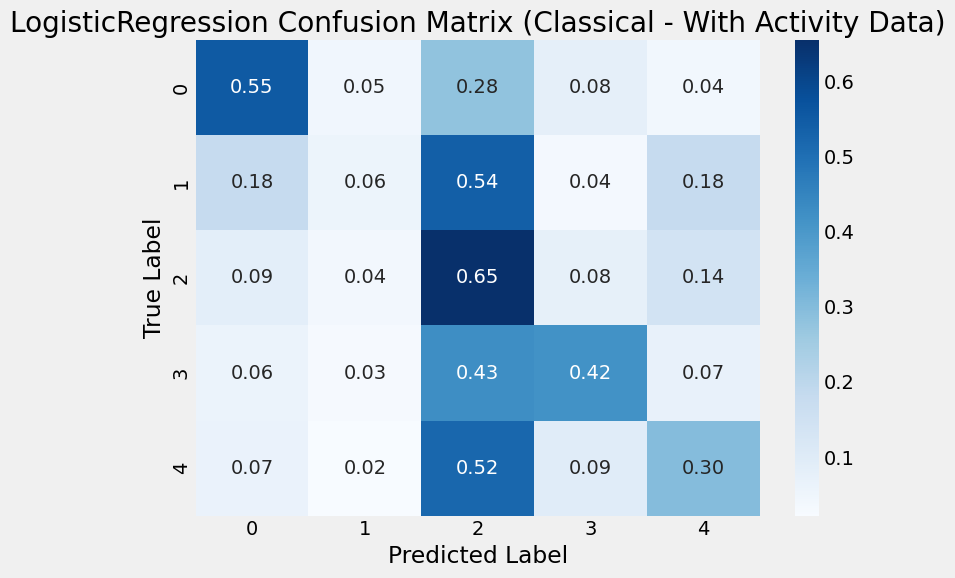


Evaluating LinearSVC...
Train Accuracy: 0.5417
Test Accuracy: 0.5408
Macro F1-score: 0.3923
Weighted F1-score: 0.5351
Test Log Loss: 1.3187


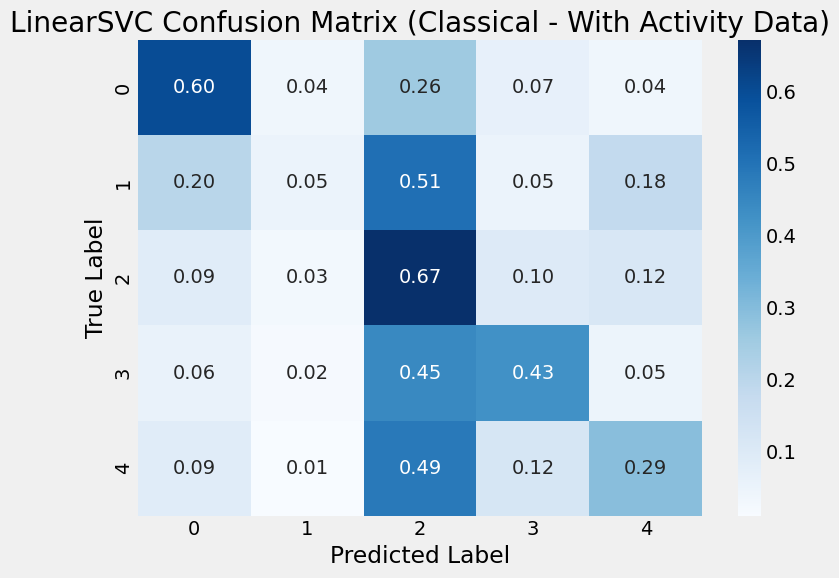


Evaluating DecisionTreeClassifier...
Train Accuracy: 1.0000
Test Accuracy: 0.7263
Macro F1-score: 0.6574
Weighted F1-score: 0.7308
Test Log Loss: 9.8657


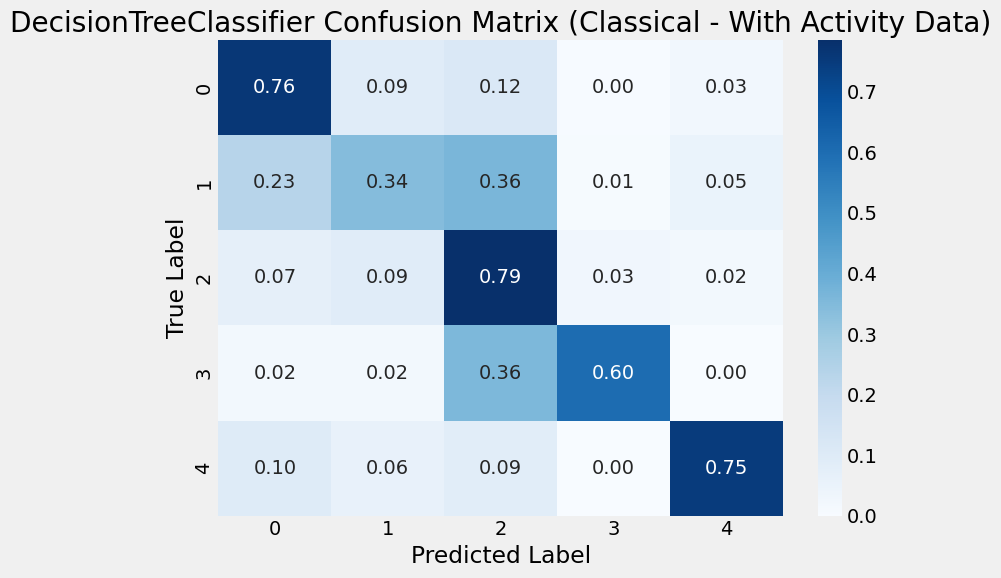


Evaluating ExtraTreesClassifier...
Train Accuracy: 1.0000
Test Accuracy: 0.7921
Macro F1-score: 0.7196
Weighted F1-score: 0.7915
Test Log Loss: 1.0651


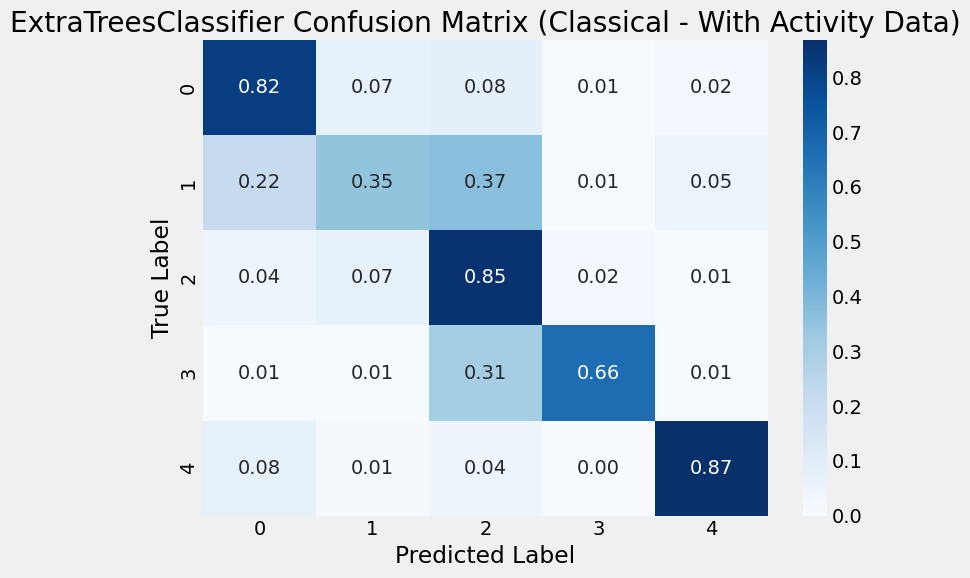


Evaluating RandomForestClassifier...
Train Accuracy: 1.0000
Test Accuracy: 0.8121
Macro F1-score: 0.7377
Weighted F1-score: 0.8066
Test Log Loss: 0.7608


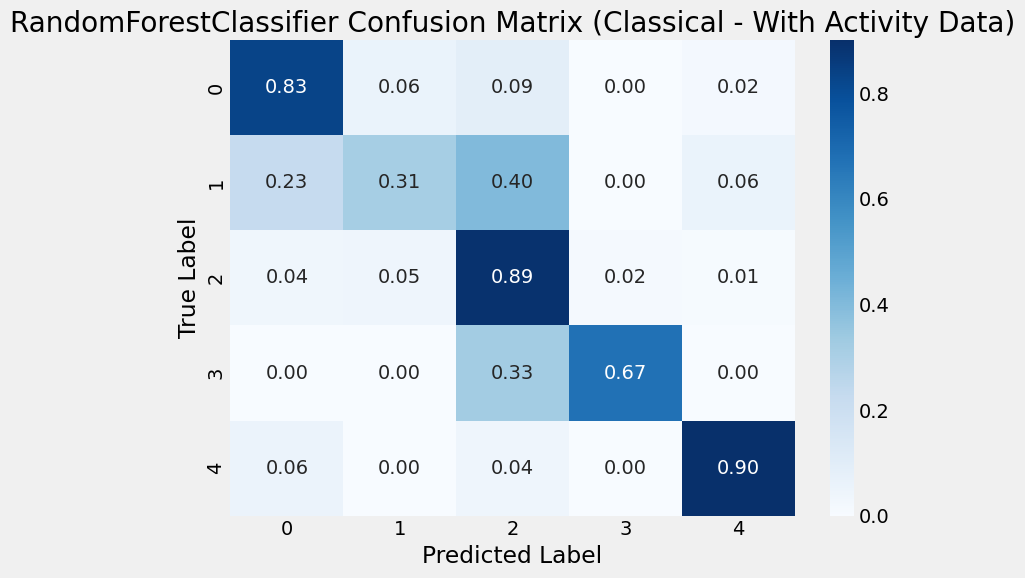


Evaluating XGBClassifier...
Train Accuracy: 0.9722
Test Accuracy: 0.7855
Macro F1-score: 0.6849
Weighted F1-score: 0.7710
Test Log Loss: 0.5957


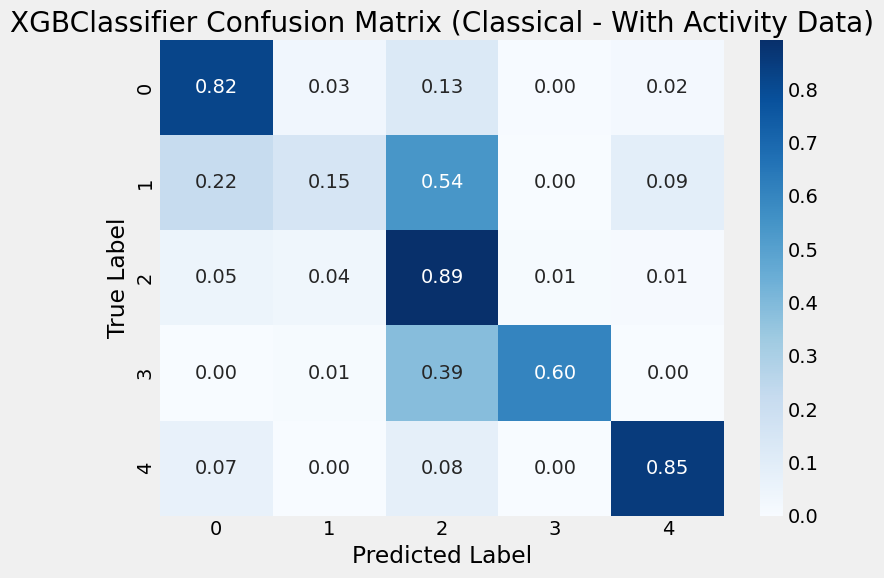


--- Classical Models Results (With Activity Data) ---
                         Scenario              Classifier  Train Accuracy  \
0  Classical - With Activity Data      LogisticRegression        0.537474   
1  Classical - With Activity Data               LinearSVC        0.541704   
2  Classical - With Activity Data  DecisionTreeClassifier        1.000000   
3  Classical - With Activity Data    ExtraTreesClassifier        1.000000   
4  Classical - With Activity Data  RandomForestClassifier        1.000000   
5  Classical - With Activity Data           XGBClassifier        0.972197   

   Test Accuracy  Macro F1  Weighted F1  Test Log Loss  Train Time (s)  \
0       0.518429  0.382382     0.516527       1.227784        1.180077   
1       0.540785  0.392333     0.535140       1.318680        1.293547   
2       0.726284  0.657392     0.730846       9.865725        0.302294   
3       0.792145  0.719566     0.791455       1.065093        1.092899   
4       0.812085  0.737658     0.80

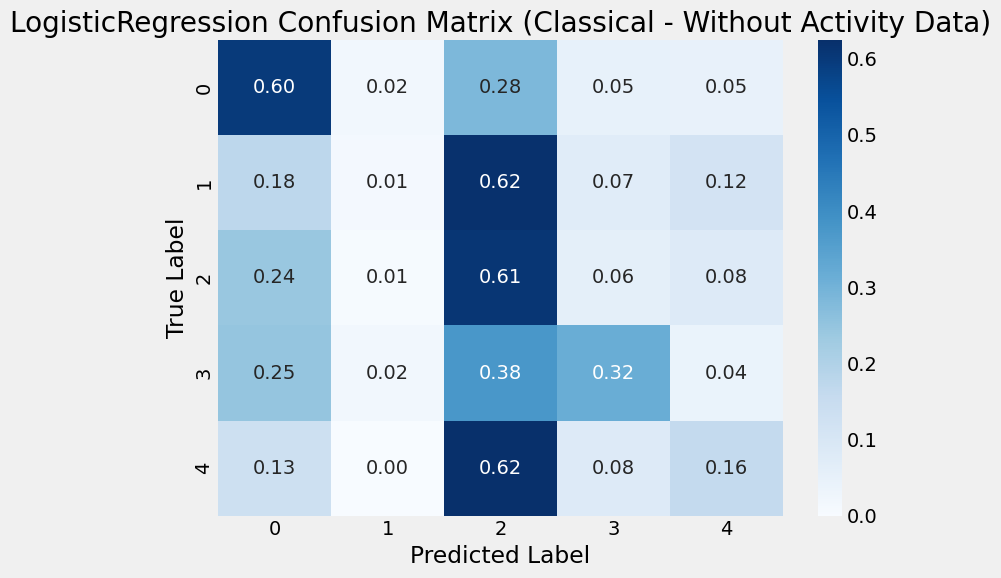


Evaluating LinearSVC...
Train Accuracy: 0.5029
Test Accuracy: 0.4912
Macro F1-score: 0.3146
Weighted F1-score: 0.4603
Test Log Loss: 1.4414


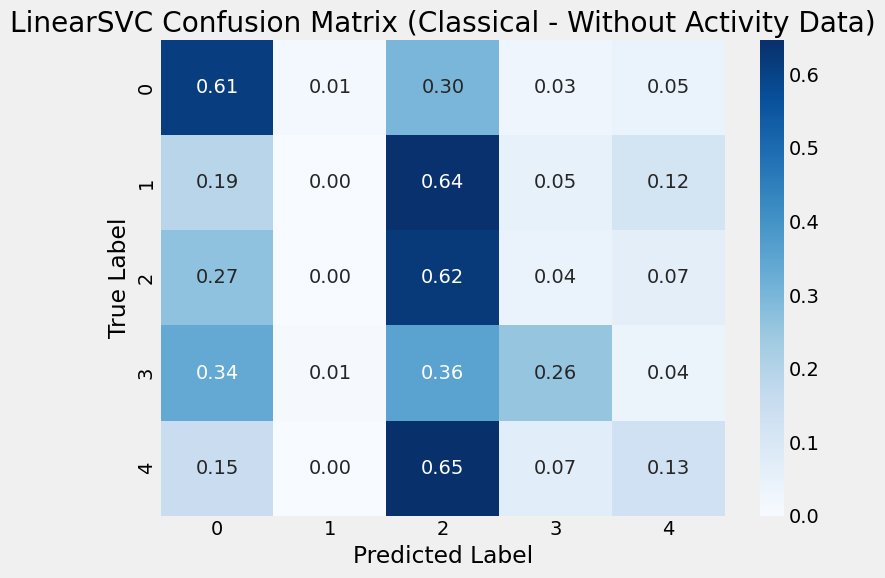


Evaluating DecisionTreeClassifier...
Train Accuracy: 1.0000
Test Accuracy: 0.7118
Macro F1-score: 0.6442
Weighted F1-score: 0.7164
Test Log Loss: 10.3884


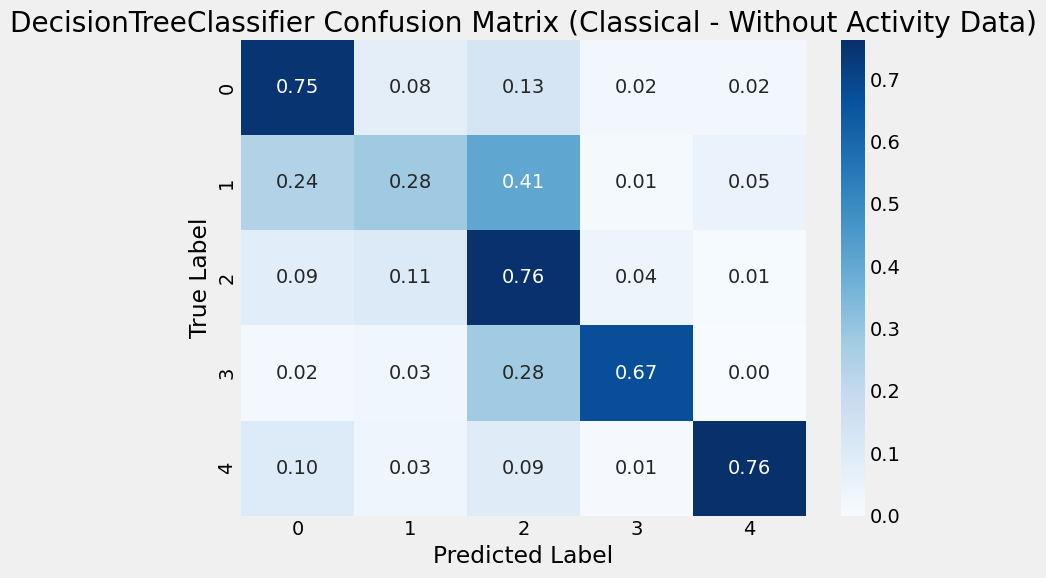


Evaluating ExtraTreesClassifier...
Train Accuracy: 1.0000
Test Accuracy: 0.7716
Macro F1-score: 0.6967
Weighted F1-score: 0.7713
Test Log Loss: 1.2159


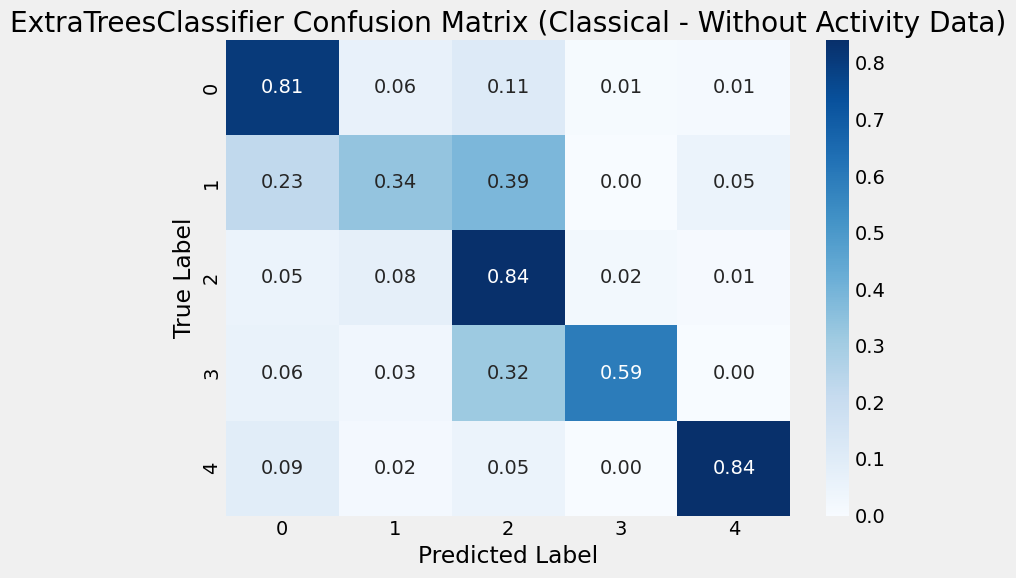


Evaluating RandomForestClassifier...
Train Accuracy: 1.0000
Test Accuracy: 0.8012
Macro F1-score: 0.7189
Weighted F1-score: 0.7939
Test Log Loss: 0.9189


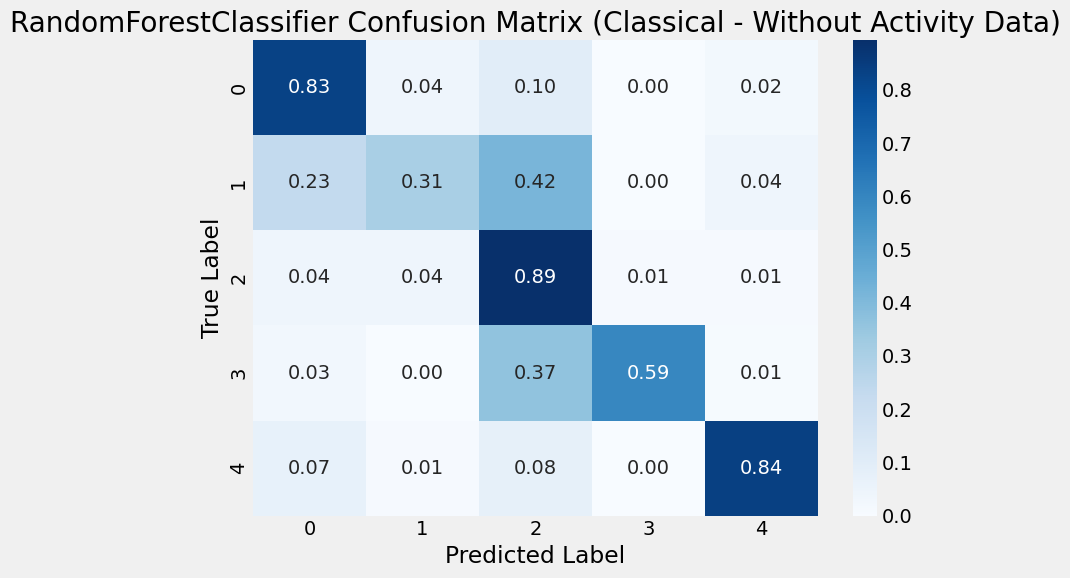


Evaluating XGBClassifier...
Train Accuracy: 0.9711
Test Accuracy: 0.7656
Macro F1-score: 0.6597
Weighted F1-score: 0.7509
Test Log Loss: 0.6375


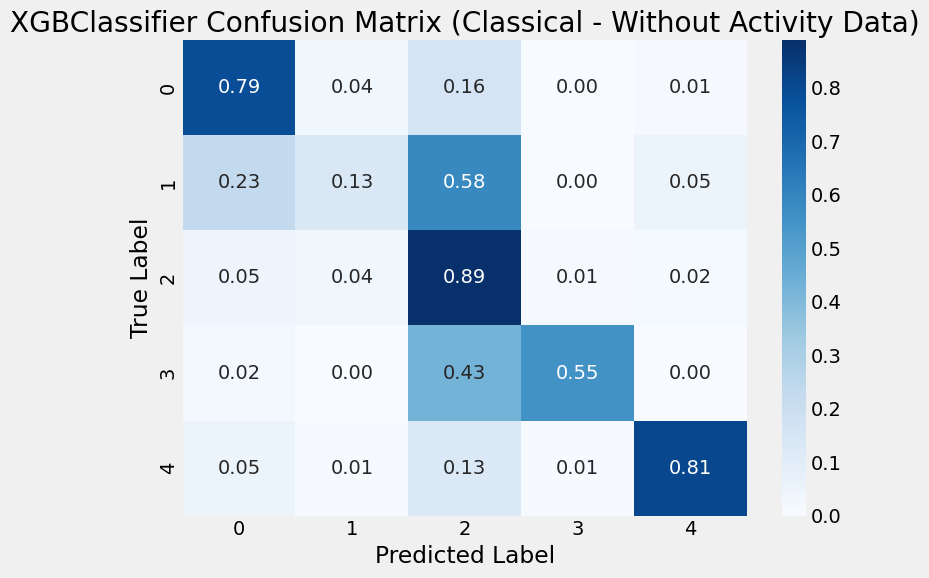


--- Classical Models Results (Without Activity Data) ---
                            Scenario              Classifier  Train Accuracy  \
0  Classical - Without Activity Data      LogisticRegression        0.500000   
1  Classical - Without Activity Data               LinearSVC        0.502871   
2  Classical - Without Activity Data  DecisionTreeClassifier        1.000000   
3  Classical - Without Activity Data    ExtraTreesClassifier        1.000000   
4  Classical - Without Activity Data  RandomForestClassifier        1.000000   
5  Classical - Without Activity Data           XGBClassifier        0.971139   

   Test Accuracy  Macro F1  Weighted F1  Test Log Loss  Train Time (s)  \
0       0.489426  0.327780     0.466597       1.364480        0.199214   
1       0.491239  0.314603     0.460342       1.441354        0.205158   
2       0.711782  0.644167     0.716421      10.388412        0.348472   
3       0.771601  0.696707     0.771311       1.215940        2.047622   
4       0.8

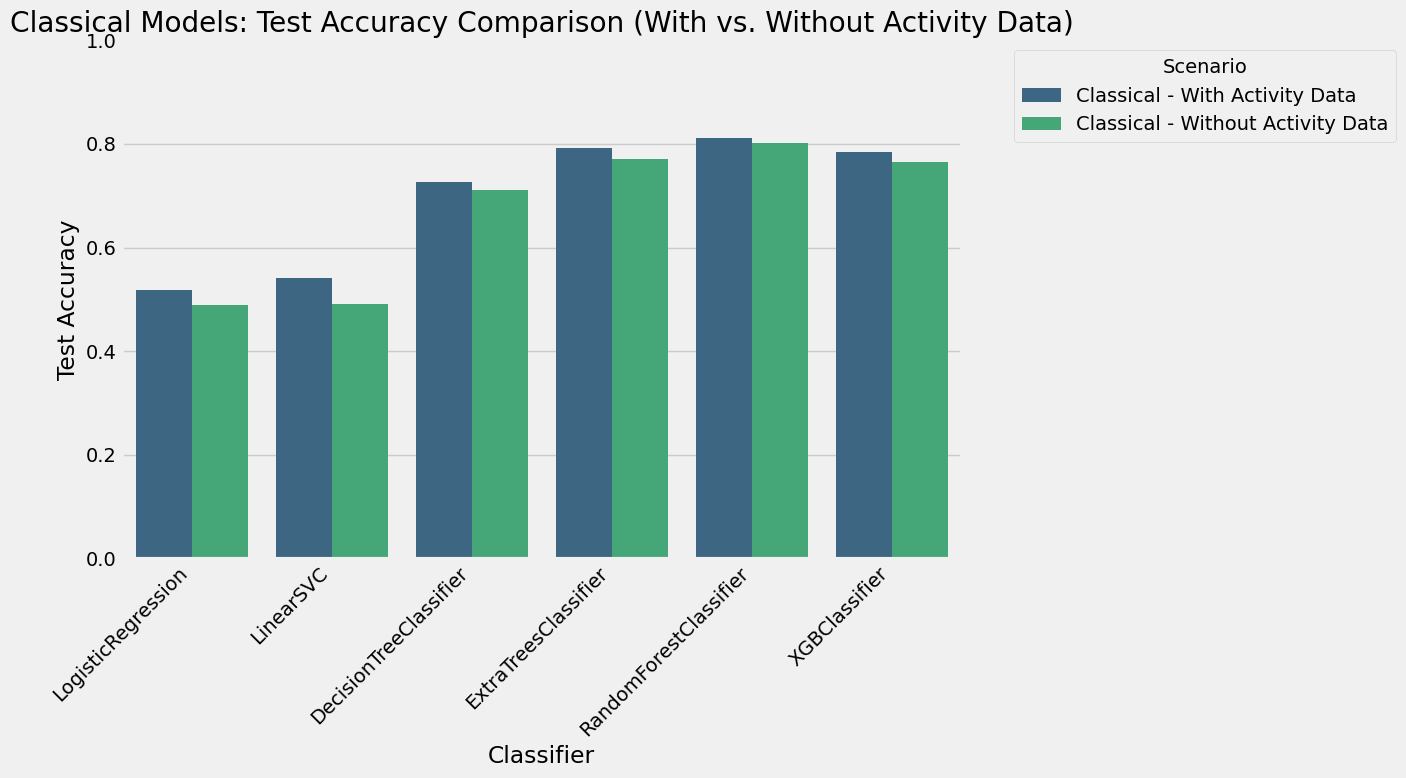

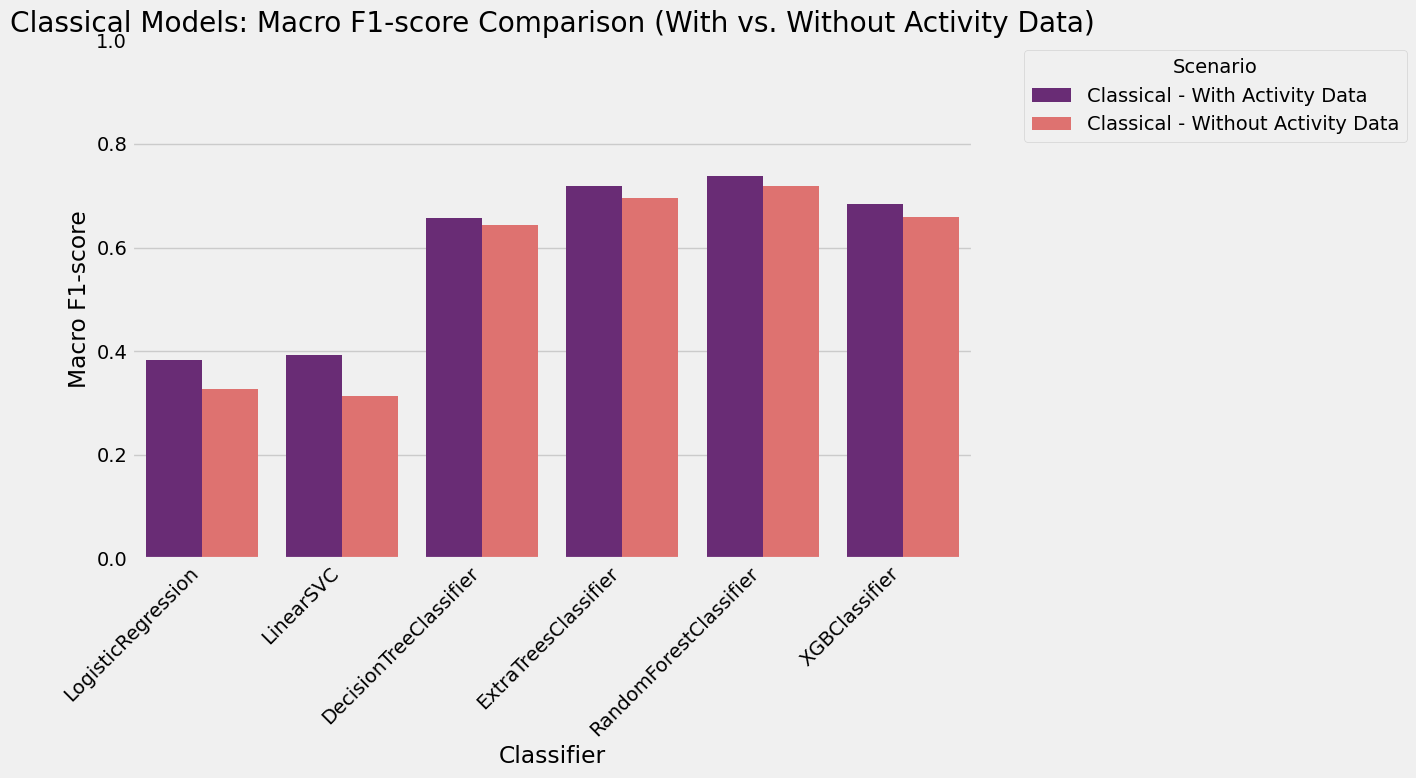


--- Running Deep Learning Models: DL - With Activity Data ---

--- Evaluating LSTM (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
LSTM Test Acc: 0.8512, Macro F1: 0.8497


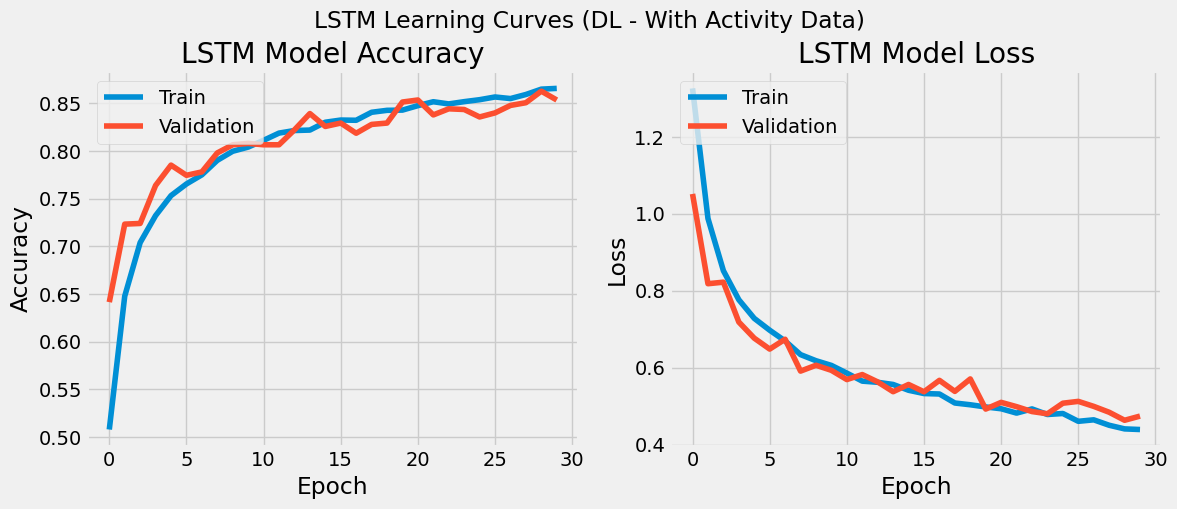

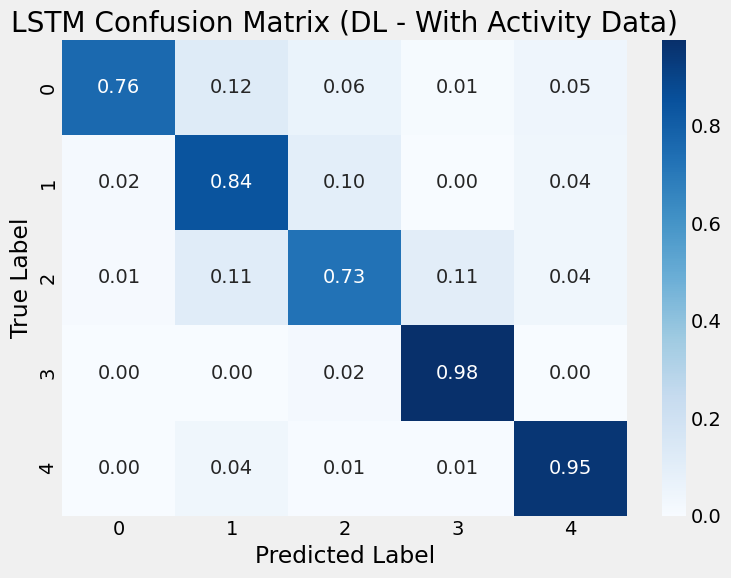


--- Evaluating MLP (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MLP Test Acc: 0.7292, Macro F1: 0.7202


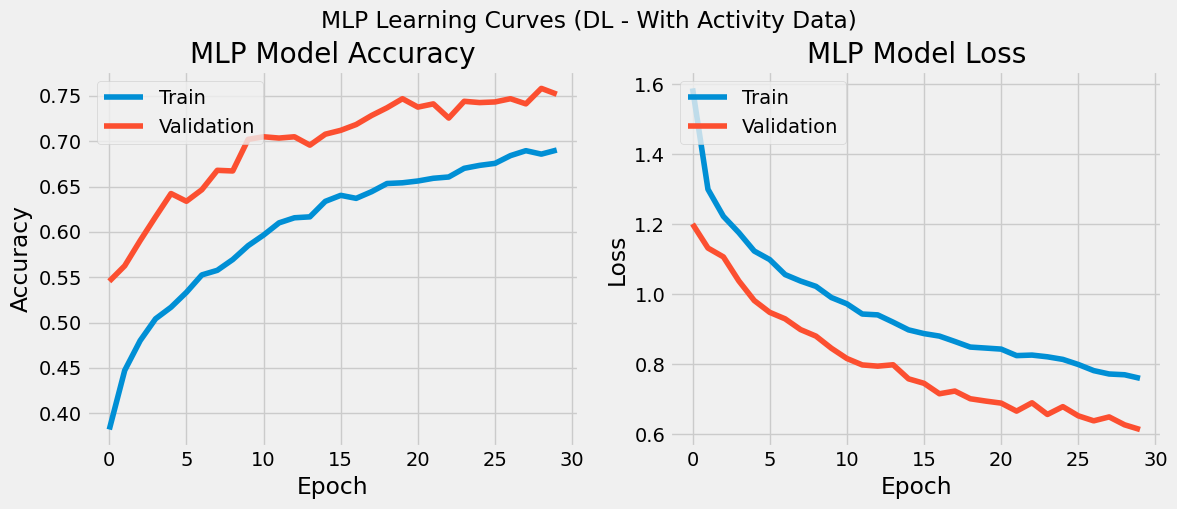

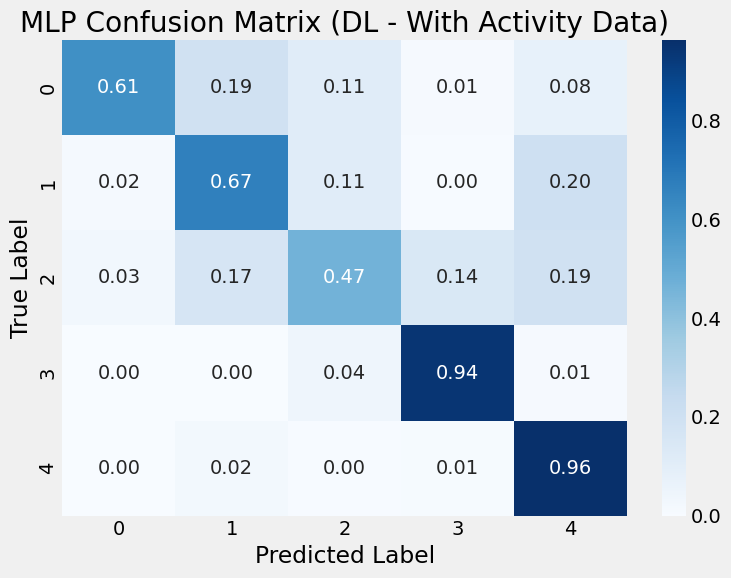


--- Evaluating 1D CNN (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
1D CNN Test Acc: 0.8256, Macro F1: 0.8232


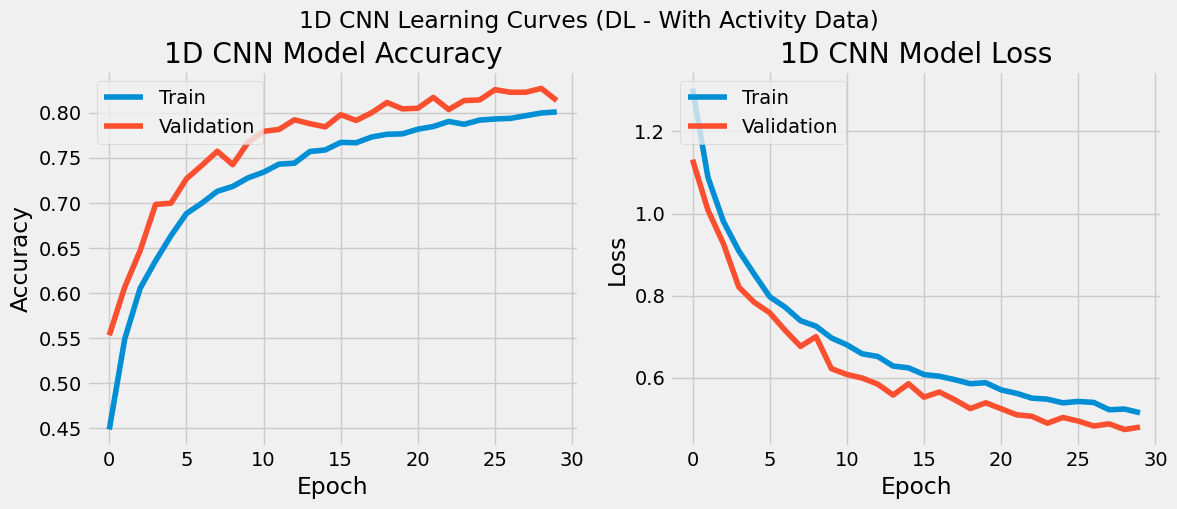

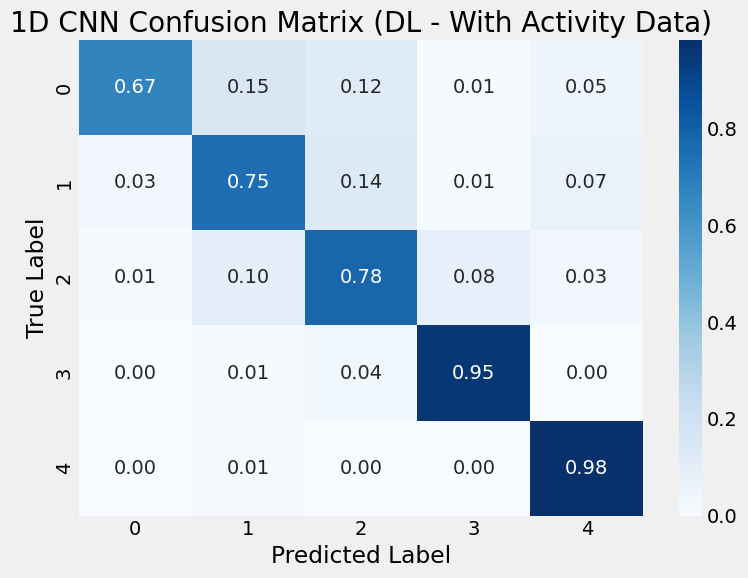


--- Evaluating GRU (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
GRU Test Acc: 0.8717, Macro F1: 0.8712


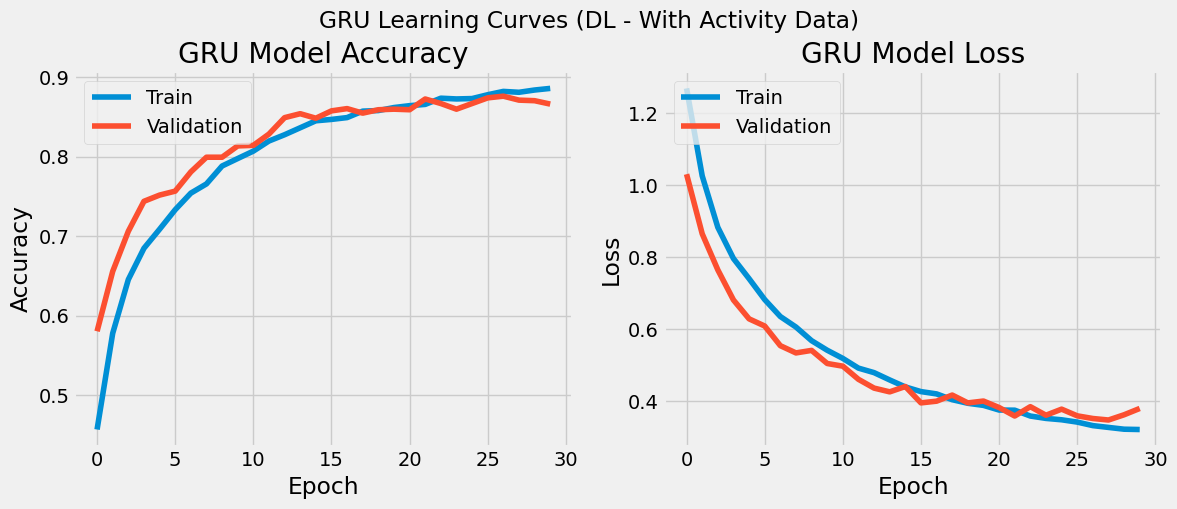

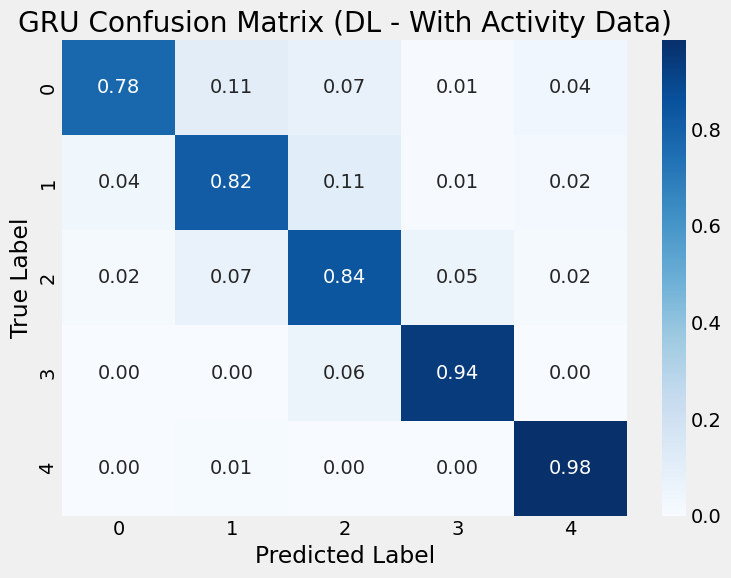


--- Evaluating BiLSTM (3-Class) ---
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
BiLSTM Test Acc: 0.5174, Macro F1: 0.4997


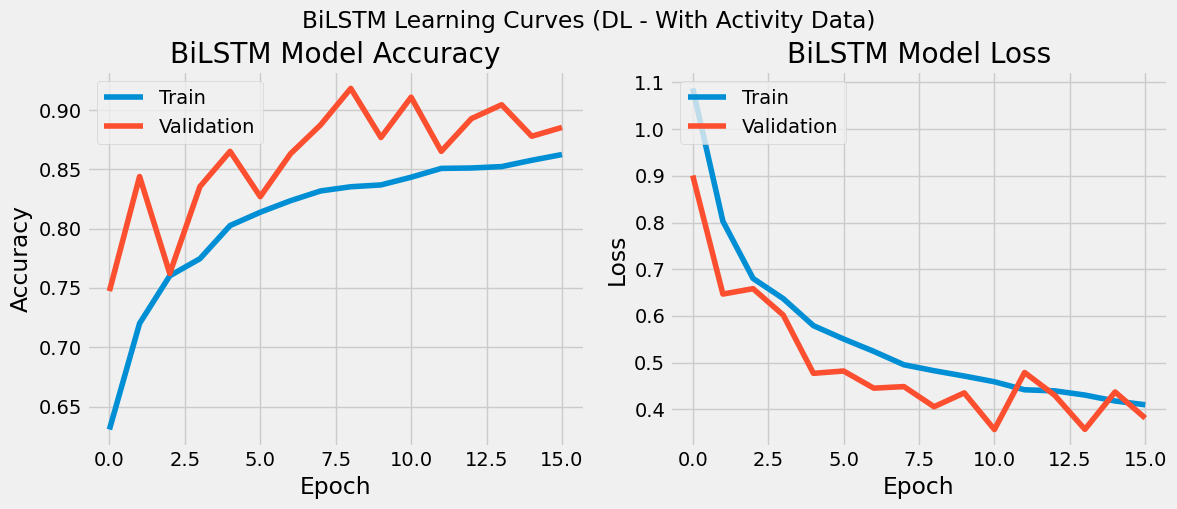

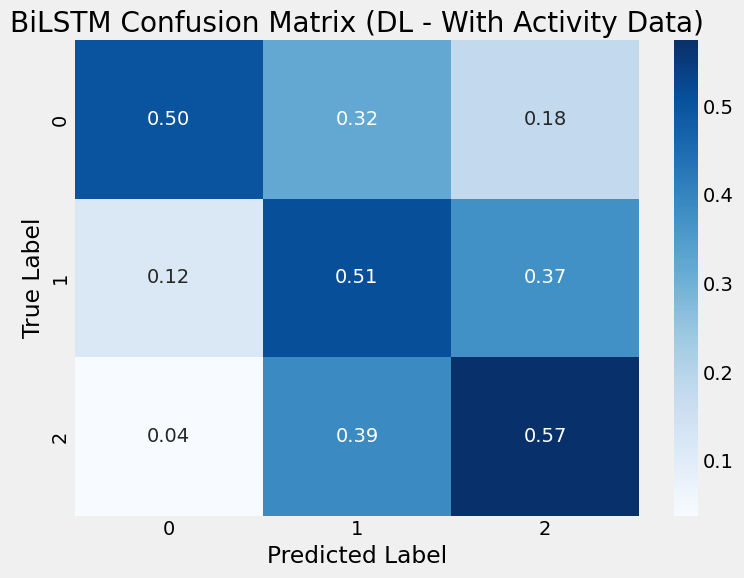


--- Deep Learning Models Results (With Activity Data) ---
                  Scenario   Model  Test Accuracy  Macro F1  Weighted F1
0  DL - With Activity Data    LSTM       0.851209  0.849720     0.849720
1  DL - With Activity Data     MLP       0.729161  0.720191     0.720191
2  DL - With Activity Data  1D CNN       0.825605  0.823213     0.823213
3  DL - With Activity Data     GRU       0.871693  0.871235     0.871235
4  DL - With Activity Data  BiLSTM       0.517405  0.499746     0.538754

--- Running Deep Learning Models: DL - Without Activity Data ---

--- Evaluating LSTM (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
LSTM Test Acc: 0.8333, Macro F1: 0.8318


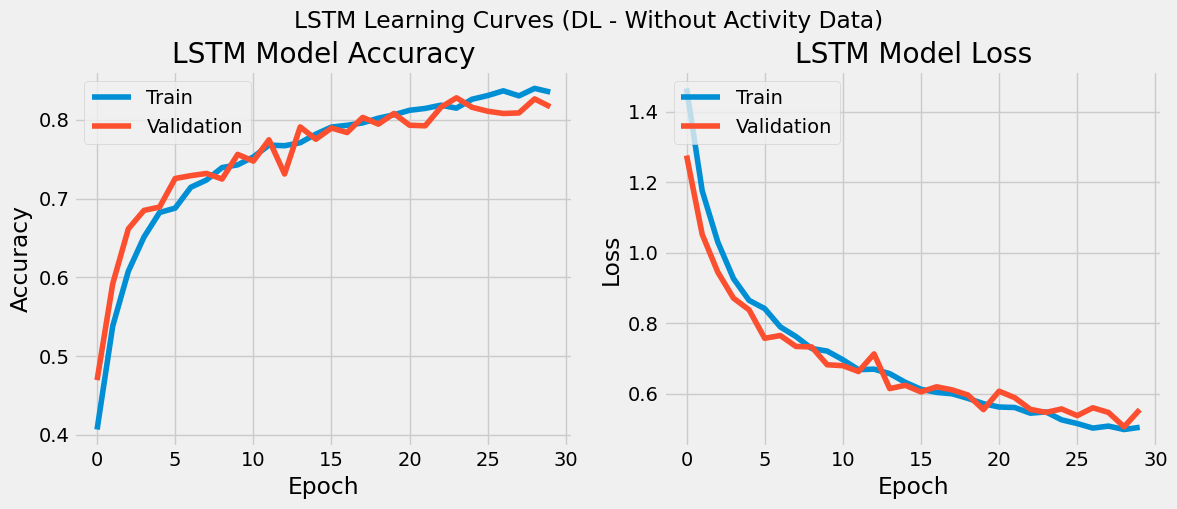

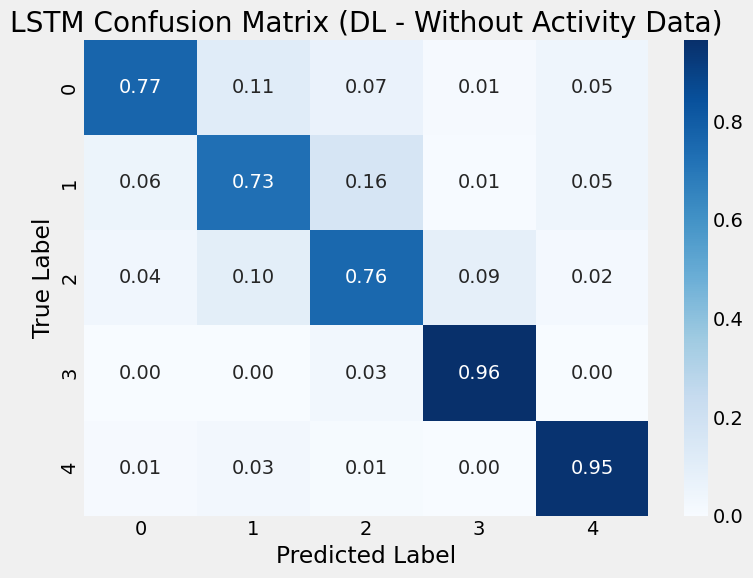


--- Evaluating MLP (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MLP Test Acc: 0.6885, Macro F1: 0.6689


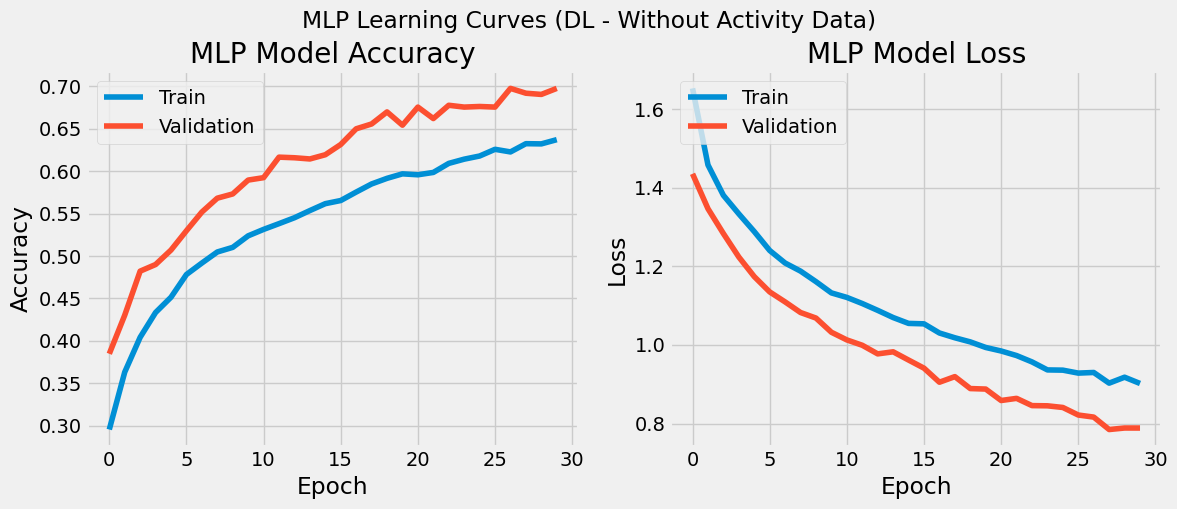

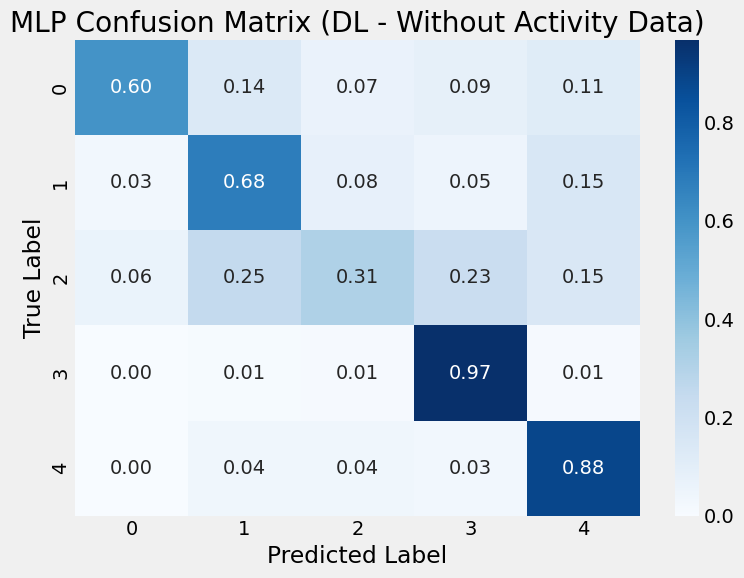


--- Evaluating 1D CNN (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
1D CNN Test Acc: 0.7906, Macro F1: 0.7874


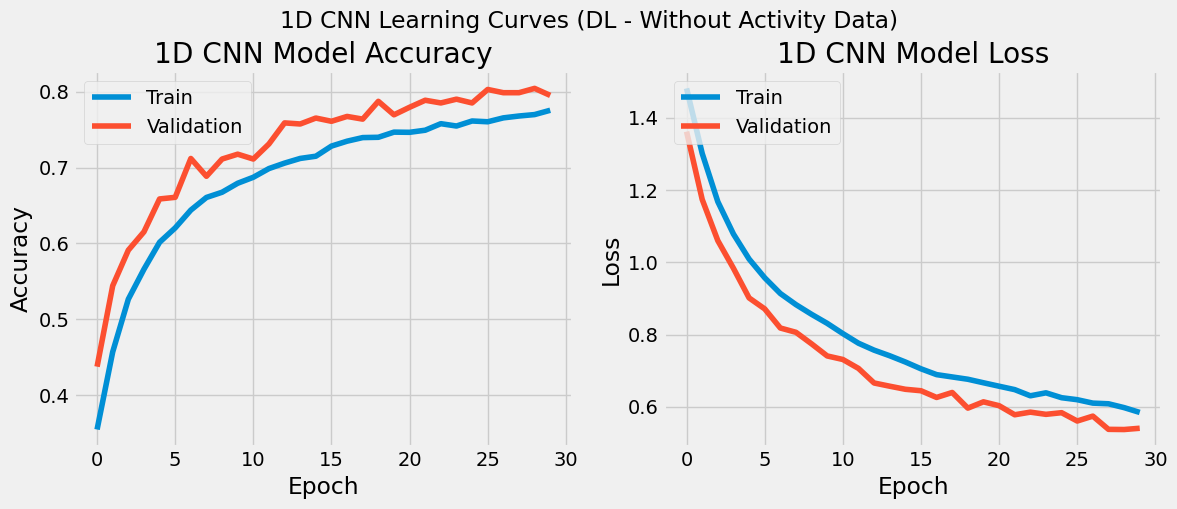

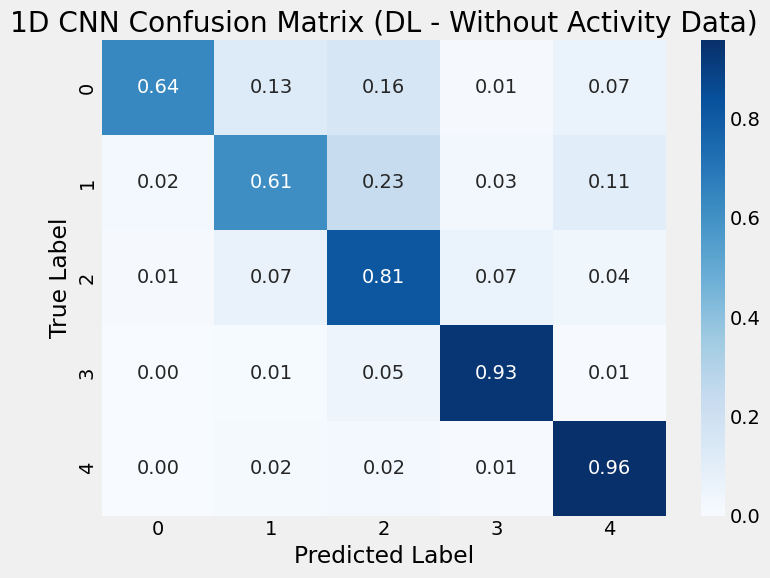


--- Evaluating GRU (5-class) ---
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
GRU Test Acc: 0.8518, Macro F1: 0.8506


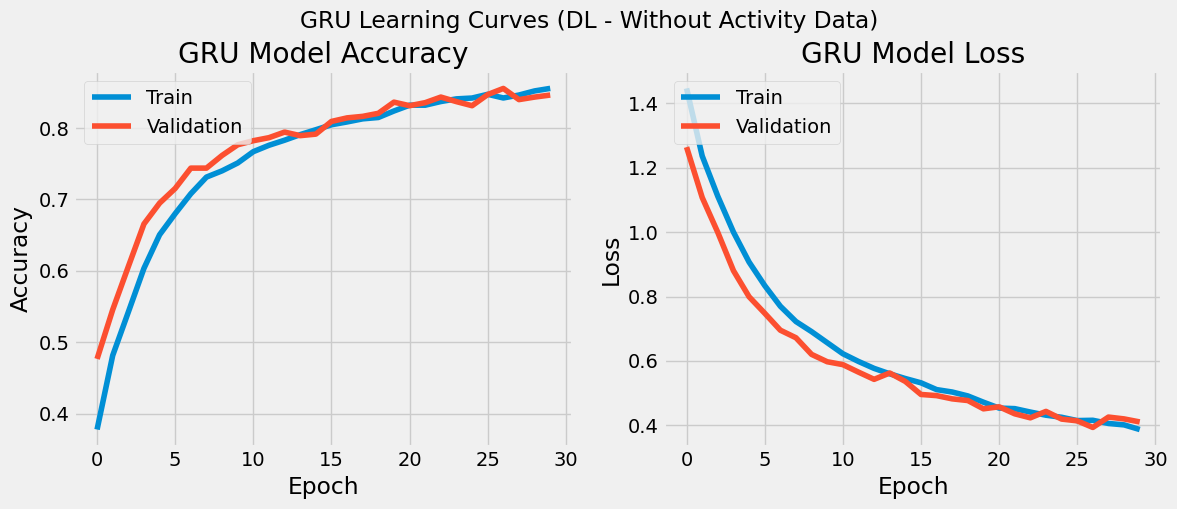

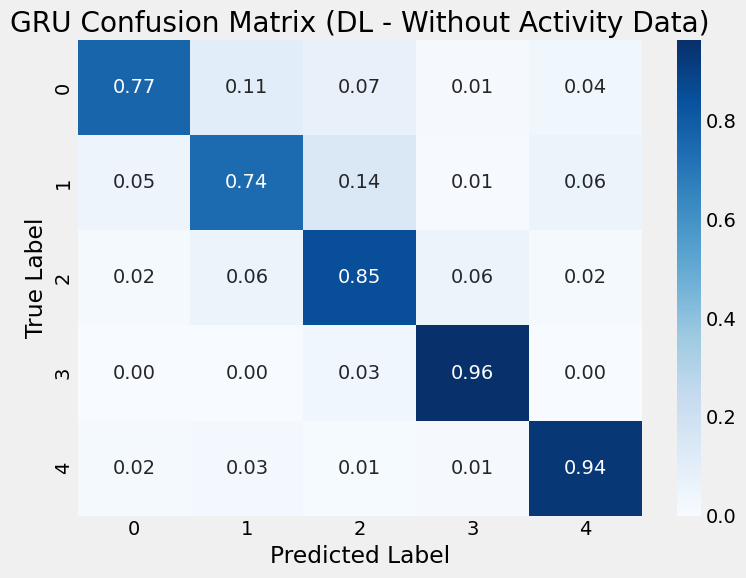


--- Evaluating BiLSTM (3-Class) ---
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step
BiLSTM Test Acc: 0.4030, Macro F1: 0.3482


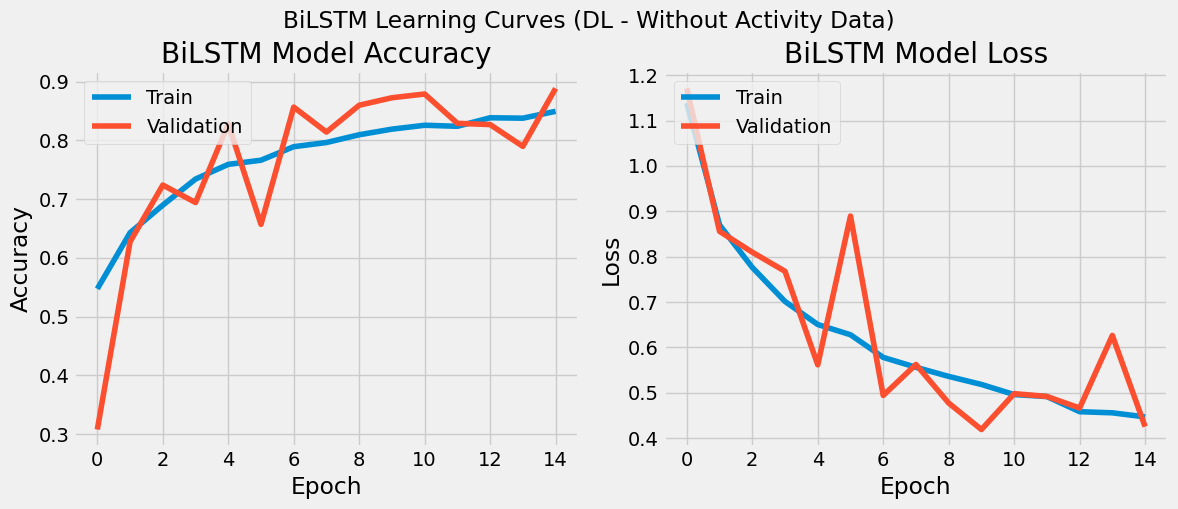

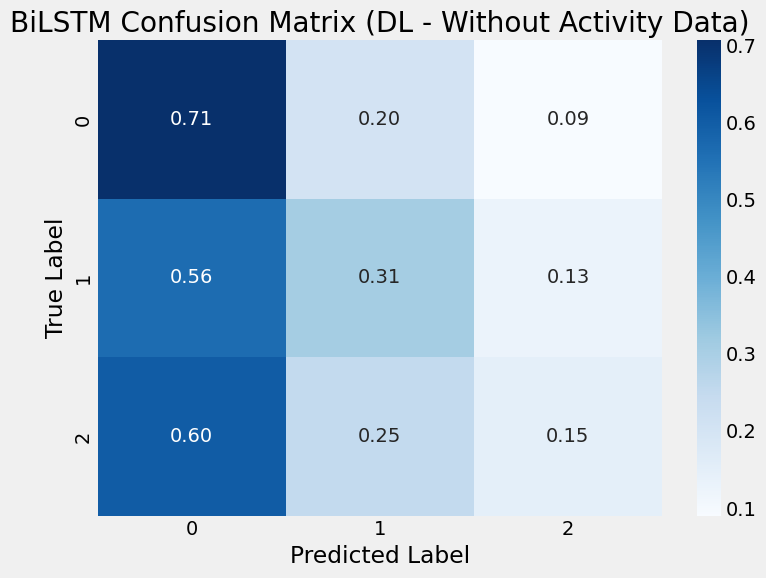


--- Deep Learning Models Results (Without Activity Data) ---
                     Scenario   Model  Test Accuracy  Macro F1  Weighted F1
0  DL - Without Activity Data    LSTM       0.833286  0.831785     0.831785
1  DL - Without Activity Data     MLP       0.688478  0.668864     0.668864
2  DL - Without Activity Data  1D CNN       0.790612  0.787405     0.787405
3  DL - Without Activity Data     GRU       0.851778  0.850584     0.850584
4  DL - Without Activity Data  BiLSTM       0.402954  0.348164     0.391453

--- Overall Deep Learning Models Comparison ---
                     Scenario   Model  Test Accuracy  Macro F1  Weighted F1
0     DL - With Activity Data    LSTM       0.851209  0.849720     0.849720
1     DL - With Activity Data     MLP       0.729161  0.720191     0.720191
2     DL - With Activity Data  1D CNN       0.825605  0.823213     0.823213
3     DL - With Activity Data     GRU       0.871693  0.871235     0.871235
4     DL - With Activity Data  BiLSTM       0.517405 

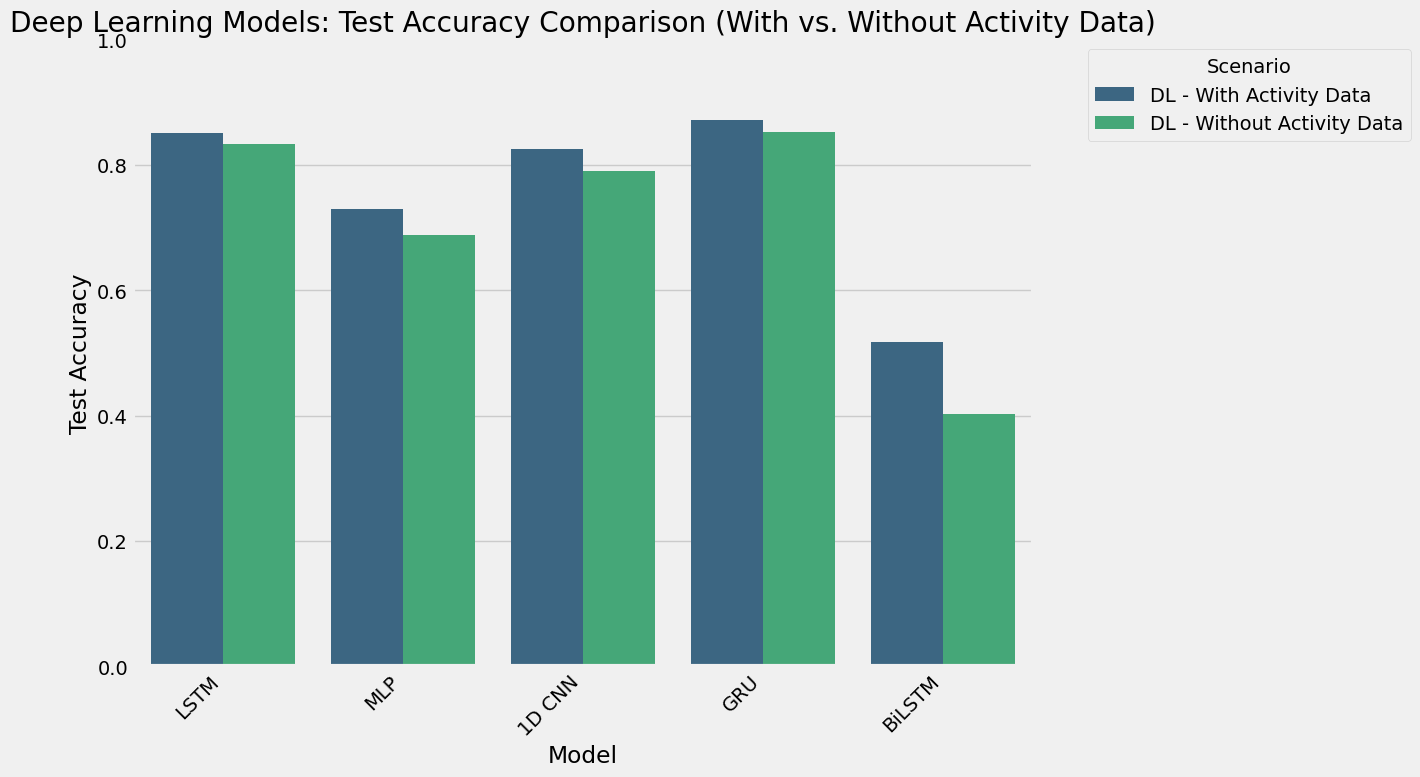

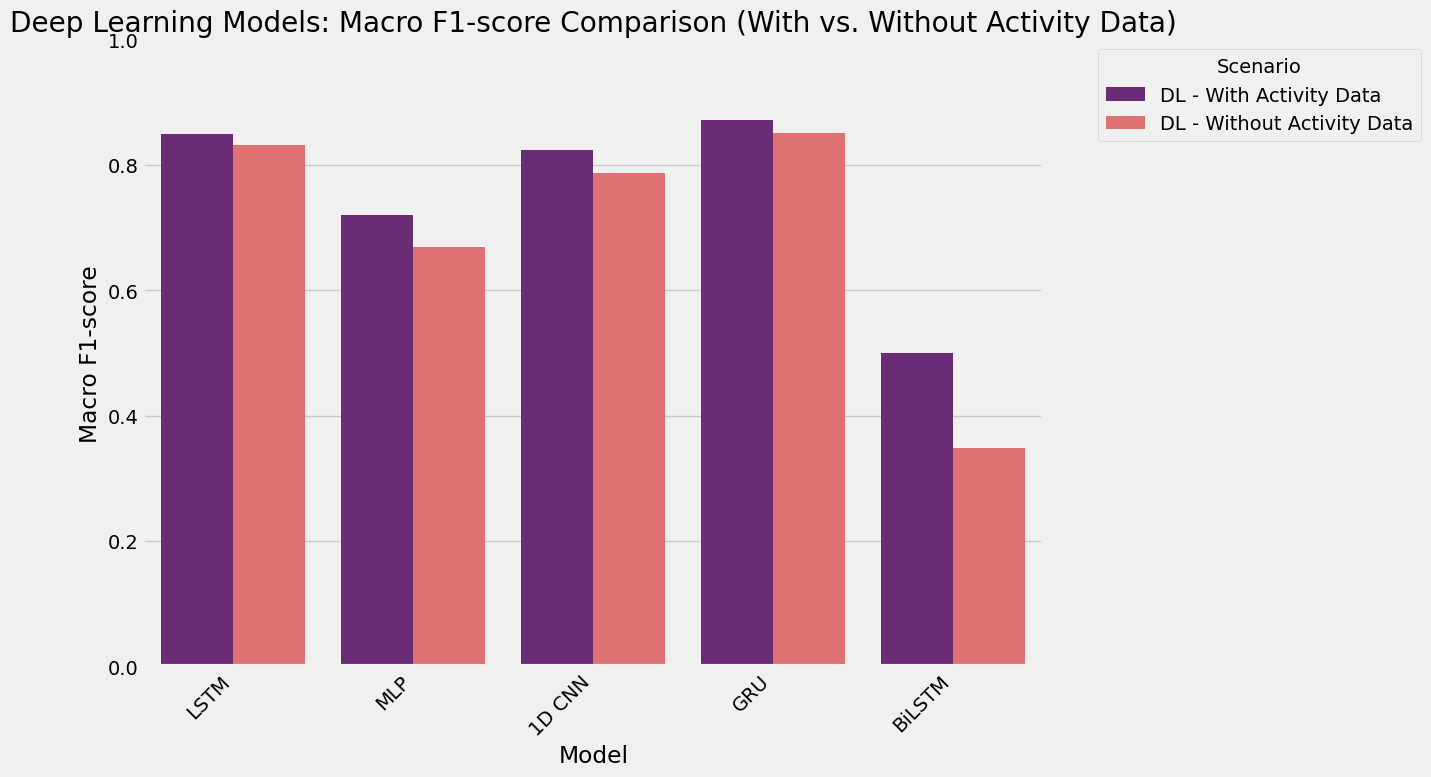


Comparison complete. Review the tables and plots above.


In [3]:

SEQ_LENGTH = 30
TEST_SIZE = 0.2
RANDOM_SEED = 42
EPOCHS = 30 # Reduced epochs for faster execution during comparison, can be increased for final training
BATCH_SIZE = 64

# --- 1. Data Loading and Initial Preprocessing (EXACTLY AS PER ORIGINAL NOTEBOOK) ---
print(f"Loading data from: {data_dir}")
final_df = pd.DataFrame()
try:
    for data_path in os.listdir(data_dir):
        # Skip non-CSV files and mesaid 4506 as per user's original notebook logic
        if not data_path.endswith('.csv') or '4506' in data_path:
            continue

        df_current_file = pd.read_csv(os.path.join(data_dir, data_path))
        df_current_file = df_current_file[df_current_file['interval'] != 'EXCLUDED']

        # Ensure unique_dayofweek contains at least two distinct days with sleep stage labels
        unique_dayofweek = df_current_file[~df_current_file['sleep stage'].isna()]['dayofweek'].unique()
        if len(unique_dayofweek) < 2:
            # print(f"Skipping {data_path}: Not enough labeled days for day/night split logic.")
            continue

        # Filter df_current_file to only include days that have sleep stage labels as per original logic
        df_filtered_days = df_current_file[df_current_file['dayofweek'].isin(unique_dayofweek)].copy()

        # --- Replicating original notebook's day/night split and feature creation ---
        # First day's data (dayofweek[0])
        df_prev_day_1 = df_filtered_days[df_filtered_days['dayofweek'] == unique_dayofweek[0]].copy()
        df_prev_day_1["linetime"] = pd.to_datetime(df_prev_day_1["linetime"], format="%H:%M:%S").dt.time # Original format
        morning_start = pd.to_datetime("09:00:00").time()
        night_end = pd.to_datetime("21:59:59").time()

        df_day = df_prev_day_1[(df_prev_day_1["linetime"] >= morning_start) & (df_prev_day_1["linetime"] <= night_end)]
        mid_df = df_prev_day_1[df_prev_day_1["linetime"] > night_end] # End of first day's data, for night part

        # Second day's data (dayofweek[1])
        df_prev_day_2 = df_filtered_days[df_filtered_days['dayofweek'] == unique_dayofweek[1]].copy()
        df_prev_day_2["linetime"] = pd.to_datetime(df_prev_day_2["linetime"], format="%H:%M:%S").dt.time # Original format
        morning_end = pd.to_datetime("08:59:59").time()
        df_night = df_prev_day_2[(df_prev_day_2["linetime"] <= morning_end)] # Start of second day's data, for night part

        # Concatenate mid-section of first day and early section of second day to form the full 'night' period
        df_night_combined_period = pd.concat([mid_df, df_night])

        # Sort values (as per original notebook)
        df_day = df_day.sort_values(by="linetime")
        df_night_combined_period = df_night_combined_period.sort_values(by="epoch")

        # Drop columns from day and night data frames (as per original notebook)
        cols_to_drop_original = ['line','marker','wake', 'interval','dayofweek', 'daybymidnight', 'daybynoon']

        df_day = df_day.drop(columns=[col for col in cols_to_drop_original if col in df_day.columns], errors='ignore')
        df_night_combined_period = df_night_combined_period.drop(columns=[col for col in cols_to_drop_original if col in df_night_combined_period.columns], errors='ignore')

        # Drop rows with NaN in 'sleep stage' from the night data (critical for target alignment)
        df_night_combined_period.dropna(subset=['sleep stage'], inplace=True)

        # Calculate aggregated awake features from daytime data (as per original notebook)
        if not df_day.empty:
            awake_features = df_day.groupby('mesaid').agg({
                'activity': ['mean', 'max', 'min', 'std'],
                'whitelight': ['mean', 'max', 'min', 'std'],
                'redlight': ['mean', 'max', 'min', 'std'],
                'greenlight': ['mean', 'max', 'min', 'std'],
                'bluelight': ['mean', 'max', 'min', 'std'],
                'offwrist': ['mean']
            }).reset_index()

            # Flatten multi-level columns
            awake_features.columns = ['_'.join(col).strip() for col in awake_features.columns.values]
            awake_features = awake_features.rename(columns={"mesaid_":"mesaid"})
        else:
            # Create an empty DataFrame with correct columns if df_day is empty, to allow merge
            col_names = ['mesaid', 'activity_mean', 'activity_max', 'activity_min', 'activity_std',
                         'whitelight_mean', 'whitelight_max', 'whitelight_min', 'whitelight_std',
                         'redlight_mean', 'redlight_max', 'redlight_min', 'redlight_std',
                         'greenlight_mean', 'greenlight_max', 'greenlight_min', 'greenlight_std',
                         'bluelight_mean', 'bluelight_max', 'bluelight_min', 'bluelight_std',
                         'offwrist_mean']
            awake_features = pd.DataFrame(columns=col_names)
            # Ensure 'mesaid' is present for merging if no daytime data for this participant
            if not df_night_combined_period.empty:
                awake_features.loc[0, 'mesaid'] = df_night_combined_period['mesaid'].iloc[0]


        # Merge daytime activity features into nighttime data
        df_asleep_merged = df_night_combined_period.merge(awake_features, on='mesaid', how='left')

        final_df = pd.concat([final_df, df_asleep_merged])

except FileNotFoundError:
    print(f"Error: Data directory '{data_dir}' not found.")
    print("Please ensure the 'combined' folder containing your CSV files is at this path.")
    print("Example: If unzipped to /content/combined, set data_dir = '/content/combined'")
    exit() # Exit the script if data is not found

# Assign the final concatenated DataFrame to df as per original notebook
df = final_df.copy()

# --- Continue with Feature Engineering from the ORIGINAL NOTEBOOK after initial data load ---

# Ensure necessary columns are float type, fill NaNs for numeric columns if any remain
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True) # Fill with mean
    df[col].fillna(0, inplace=True) # Fallback for columns with all NaNs

# Re-extract hour/minute using the 'linetime' column which should now be present after the corrected loading loop
if 'linetime' in df.columns:
    df['linetime_dt_parsed'] = pd.to_datetime(df['linetime'], format="%H:%M:%S").dt.time
    df['hour'] = df['linetime_dt_parsed'].apply(lambda x: x.hour)
    df['minute'] = df['linetime_dt_parsed'].apply(lambda x: x.minute)
    df = df.drop(columns=['linetime_dt_parsed', 'linetime'], errors='ignore') # Drop temporary and original
else:
    print("Error: 'linetime' column not found for accurate time feature derivation. Time features will be inaccurate.")
    # Fallback to creating hour/minute if linetime is somehow missing, though it shouldn't be now.
    # This scenario is highly unlikely with the corrected data loading.
    if 'hour' not in df.columns: df['hour'] = 0
    if 'minute' not in df.columns: df['minute'] = 0


df['seconds_since_midnight'] = df['hour'] * 3600 + df['minute'] * 60

# Categorize time of day and one-hot encode
def get_time_of_day(hour):
    if 5 <= hour < 12: return 'morning'
    elif 12 <= hour < 17: return 'afternoon'
    elif 17 <= hour < 21: return 'evening'
    else: return 'night'
df['time_of_day'] = df['hour'].apply(get_time_of_day)
df = pd.get_dummies(df, columns=['time_of_day'], drop_first=True, dtype=int) # Creates time_of_day_night, time_of_day_morning etc.

# Identify and drop constant columns (after one-hot encoding)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns, errors='ignore')

# Handle activity_level (if 'activity' is still in columns and activity_level not yet created)
if 'activity' in df.columns and 'activity_level' not in df.columns:
    threshold = df["activity"].median()
    df["activity_level"] = df["activity"].apply(lambda x: 1 if x > threshold else 0)
    df['activity_level'].fillna(0, inplace=True) # Fill potential NaNs from median calc


# Drop rows with NaN in 'sleep stage' (target variable)
df = df.dropna(subset=['sleep stage'])

# Map sleep stages to integer labels for 5-class classification (common for most models)
# Assuming original labels are 0, 1, 2, 3, 5 based on your original notebook's unique() output
sleep_stage_map_5_class = {0.: 0, 1.: 1, 2.: 2, 3.: 3, 5.: 4}
df['sleep_stage_encoded_5_class'] = df['sleep stage'].map(sleep_stage_map_5_class)

# Drop rows where sleep stage mapping failed (e.g., if there were unexpected sleep stage values)
df.dropna(subset=['sleep_stage_encoded_5_class'], inplace=True)
df['sleep_stage_encoded_5_class'] = df['sleep_stage_encoded_5_class'].astype(int)


print(f"\nDataFrame shape after initial processing: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# --- Define Activity-Related Features ---
# This list specifies all features considered 'activity data' or derived from it.
# 'epoch' is generally excluded as a direct activity feature, but it's a sequence index.
# The `_mean/_max/_min/_std` are from the 'awake_features' aggregation.
# Ensure 'epoch' is not in the list if it's meant to be a non-activity feature,
# but it seems to be part of the general sensor data. If it's a time index, it should stay.
# Based on your prompt, activity data is motion/light, so STLevel/STSlope/RPoint etc. are not activity.
activity_related_features = [
    'activity', 'offwrist', # direct activity and off-wrist status
    'whitelight', 'redlight', 'greenlight', 'bluelight', # light sensor data
    'activity_mean', 'activity_max', 'activity_min', 'activity_std',
    'whitelight_mean', 'whitelight_max', 'whitelight_min', 'whitelight_std',
    'redlight_mean', 'redlight_max', 'redlight_min', 'redlight_std',
    'greenlight_mean', 'greenlight_max', 'greenlight_min', 'greenlight_std',
    'bluelight_mean', 'bluelight_max', 'bluelight_min', 'bluelight_std',
    'offwrist_mean', 'activity_level' # aggregated and derived activity levels
]
# Filter out features that might not exist in the dataframe after preprocessing
activity_related_features = [f for f in activity_related_features if f in df.columns]

# --- 2. Classical Machine Learning Model Comparison ---

# Function to train and evaluate classical models
def train_evaluate_classical(X_data, y_data, scenario_name, all_results_list):
    print(f"\n--- Running Classical Models: {scenario_name} ---")
    # Stratified split to maintain class proportions
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, stratify=y_data, test_size=0.2, random_state=RANDOM_SEED # Adjusted to 20% test size
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Models to evaluate (re-instantiate to ensure fresh state for each scenario)
    models = {
        "LogisticRegression": LogisticRegression(class_weight='balanced', n_jobs=-1, solver='liblinear', max_iter=1000, random_state=RANDOM_SEED),
        "LinearSVC": LinearSVC(class_weight='balanced', max_iter=2000, random_state=RANDOM_SEED),
        "DecisionTreeClassifier": DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_SEED),
        "ExtraTreesClassifier": ExtraTreesClassifier(class_weight='balanced', random_state=RANDOM_SEED),
        "RandomForestClassifier": RandomForestClassifier(class_weight='balanced', random_state=RANDOM_SEED),
        "XGBClassifier": XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
    }

    class_labels = [str(int(le)) for le in np.unique(y_data)] # Use actual labels for plotting

    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        train_time = time.time() - start_time

        start_time = time.time()
        y_pred = model.predict(X_test_scaled)
        predict_time = time.time() - start_time

        acc_train = accuracy_score(y_train, model.predict(X_train_scaled))
        acc_test = accuracy_score(y_test, y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        macro_f1 = report['macro avg']['f1-score']
        weighted_f1 = report['weighted avg']['f1-score']

        loss_test = None
        if hasattr(model, 'predict_proba'): # Check if model supports predict_proba for log_loss
            y_pred_prob = model.predict_proba(X_test_scaled)
            loss_test = log_loss(y_test, y_pred_prob)
        elif name == "LinearSVC": # LinearSVC provides decision_function instead of predict_proba
            try:
                # Convert decision_function scores to probabilities (simplistic, but for comparison)
                decision_scores = model.decision_function(X_test_scaled)
                # For multi-class, decision_function returns (n_samples, n_classes)
                # Apply softmax manually for log_loss
                exp_scores = np.exp(decision_scores - np.max(decision_scores, axis=1, keepdims=True))
                y_pred_prob = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
                loss_test = log_loss(y_test, y_pred_prob)
            except Exception as e:
                print(f"Could not calculate log_loss for {name}: {e}")
                loss_test = np.nan # Mark as NaN if calculation fails

        print(f"Train Accuracy: {acc_train:.4f}")
        print(f"Test Accuracy: {acc_test:.4f}")
        print(f"Macro F1-score: {macro_f1:.4f}")
        print(f"Weighted F1-score: {weighted_f1:.4f}")
        if loss_test is not None:
            print(f"Test Log Loss: {loss_test:.4f}")

        all_results_list.append({
            'Scenario': scenario_name,
            'Classifier': name,
            'Train Accuracy': acc_train,
            'Test Accuracy': acc_test,
            'Macro F1': macro_f1,
            'Weighted F1': weighted_f1,
            'Test Log Loss': loss_test,
            'Train Time (s)': train_time,
            'Predict Time (s)': predict_time
        })

        # --- Plot Confusion Matrix for Classical Models ---
        plt.figure(figsize=(8, 6))
        # Ensure that y_test and y_pred are consistent with the original labels for plotting
        unique_actual_labels = np.unique(y_test)
        target_names_for_plot = [str(int(s)) for s in unique_actual_labels] # Just use numeric labels
        sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                    xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
        plt.title(f'{name} Confusion Matrix ({scenario_name})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()


# Scenario 1: With Activity Data (Classical Models)
# Drop 'mesaid' (identifier), 'sleep stage' (original text label), and 'sleep_stage_encoded_5_class' (target)
X_classical_full = df.drop(columns=['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class'], errors='ignore')
y_classical_full = df['sleep_stage_encoded_5_class']

classical_results_all_features = []
train_evaluate_classical(X_classical_full, y_classical_full, "Classical - With Activity Data", classical_results_all_features)
results_df_classical_full = pd.DataFrame(classical_results_all_features)
print("\n--- Classical Models Results (With Activity Data) ---")
print(results_df_classical_full)

# Scenario 2: Without Activity Data (Classical Models)
# Create a copy of X_classical_full and drop activity-related features from it
X_classical_no_activity = X_classical_full.drop(columns=activity_related_features, errors='ignore')
y_classical_no_activity = y_classical_full # Target remains the same

classical_results_no_activity_features = []
train_evaluate_classical(X_classical_no_activity, y_classical_no_activity, "Classical - Without Activity Data", classical_results_no_activity_features)
results_df_classical_no_activity = pd.DataFrame(classical_results_no_activity_features)
print("\n--- Classical Models Results (Without Activity Data) ---")
print(results_df_classical_no_activity)

# --- Compare Classical Models Results ---
comparison_classical_df = pd.concat([results_df_classical_full, results_df_classical_no_activity]).reset_index(drop=True)
print("\n--- Overall Classical Models Comparison ---")
print(comparison_classical_df)

# Visualization for comparison (Test Accuracy)
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_classical_df, x='Classifier', y='Test Accuracy', hue='Scenario', palette='viridis')
plt.title('Classical Models: Test Accuracy Comparison (With vs. Without Activity Data)')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization for comparison (Macro F1-score)
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_classical_df, x='Classifier', y='Macro F1', hue='Scenario', palette='magma')
plt.title('Classical Models: Macro F1-score Comparison (With vs. Without Activity Data)')
plt.ylabel('Macro F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# --- 3. Deep Learning Model Comparison ---

# Helper function to create sequences for DL models
def create_sequences_dl(data_array, seq_length=SEQ_LENGTH, target_idx=-1):
    X, y = [], []
    # Ensure data_array is a numpy array and handle potential errors
    if not isinstance(data_array, np.ndarray):
         data_array = np.array(data_array)

    if data_array.ndim < 2:
        print("Warning: Input data_array for sequences has less than 2 dimensions.")
        return np.array([]), np.array([])

    num_features = data_array.shape[1] - 1 # Assuming target is the last column

    if num_features <= 0:
         print("Warning: Input data_array for sequences has no feature columns besides the target.")
         return np.array([]), np.array([])

    if len(data_array) < seq_length:
        print(f"Warning: Data length ({len(data_array)}) is less than sequence length ({seq_length}). Cannot create sequences.")
        return np.array([]), np.array([])

    for i in range(len(data_array) - seq_length):
        seq_x = data_array[i : i + seq_length, :num_features]
        seq_y = data_array[i + seq_length - 1, target_idx] # Predict the label at the LAST row in this sequence
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)


# Function to run and evaluate deep learning models for a given scenario
def train_evaluate_dl(df_input, scenario_name, all_dl_results_list):
    print(f"\n--- Running Deep Learning Models: {scenario_name} ---")

    # Common for 5-class models (LSTM, MLP, 1D CNN, GRU)
    # Define features based on scenario
    features_5_class_base = [col for col in df_input.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
    if "Without Activity Data" in scenario_name: # Use 'in' for flexibility
        features_5_class = [f for f in features_5_class_base if f not in activity_related_features]
    else:
        features_5_class = features_5_class_base

    # Ensure all features are numeric, coerce errors to NaN and fill
    for col in features_5_class:
        if col in df_input.columns:
            df_input[col] = pd.to_numeric(df_input[col], errors='coerce')
            df_input[col].fillna(df_input[col].mean(), inplace=True)
            df_input[col].fillna(0, inplace=True) # Final fallback

    data_array_5_class = df_input[features_5_class + ['sleep_stage_encoded_5_class']].values
    X_seq_5_class, y_seq_5_class = create_sequences_dl(data_array_5_class, seq_length=SEQ_LENGTH, target_idx=-1)

    if X_seq_5_class.size == 0 or y_seq_5_class.size == 0:
        print(f"Skipping 5-class DL models for {scenario_name}: Not enough valid sequences generated.")
        # Still attempt BiLSTM if possible
        if 'BiLSTM' in [m['Model'] for m in all_dl_results_list if m['Scenario'] == scenario_name]:
             pass # Don't return if BiLSTM was processed
        else:
             return # Return if no models processed

    # Flatten for SMOTE and then reshape back
    n_samples_5, seq_len_5, n_feats_5 = X_seq_5_class.shape
    if n_feats_5 == 0:
        print(f"Skipping 5-class DL models for {scenario_name}: No features available.")
        # Still attempt BiLSTM if possible
        if 'BiLSTM' in [m['Model'] for m in all_dl_results_list if m['Scenario'] == scenario_name]:
             pass # Don't return if BiLSTM was processed
        else:
             return # Return if no models processed


    X_flat_5 = X_seq_5_class.reshape(n_samples_5, seq_len_5 * n_feats_5)
    smote_5 = SMOTE(random_state=RANDOM_SEED)
    try:
        X_res_flat_5, y_res_5 = smote_5.fit_resample(X_flat_5, y_seq_5_class)
        X_res_5 = X_res_flat_5.reshape(-1, seq_len_5, n_feats_5)
    except ValueError as e:
        print(f"SMOTE failed for 5-class models in {scenario_name}: {e}")
        print("Skipping 5-class DL models.")
        # Still attempt BiLSTM if possible
        if 'BiLSTM' in [m['Model'] for m in all_dl_results_list if m['Scenario'] == scenario_name]:
             pass # Don't return if BiLSTM was processed
        else:
             return # Return if no models processed


    X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
        X_res_5, y_res_5, test_size=TEST_SIZE, stratify=y_res_5, random_state=RANDOM_SEED
    )

    scaler_5 = StandardScaler()
    X_train_flat_5 = X_train_5.reshape(-1, n_feats_5)
    X_test_flat_5 = X_test_5.reshape(-1, n_feats_5)
    X_train_scaled_5 = scaler_5.fit_transform(X_train_flat_5).reshape(X_train_5.shape)
    X_test_scaled_5 = scaler_5.transform(X_test_flat_5).reshape(X_test_5.shape)

    num_classes_5 = len(np.unique(y_res_5))
    y_train_cat_5 = to_categorical(y_train_5, num_classes_5)
    y_test_cat_5 = to_categorical(y_test_5, num_classes_5)
    class_weights_5 = compute_class_weight('balanced', classes=np.arange(num_classes_5), y=y_train_5)
    class_weights_5 = dict(enumerate(class_weights_5))
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

   # --- LSTM (5-class) ---
    print("\n--- Evaluating LSTM (5-class) ---")
    model_lstm = Sequential([
        LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, n_feats_5), kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Added L2 regularization
        Dropout(0.3),
        LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Added L2 regularization
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes_5, activation='softmax')
    ])
    model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_lstm = model_lstm.fit(X_train_scaled_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                   batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_lstm, acc_lstm = model_lstm.evaluate(X_test_scaled_5, y_test_cat_5, verbose=0)
    y_pred_lstm = np.argmax(model_lstm.predict(X_test_scaled_5), axis=1)
    report_lstm = classification_report(y_test_5, y_pred_lstm, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'LSTM', 'Test Accuracy': acc_lstm,
        'Macro F1': report_lstm['macro avg']['f1-score'], 'Weighted F1': report_lstm['weighted avg']['f1-score'] # Fixed syntax error here
    })
    print(f"LSTM Test Acc: {acc_lstm:.4f}, Macro F1: {report_lstm['macro avg']['f1-score']:.4f}")

    # Plot learning curves for LSTM
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history_lstm.history['accuracy'])
    plt.plot(history_lstm.history['val_accuracy'])
    plt.title('LSTM Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history_lstm.history['loss'])
    plt.plot(history_lstm.history['val_loss'])
    plt.title('LSTM Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.suptitle(f'LSTM Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # --- Plot Confusion Matrix for LSTM ---
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_lstm, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'LSTM Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # --- MLP (5-class) ---
    print("\n--- Evaluating MLP (5-class) ---")
    X_train_mlp_5 = X_train_scaled_5.reshape(X_train_scaled_5.shape[0], -1)
    X_test_mlp_5 = X_test_scaled_5.reshape(X_test_scaled_5.shape[0], -1)
    model_mlp = Sequential([
        Dense(256, activation='relu', input_shape=(seq_len_5*n_feats_5,)), Dropout(0.5),
        Dense(128, activation='relu'), Dropout(0.5), Dense(num_classes_5, activation='softmax')
    ])
    model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_mlp = model_mlp.fit(X_train_mlp_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                 batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_mlp, acc_mlp = model_mlp.evaluate(X_test_mlp_5, y_test_cat_5, verbose=0)
    y_pred_mlp = np.argmax(model_mlp.predict(X_test_mlp_5), axis=1)
    report_mlp = classification_report(y_test_5, y_pred_mlp, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'MLP', 'Test Accuracy': acc_mlp,
        'Macro F1': report_mlp['macro avg']['f1-score'], 'Weighted F1': report_mlp['weighted avg']['f1-score']
    })
    print(f"MLP Test Acc: {acc_mlp:.4f}, Macro F1: {report_mlp['macro avg']['f1-score']:.4f}")

    # Plot learning curves for MLP
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history_mlp.history['accuracy'])
    plt.plot(history_mlp.history['val_accuracy'])
    plt.title('MLP Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history_mlp.history['loss'])
    plt.plot(history_mlp.history['val_loss'])
    plt.title('MLP Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.suptitle(f'MLP Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # --- Plot Confusion Matrix for MLP ---
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_mlp, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'MLP Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- 1D CNN (5-class) ---
    print("\n--- Evaluating 1D CNN (5-class) ---")
    model_cnn = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQ_LENGTH, n_feats_5)), Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'), GlobalMaxPooling1D(),
        Dense(128, activation='relu'), Dropout(0.4), Dense(num_classes_5, activation='softmax')
    ])
    model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_cnn = model_cnn.fit(X_train_scaled_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                 batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_cnn, acc_cnn = model_cnn.evaluate(X_test_scaled_5, y_test_cat_5, verbose=0)
    y_pred_cnn = np.argmax(model_cnn.predict(X_test_scaled_5), axis=1)
    report_cnn = classification_report(y_test_5, y_pred_cnn, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': '1D CNN', 'Test Accuracy': acc_cnn,
        'Macro F1': report_cnn['macro avg']['f1-score'], 'Weighted F1': report_cnn['weighted avg']['f1-score']
    })
    print(f"1D CNN Test Acc: {acc_cnn:.4f}, Macro F1: {report_cnn['macro avg']['f1-score']:.4f}")

    # Plot learning curves for 1D CNN
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['accuracy'])
    plt.plot(history_cnn.history['val_accuracy'])
    plt.title('1D CNN Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['loss'])
    plt.plot(history_cnn.history['val_loss'])
    plt.title('1D CNN Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.suptitle(f'1D CNN Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # --- Plot Confusion Matrix for 1D CNN ---
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_cnn, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'1D CNN Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- GRU (5-class) ---
    print("\n--- Evaluating GRU (5-class) ---")
    model_gru = Sequential([
        GRU(64, return_sequences=True, input_shape=(SEQ_LENGTH, n_feats_5)), Dropout(0.3),
        GRU(64), Dropout(0.3), Dense(32, activation='relu'),
        Dense(num_classes_5, activation='softmax')
    ])
    model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_gru = model_gru.fit(X_train_scaled_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                 batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_gru, acc_gru = model_gru.evaluate(X_test_scaled_5, y_test_cat_5, verbose=0)
    y_pred_gru = np.argmax(model_gru.predict(X_test_scaled_5), axis=1)
    report_gru = classification_report(y_test_5, y_pred_gru, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'GRU', 'Test Accuracy': acc_gru,
        'Macro F1': report_gru['macro avg']['f1-score'], 'Weighted F1': report_gru['weighted avg']['f1-score']
    })
    print(f"GRU Test Acc: {acc_gru:.4f}, Macro F1: {report_gru['macro avg']['f1-score']:.4f}")

    # Plot learning curves for GRU
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history_gru.history['accuracy'])
    plt.plot(history_gru.history['val_accuracy'])
    plt.title('GRU Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history_gru.history['loss'])
    plt.plot(history_gru.history['val_loss'])
    plt.title('GRU Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.suptitle(f'GRU Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # --- Plot Confusion Matrix for GRU ---
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_gru, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'GRU Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- BiLSTM (3-class classification) ---
    print("\n--- Evaluating BiLSTM (3-Class) ---")
    # Re-map to 3 classes for BiLSTM
    df_bilstm_3class = df_input.copy()
    # Your original notebook used 0.:0, 1.:1, 2.:1, 3.:2, 5.:2. Let's use this for consistency.
    stage_map_3_class = {0.:0, 1.:1, 2.:1, 3.:2, 5.:2} # Wake:0, NREM(N1,N2):1, Deep(N3,REM):2
    df_bilstm_3class['sleep_stage_encoded_3_class'] = df_bilstm_3class['sleep stage'].map(stage_map_3_class)
    df_bilstm_3class.dropna(subset=['sleep_stage_encoded_3_class'], inplace=True)
    df_bilstm_3class['sleep_stage_encoded_3_class'] = df_bilstm_3class['sleep_stage_encoded_3_class'].astype(int)

    # Determine features for BiLSTM (respecting scenario)
    features_bilstm_base = [col for col in df_bilstm_3class.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
    if "Without Activity Data" in scenario_name:
        features_bilstm = [f for f in features_bilstm_base if f not in activity_related_features]
    else:
        features_bilstm = features_bilstm_base

    # Ensure all features are numeric, coerce errors to NaN and fill
    for col in features_bilstm:
        if col in df_bilstm_3class.columns:
            df_bilstm_3class[col] = pd.to_numeric(df_bilstm_3class[col], errors='coerce')
            df_bilstm_3class[col].fillna(df_bilstm_3class[col].mean(), inplace=True)
            df_bilstm_3class[col].fillna(0, inplace=True) # Final fallback


    # Participant-wise split for BiLSTM (as per original code's BiLSTM section)
    # Ensure there are enough unique mesaid for splitting
    unique_mesaids_bilstm = df_bilstm_3class['mesaid'].unique()
    if len(unique_mesaids_bilstm) < 2: # Need at least 2 for split (train/test)
        print(f"Skipping BiLSTM for {scenario_name}: Not enough unique 'mesaid' for group split.")
        return # Return here as BiLSTM is the last model in this function

    gss_bilstm = GroupShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_SEED)
    train_idx_bilstm, test_idx_bilstm = next(gss_bilstm.split(df_bilstm_3class, groups=df_bilstm_3class['mesaid']))
    train_df_bilstm = df_bilstm_3class.iloc[train_idx_bilstm].copy()
    test_df_bilstm = df_bilstm_3class.iloc[test_idx_bilstm].copy()

    # Create sequences using the train/test DFs for BiLSTM's feature set and 3-class target
    X_train_bilstm, y_train_bilstm = create_sequences_dl(train_df_bilstm[features_bilstm + ['sleep_stage_encoded_3_class']].values, target_idx=-1)
    X_test_bilstm, y_test_bilstm = create_sequences_dl(test_df_bilstm[features_bilstm + ['sleep_stage_encoded_3_class']].values, target_idx=-1)

    if X_train_bilstm.size == 0 or X_test_bilstm.size == 0:
        print(f"Skipping BiLSTM for {scenario_name}: Not enough sequences after group split.")
        return

    # Simple oversampling for BiLSTM train set (as per original code)
    unique_classes_bilstm, class_counts_bilstm = np.unique(y_train_bilstm, return_counts=True)
    max_count_bilstm = class_counts_bilstm.max()
    X_balanced_bilstm, y_balanced_bilstm = [], []
    for cls in unique_classes_bilstm:
        Xi = X_train_bilstm[y_train_bilstm == cls]
        yi = y_train_bilstm[y_train_bilstm == cls]
        if len(yi) > 0: # Only resample if there are samples for the class
            if len(yi) < max_count_bilstm:
                # Use replace=True for oversampling
                Xi_resampled, yi_resampled = resample(Xi, yi, replace=True, n_samples=max_count_bilstm, random_state=RANDOM_SEED)
                X_balanced_bilstm.append(Xi_resampled)
                y_balanced_bilstm.append(yi_resampled)
            else:
                X_balanced_bilstm.append(Xi)
                y_balanced_bilstm.append(yi)

    if not X_balanced_bilstm: # If no classes had samples
        print(f"Skipping BiLSTM for {scenario_name}: No data for oversampling after split.")
        return

    X_train_bilstm_balanced = np.vstack(X_balanced_bilstm)
    y_train_bilstm_balanced = np.concatenate(y_balanced_bilstm)


    # Scale features for BiLSTM
    scaler_bilstm = StandardScaler()
    n_features_bilstm = X_train_bilstm_balanced.shape[2]
    X_train_bilstm_scaled = scaler_bilstm.fit_transform(X_train_bilstm_balanced.reshape(-1, n_features_bilstm)).reshape(-1, SEQ_LENGTH, n_features_bilstm)
    X_test_bilstm_scaled = scaler_bilstm.transform(X_test_bilstm.reshape(-1, n_features_bilstm)).reshape(-1, SEQ_LENGTH, n_features_bilstm)

    num_classes_bilstm = len(np.unique(y_train_bilstm_balanced))
    y_train_bilstm_cat = to_categorical(y_train_bilstm_balanced, num_classes_bilstm)
    y_test_bilstm_cat = to_categorical(y_test_bilstm, num_classes_bilstm)

    model_bilstm = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)), input_shape=(SEQ_LENGTH, n_features_bilstm)),
        Dropout(0.4),
        Bidirectional(LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(num_classes_bilstm, activation='softmax')
    ])
    model_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_bilstm = model_bilstm.fit(X_train_bilstm_scaled, y_train_bilstm_cat, validation_split=0.1, epochs=EPOCHS,
                                       batch_size=BATCH_SIZE, callbacks=[es], verbose=0)
    loss_bilstm, acc_bilstm = model_bilstm.evaluate(X_test_bilstm_scaled, y_test_bilstm_cat, verbose=0)
    y_pred_bilstm = np.argmax(model_bilstm.predict(X_test_bilstm_scaled), axis=1)
    report_bilstm = classification_report(y_test_bilstm, y_pred_bilstm, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'BiLSTM', 'Test Accuracy': acc_bilstm,
        'Macro F1': report_bilstm['macro avg']['f1-score'], 'Weighted F1': report_bilstm['weighted avg']['f1-score']
    })
    print(f"BiLSTM Test Acc: {acc_bilstm:.4f}, Macro F1: {report_bilstm['macro avg']['f1-score']:.4f}")

    # Plot learning curves for BiLSTM
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history_bilstm.history['accuracy'])
    plt.plot(history_bilstm.history['val_accuracy'])
    plt.title('BiLSTM Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history_bilstm.history['loss'])
    plt.plot(history_bilstm.history['val_loss'])
    plt.title('BiLSTM Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.suptitle(f'BiLSTM Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # --- Plot Confusion Matrix for BiLSTM ---
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_bilstm)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_bilstm, y_pred_bilstm, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'BiLSTM Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


# Prepare DataFrame for deep learning models (with original sleep stage col)
df_for_dl_original = df.copy() # Make a copy to avoid modifying original df for next scenario

dl_results_all_features = []
train_evaluate_dl(df_for_dl_original, "DL - With Activity Data", dl_results_all_features)
results_df_dl_full = pd.DataFrame(dl_results_all_features)
print("\n--- Deep Learning Models Results (With Activity Data) ---")
print(results_df_dl_full)


# Prepare DataFrame for deep learning models (without activity data)
# Drop activity related features for DL 'no activity' scenario (ensure this is a copy)
df_for_dl_no_activity = df.copy()
df_for_dl_no_activity = df_for_dl_no_activity.drop(columns=[col for col in activity_related_features if col in df_for_dl_no_activity.columns], errors='ignore')


# %%
dl_results_no_activity_features = []
train_evaluate_dl(df_for_dl_no_activity, "DL - Without Activity Data", dl_results_no_activity_features)
results_df_dl_no_activity = pd.DataFrame(dl_results_no_activity_features) # Ensure this is always defined
print("\n--- Deep Learning Models Results (Without Activity Data) ---")
print(results_df_dl_no_activity)

# --- Compare Deep Learning Models Results ---
comparison_dl_df = pd.concat([results_df_dl_full, results_df_dl_no_activity]).reset_index(drop=True)
print("\n--- Overall Deep Learning Models Comparison ---")
print(comparison_dl_df)

# Visualization for comparison (e.g., Test Accuracy)
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_dl_df, x='Model', y='Test Accuracy', hue='Scenario', palette='viridis')
plt.title('Deep Learning Models: Test Accuracy Comparison (With vs. Without Activity Data)')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization for comparison (Macro F1-score)
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_dl_df, x='Model', y='Macro F1', hue='Scenario', palette='magma')
plt.title('Deep Learning Models: Macro F1-score Comparison (With vs. Without Activity Data)')
plt.ylabel('Macro F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nComparison complete. Review the tables and plots above.")


--- Deep Learning Model Comparison (Without SMOTE) ---

--- Running Deep Learning Models: DL - With Activity Data (No SMOTE) (Without SMOTE) ---

--- Evaluating LSTM (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
LSTM Test Acc: 0.6531, Macro F1: 0.6166


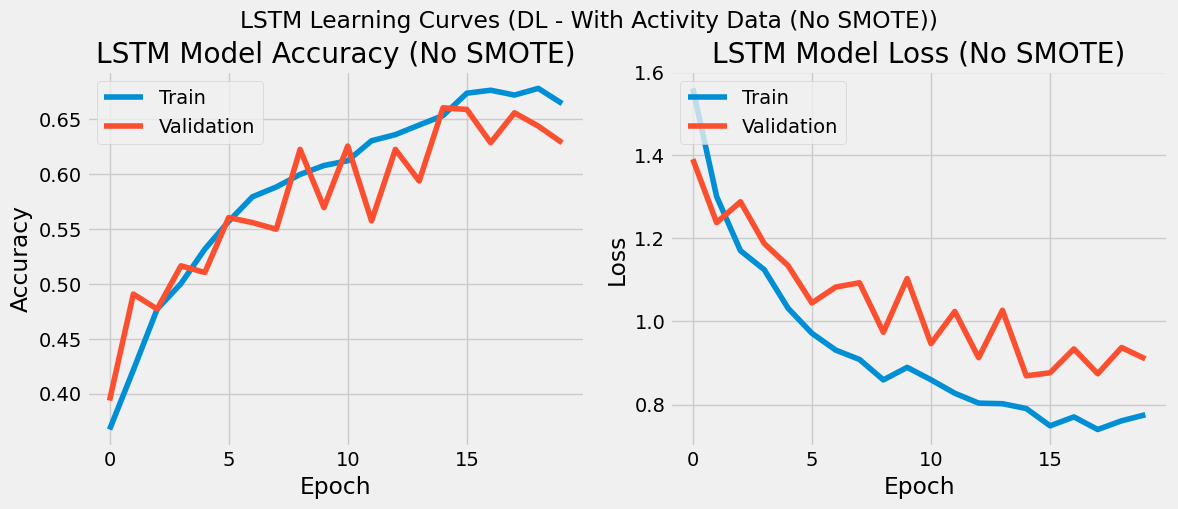

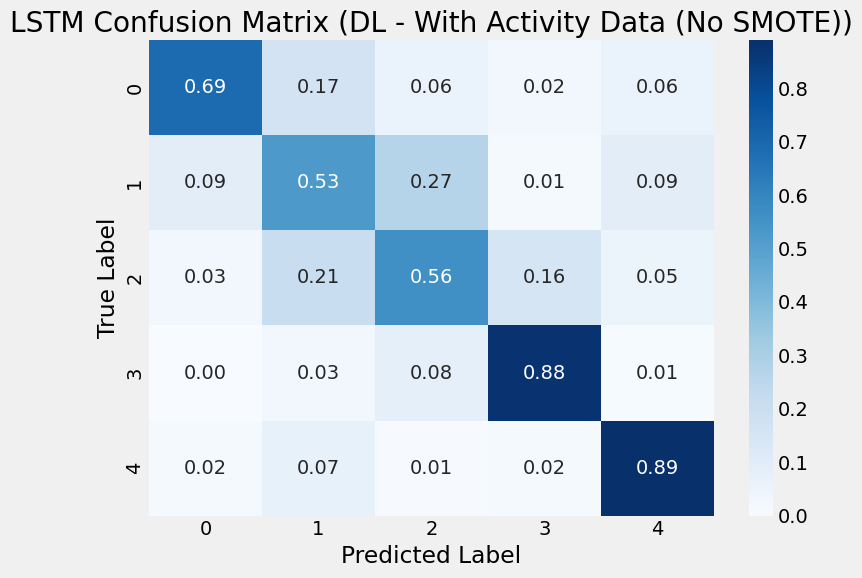


--- Evaluating MLP (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MLP Test Acc: 0.5440, Macro F1: 0.4950


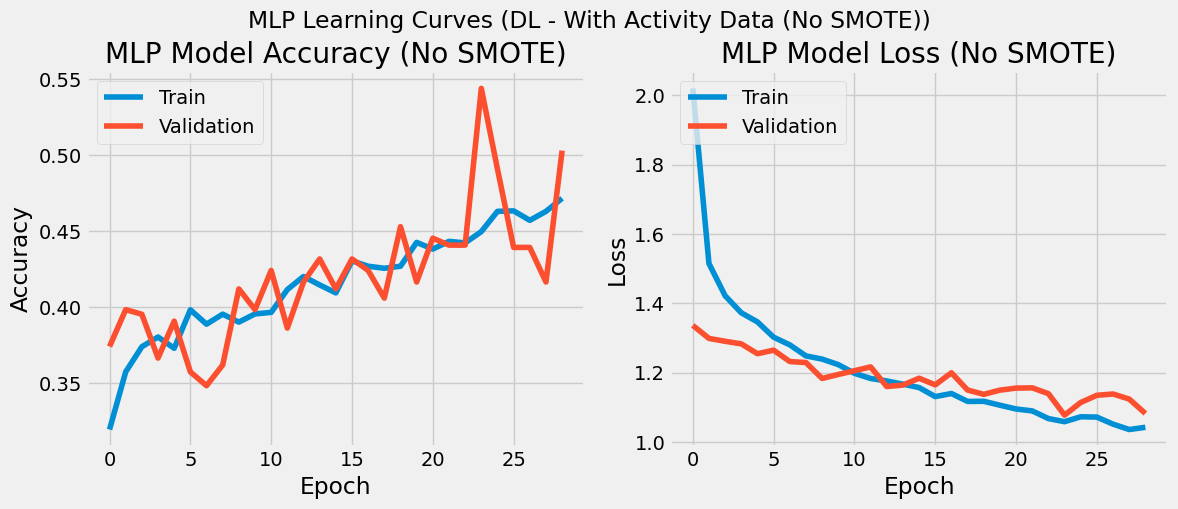

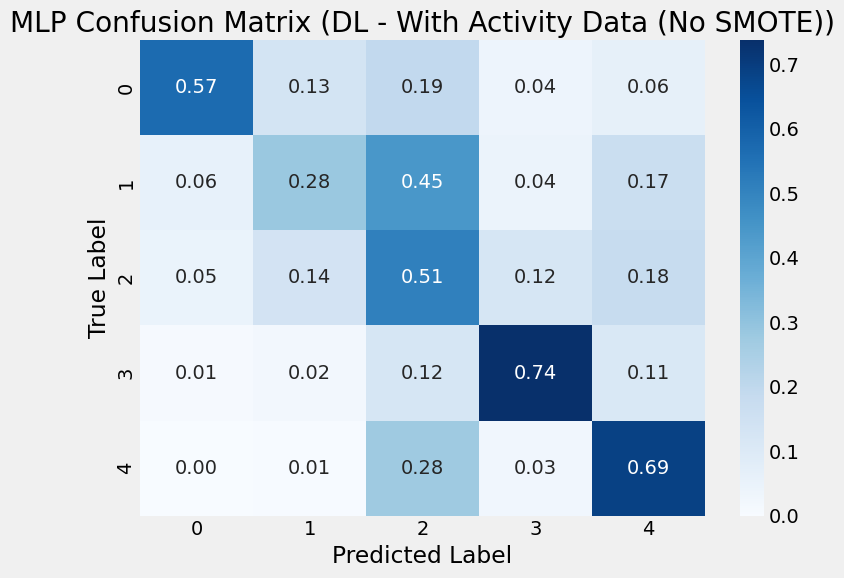


--- Evaluating 1D CNN (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1D CNN Test Acc: 0.6295, Macro F1: 0.5866


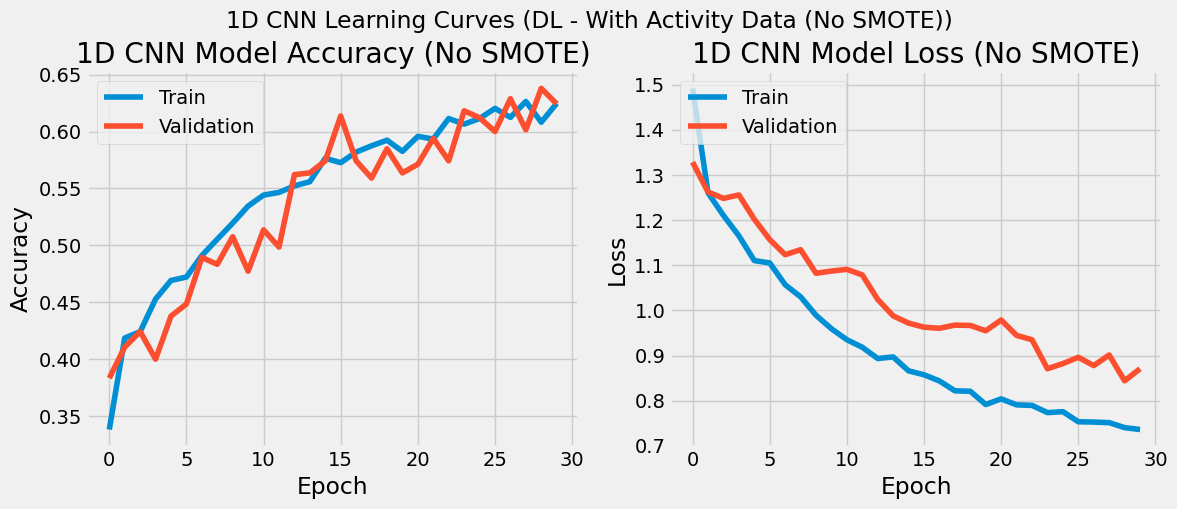

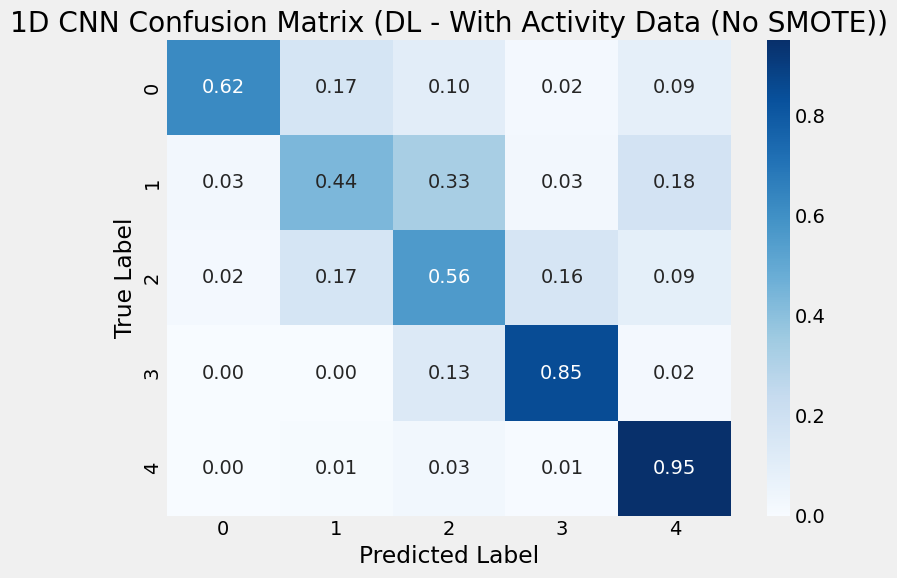


--- Evaluating GRU (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
GRU Test Acc: 0.6774, Macro F1: 0.6311


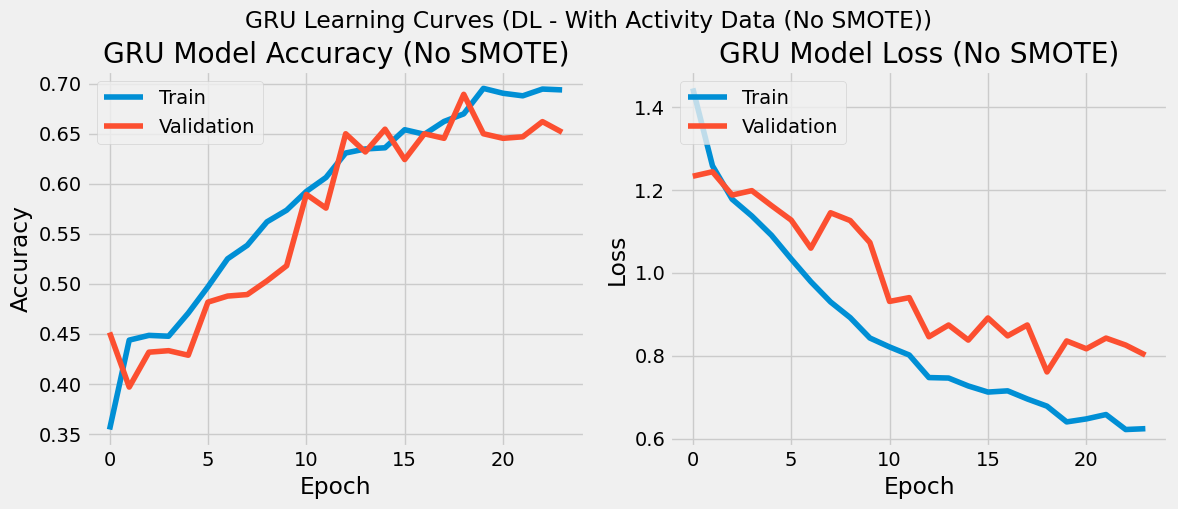

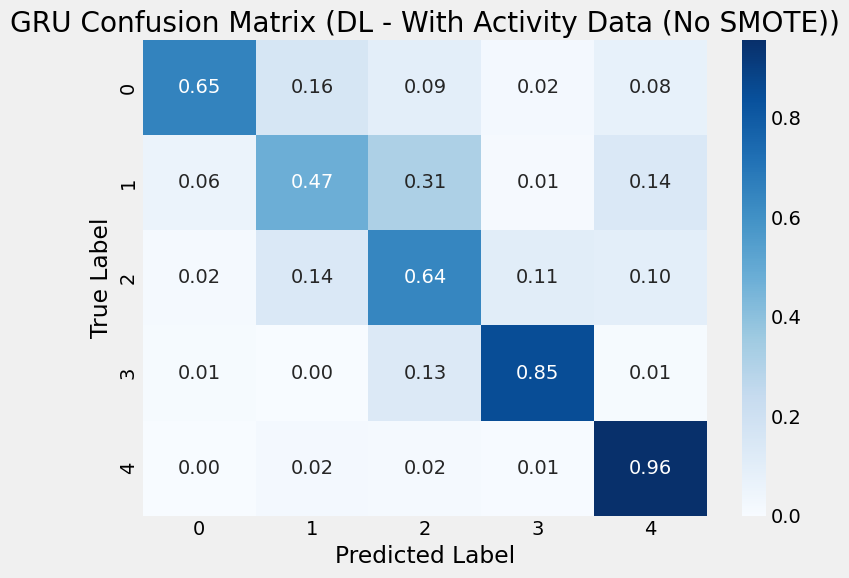


--- Evaluating BiLSTM (3-Class) ---
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
BiLSTM Test Acc: 0.4177, Macro F1: 0.4480


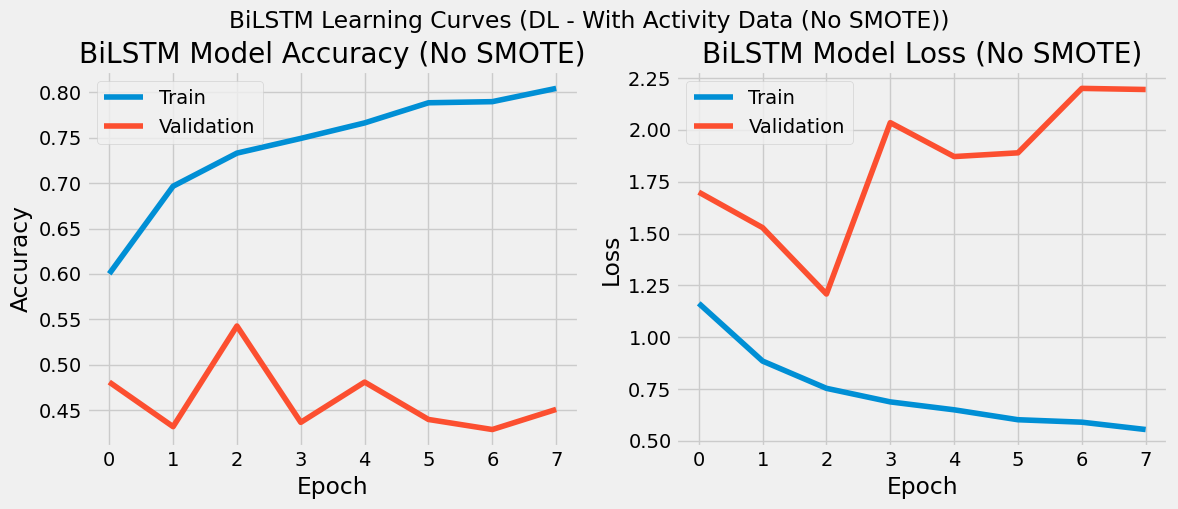

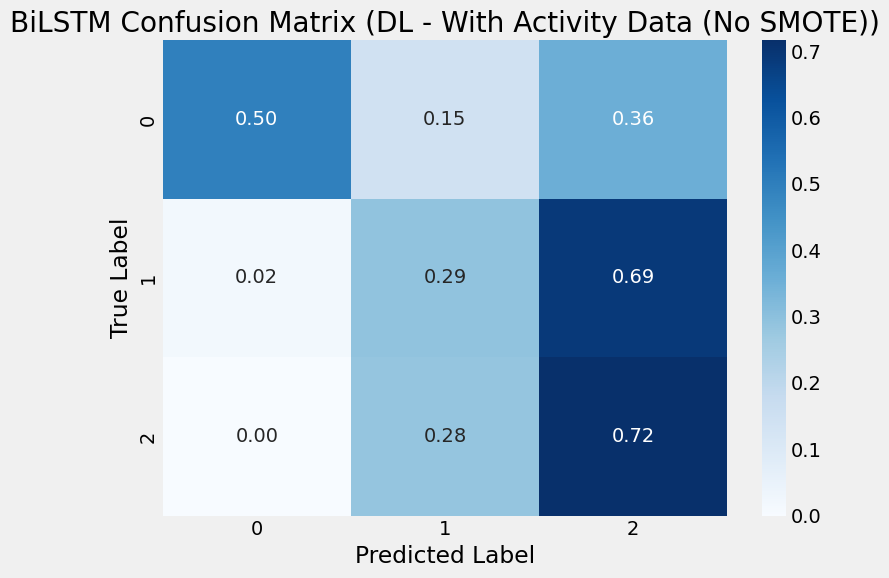


--- Deep Learning Models Results (With Activity Data - No SMOTE) ---
                             Scenario              Model  Test Accuracy  \
0  DL - With Activity Data (No SMOTE)    LSTM (No SMOTE)       0.653123   
1  DL - With Activity Data (No SMOTE)     MLP (No SMOTE)       0.543966   
2  DL - With Activity Data (No SMOTE)  1D CNN (No SMOTE)       0.629472   
3  DL - With Activity Data (No SMOTE)     GRU (No SMOTE)       0.677380   
4  DL - With Activity Data (No SMOTE)  BiLSTM (No SMOTE)       0.417722   

   Macro F1  Weighted F1  
0  0.616609     0.680160  
1  0.494983     0.562596  
2  0.586594     0.650788  
3  0.631102     0.695134  
4  0.447994     0.459240  

--- Running Deep Learning Models: DL - Without Activity Data (No SMOTE) (Without SMOTE) ---

--- Evaluating LSTM (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
LSTM Test Acc: 0.6568, Macro F1: 0.6231


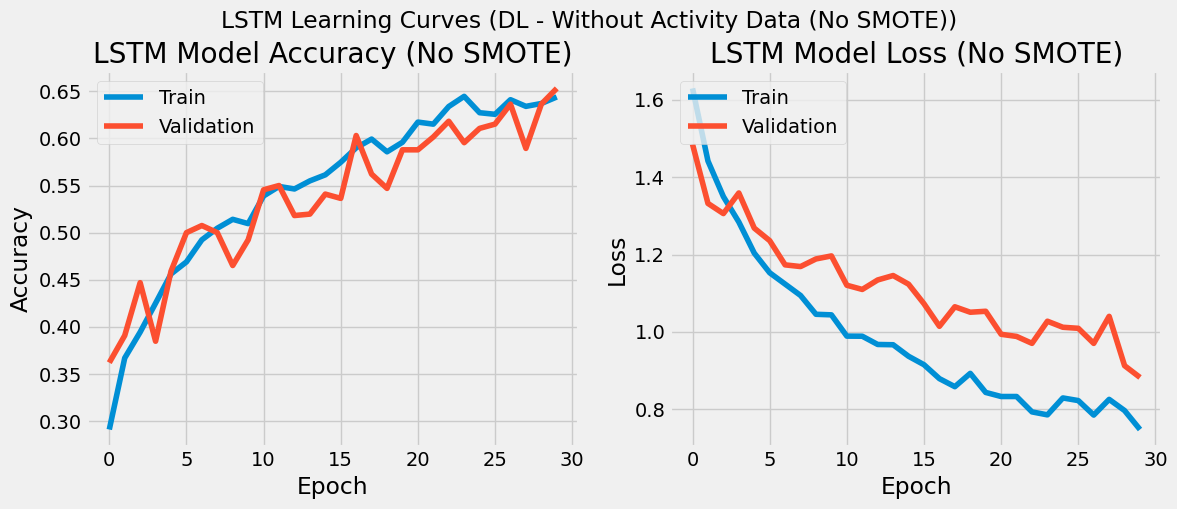

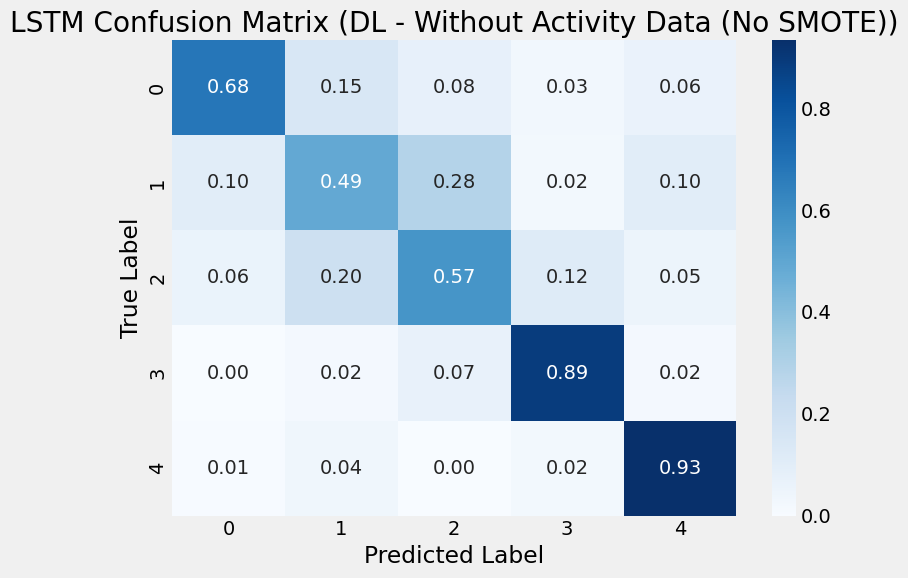


--- Evaluating MLP (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MLP Test Acc: 0.3875, Macro F1: 0.3597


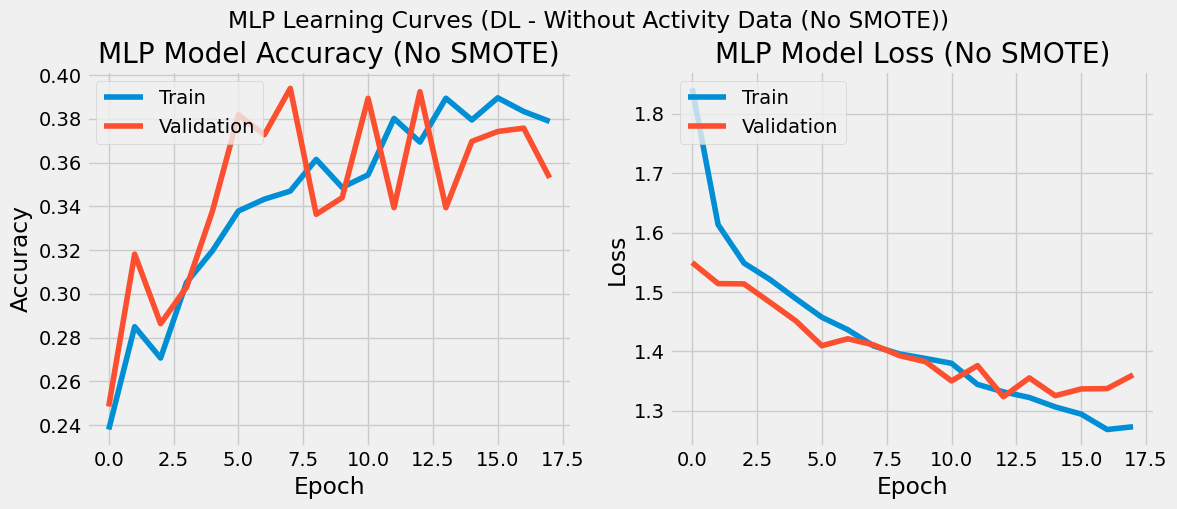

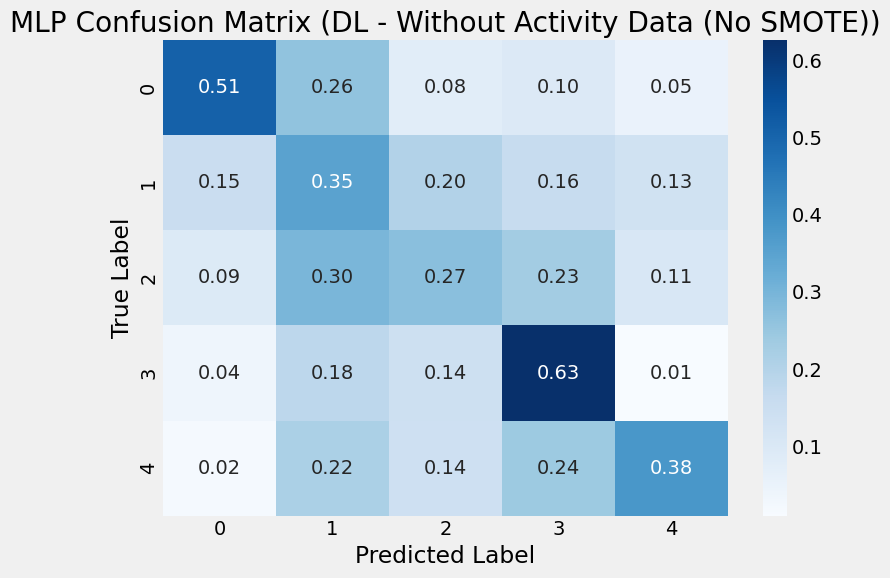


--- Evaluating 1D CNN (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1D CNN Test Acc: 0.5585, Macro F1: 0.5315


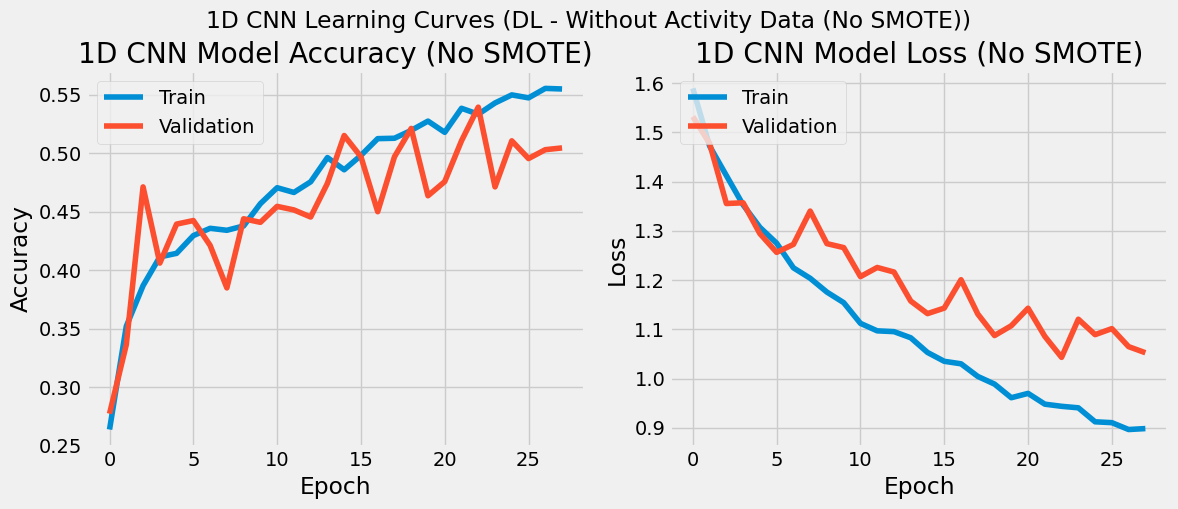

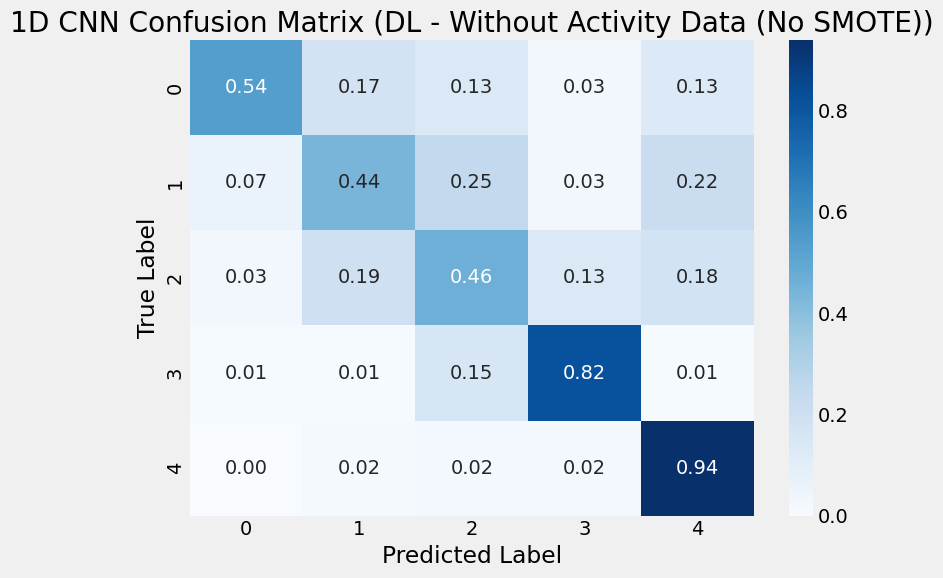


--- Evaluating GRU (5-class) ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
GRU Test Acc: 0.5846, Macro F1: 0.5642


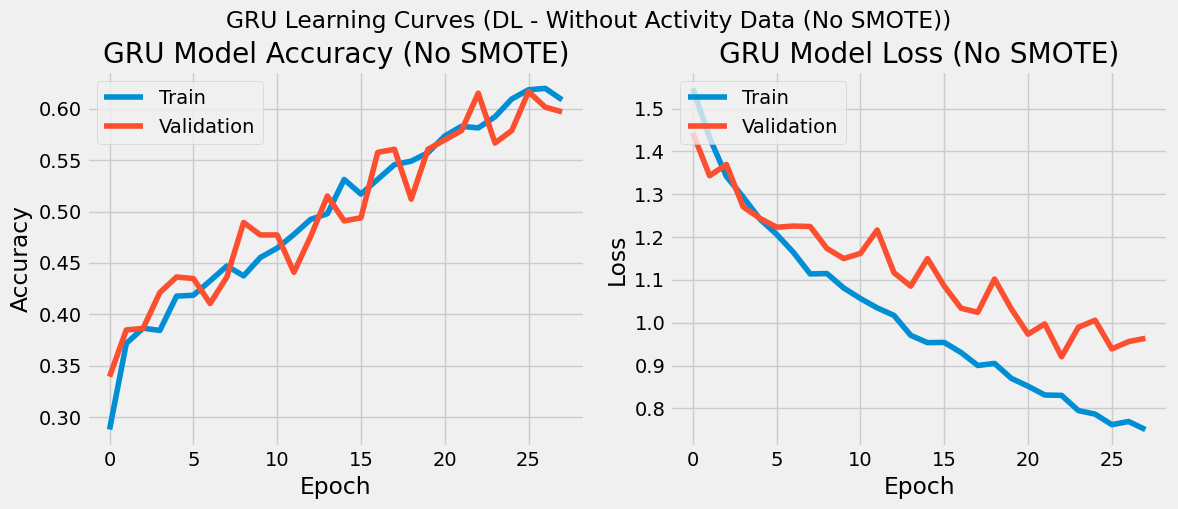

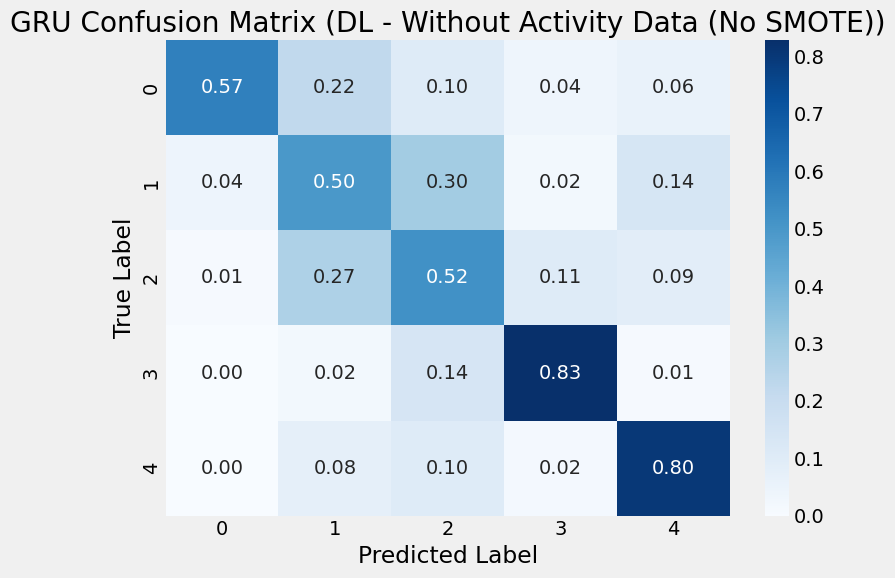


--- Evaluating BiLSTM (3-Class) ---
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step
BiLSTM Test Acc: 0.3929, Macro F1: 0.3452


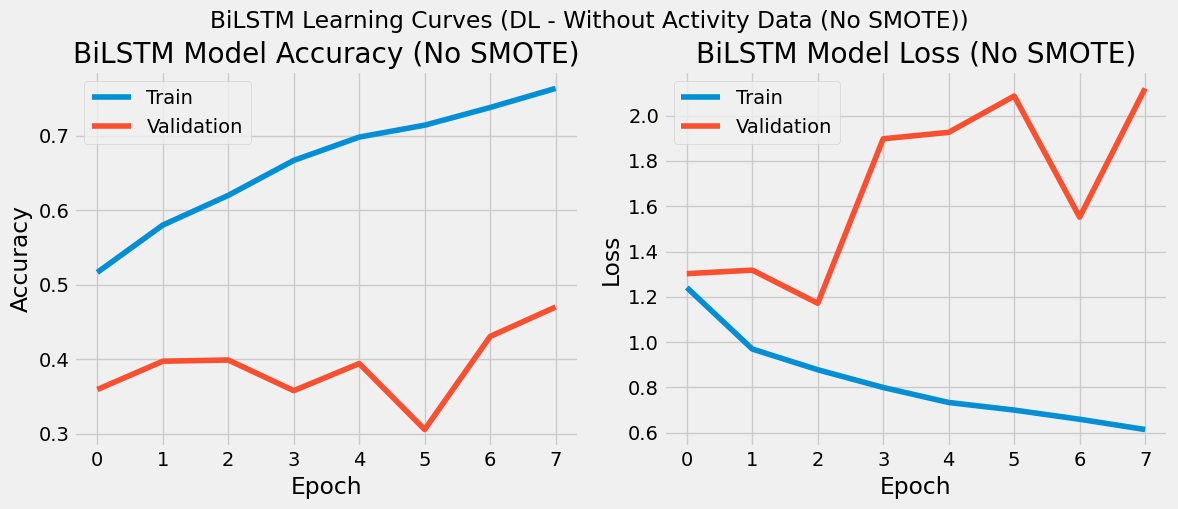

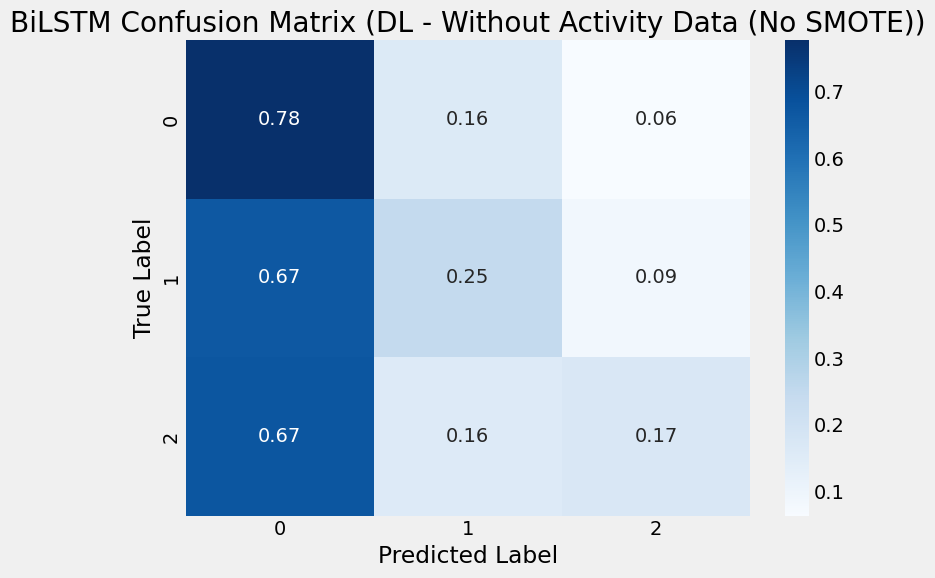


--- Deep Learning Models Results (Without Activity Data - No SMOTE) ---
                                Scenario              Model  Test Accuracy  \
0  DL - Without Activity Data (No SMOTE)    LSTM (No SMOTE)       0.656762   
1  DL - Without Activity Data (No SMOTE)     MLP (No SMOTE)       0.387508   
2  DL - Without Activity Data (No SMOTE)  1D CNN (No SMOTE)       0.558520   
3  DL - Without Activity Data (No SMOTE)     GRU (No SMOTE)       0.584597   
4  DL - Without Activity Data (No SMOTE)  BiLSTM (No SMOTE)       0.392932   

   Macro F1  Weighted F1  
0  0.623079     0.677084  
1  0.359689     0.426770  
2  0.531487     0.577630  
3  0.564206     0.618333  
4  0.345233     0.367284  

--- Overall Deep Learning Models Comparison (With and Without SMOTE) ---
                                 Scenario              Model  Test Accuracy  \
0                 DL - With Activity Data               LSTM       0.851209   
1                 DL - With Activity Data                MLP    

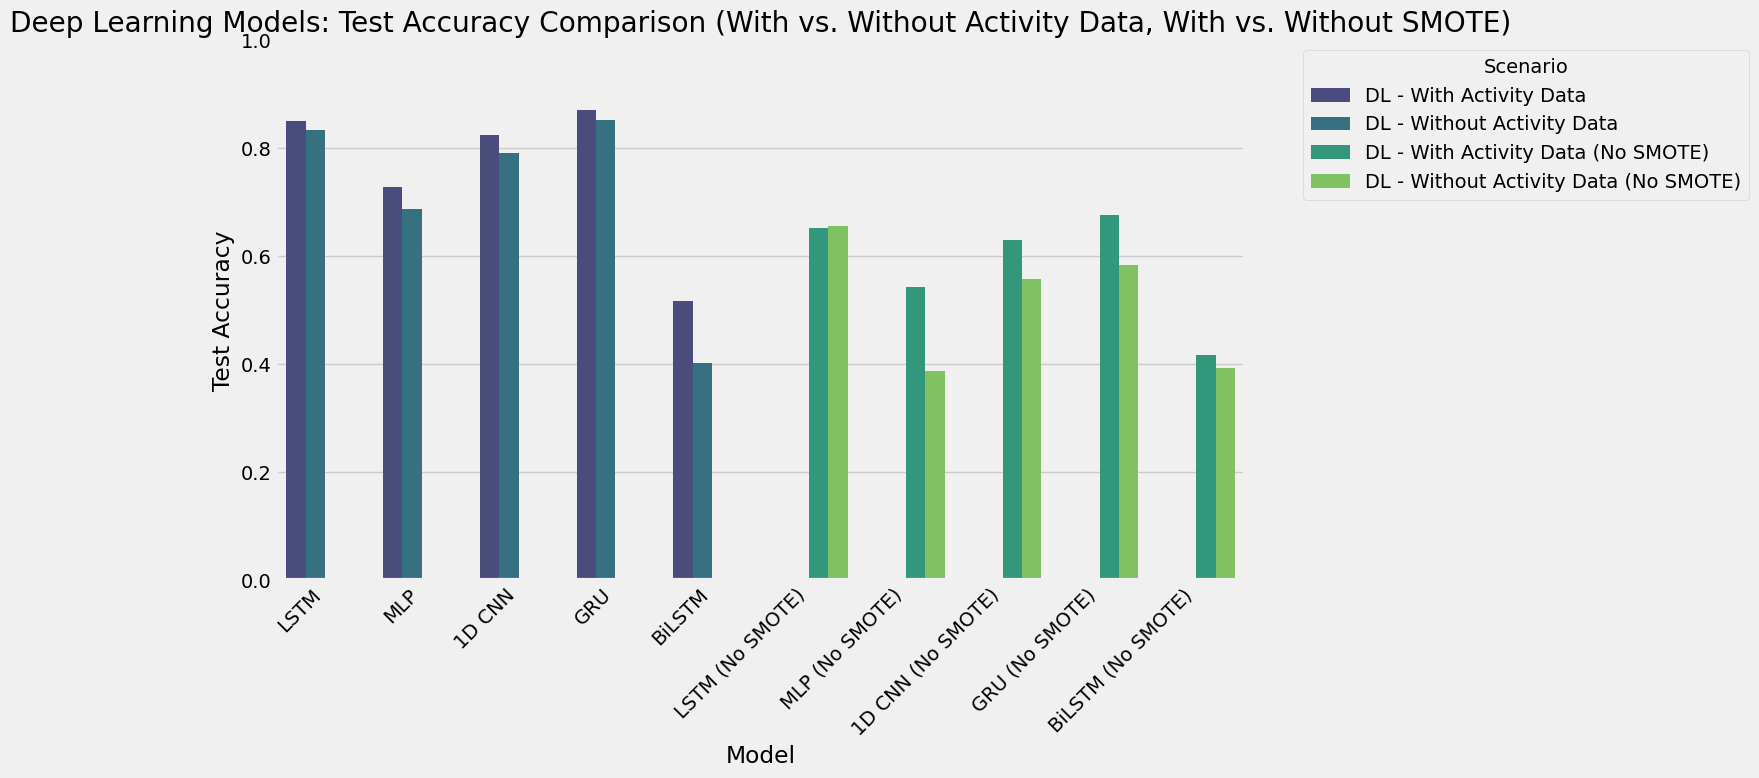

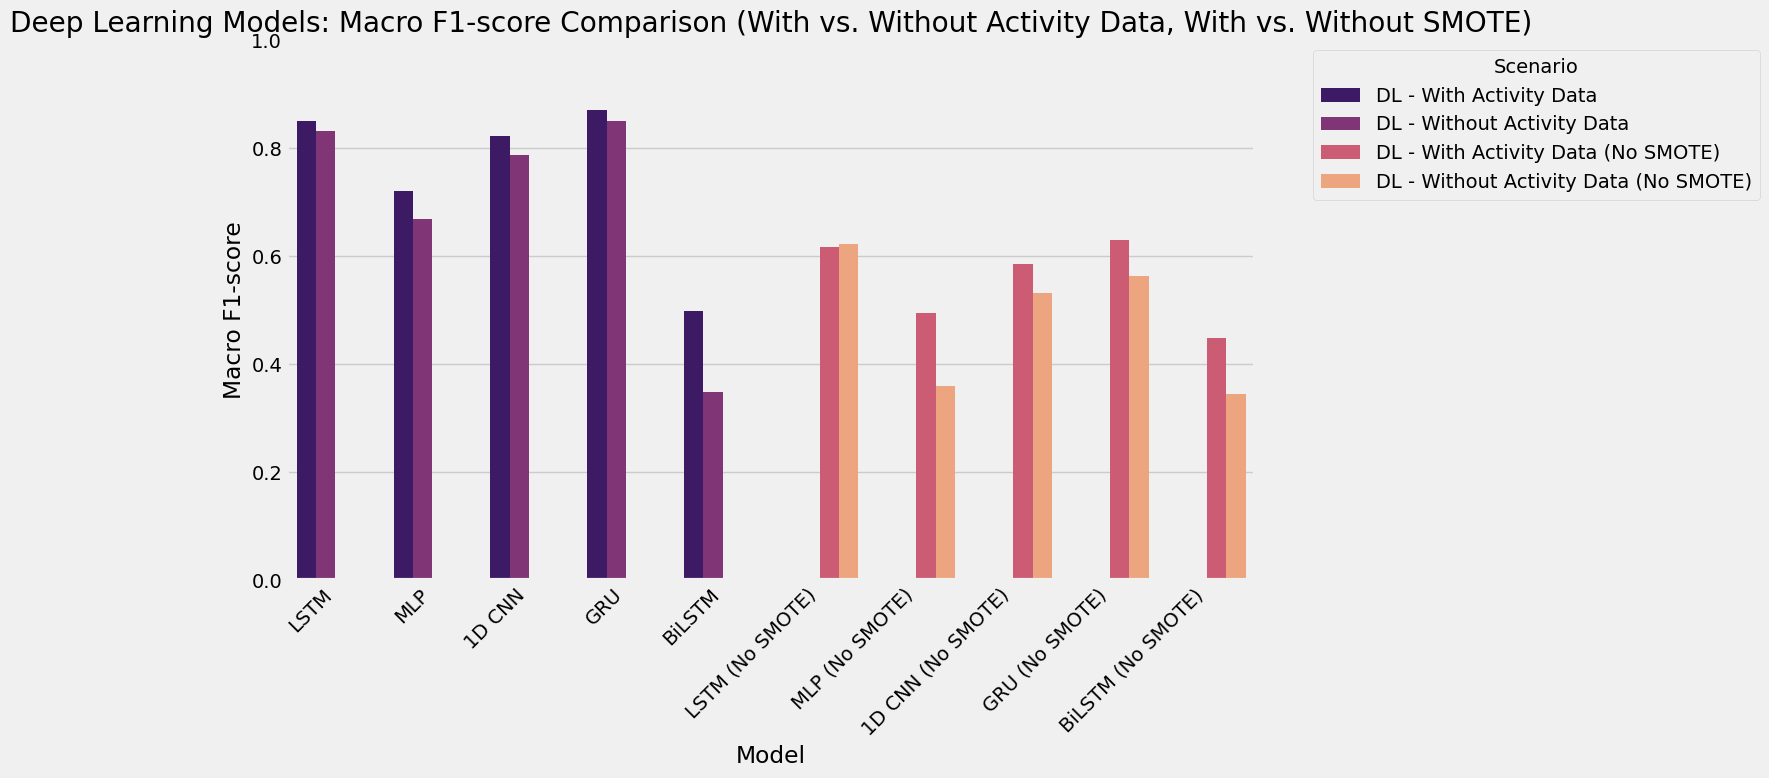


Deep Learning Model comparison (With and Without SMOTE) complete. Review the tables and plots above.


In [4]:

# --- 4. Deep Learning Model Comparison (Without SMOTE) ---
#
# This section evaluates the same Deep Learning models as before, but using the original training data without applying SMOTE oversampling. This allows for a direct comparison of model performance with and without SMOTE.

# %%
print("\n" + "="*60)
print("--- Deep Learning Model Comparison (Without SMOTE) ---")
print("="*60)

# Helper function to train and evaluate deep learning models *without* SMOTE
def train_evaluate_dl_no_smote(df_input, scenario_name, all_dl_results_list):
    print(f"\n--- Running Deep Learning Models: {scenario_name} (Without SMOTE) ---")

    # Define features based on scenario (same as before)
    features_5_class_base = [col for col in df_input.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
    if "Without Activity Data" in scenario_name:
        features_5_class = [f for f in features_5_class_base if f not in activity_related_features]
    else:
        features_5_class = features_5_class_base

    # Ensure all features are numeric, coerce errors to NaN and fill (already done, but safe to re-check)
    for col in features_5_class:
         if col in df_input.columns:
            df_input[col] = pd.to_numeric(df_input[col], errors='coerce')
            df_input[col].fillna(df_input[col].mean(), inplace=True)
            df_input[col].fillna(0, inplace=True)

    # Create sequences for 5-class models
    data_array_5_class = df_input[features_5_class + ['sleep_stage_encoded_5_class']].values
    X_seq_5_class, y_seq_5_class = create_sequences_dl(data_array_5_class, seq_length=SEQ_LENGTH, target_idx=-1)

    if X_seq_5_class.size == 0 or y_seq_5_class.size == 0:
        print(f"Skipping 5-class DL models for {scenario_name}: Not enough valid sequences generated.")
        # Still attempt BiLSTM if possible
        if 'BiLSTM' in [m['Model'] for m in all_dl_results_list if m['Scenario'] == scenario_name]:
             pass
        else:
             return


    n_samples_5, seq_len_5, n_feats_5 = X_seq_5_class.shape
    if n_feats_5 == 0:
        print(f"Skipping 5-class DL models for {scenario_name}: No features available.")
        # Still attempt BiLSTM if possible
        if 'BiLSTM' in [m['Model'] for m in all_dl_results_list if m['Scenario'] == scenario_name]:
             pass
        else:
             return


    # Split data (without SMOTE)
    X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
        X_seq_5_class, y_seq_5_class, test_size=TEST_SIZE, stratify=y_seq_5_class, random_state=RANDOM_SEED
    )

    # Scale features
    scaler_5 = StandardScaler()
    X_train_flat_5 = X_train_5.reshape(-1, n_feats_5)
    X_test_flat_5 = X_test_5.reshape(-1, n_feats_5)
    X_train_scaled_5 = scaler_5.fit_transform(X_train_flat_5).reshape(X_train_5.shape)
    X_test_scaled_5 = scaler_5.transform(X_test_flat_5).reshape(X_test_5.shape)

    num_classes_5 = len(np.unique(y_seq_5_class))
    y_train_cat_5 = to_categorical(y_train_5, num_classes_5)
    y_test_cat_5 = to_categorical(y_test_5, num_classes_5)

    # Calculate class weights for 5-class models (to address imbalance without SMOTE)
    class_weights_5 = compute_class_weight('balanced', classes=np.arange(num_classes_5), y=y_train_5)
    class_weights_5 = dict(enumerate(class_weights_5))

    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # --- LSTM (5-class) ---
    print("\n--- Evaluating LSTM (5-class) ---")
    model_lstm = Sequential([
        LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, n_feats_5), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes_5, activation='softmax')
    ])
    model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_lstm = model_lstm.fit(X_train_scaled_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                   batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_lstm, acc_lstm = model_lstm.evaluate(X_test_scaled_5, y_test_cat_5, verbose=0)
    y_pred_lstm = np.argmax(model_lstm.predict(X_test_scaled_5), axis=1)
    report_lstm = classification_report(y_test_5, y_pred_lstm, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'LSTM (No SMOTE)', 'Test Accuracy': acc_lstm,
        'Macro F1': report_lstm['macro avg']['f1-score'], 'Weighted F1': report_lstm['weighted avg']['f1-score']
    })
    print(f"LSTM Test Acc: {acc_lstm:.4f}, Macro F1: {report_lstm['macro avg']['f1-score']:.4f}")

    # Plot learning curves for LSTM (No SMOTE)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_lstm.history['accuracy'])
    plt.plot(history_lstm.history['val_accuracy'])
    plt.title('LSTM Model Accuracy (No SMOTE)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history_lstm.history['loss'])
    plt.plot(history_lstm.history['val_loss'])
    plt.title('LSTM Model Loss (No SMOTE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.suptitle(f'LSTM Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # Plot Confusion Matrix for LSTM (No SMOTE)
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_lstm, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'LSTM Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- MLP (5-class) ---
    print("\n--- Evaluating MLP (5-class) ---")
    X_train_mlp_5 = X_train_scaled_5.reshape(X_train_scaled_5.shape[0], -1)
    X_test_mlp_5 = X_test_scaled_5.reshape(X_test_scaled_5.shape[0], -1)
    model_mlp = Sequential([
        Dense(256, activation='relu', input_shape=(seq_len_5*n_feats_5,)), Dropout(0.5),
        Dense(128, activation='relu'), Dropout(0.5), Dense(num_classes_5, activation='softmax')
    ])
    model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_mlp = model_mlp.fit(X_train_mlp_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                 batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_mlp, acc_mlp = model_mlp.evaluate(X_test_mlp_5, y_test_cat_5, verbose=0)
    y_pred_mlp = np.argmax(model_mlp.predict(X_test_mlp_5), axis=1)
    report_mlp = classification_report(y_test_5, y_pred_mlp, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'MLP (No SMOTE)', 'Test Accuracy': acc_mlp,
        'Macro F1': report_mlp['macro avg']['f1-score'], 'Weighted F1': report_mlp['weighted avg']['f1-score'] # Fixed syntax error here
    })
    print(f"MLP Test Acc: {acc_mlp:.4f}, Macro F1: {report_mlp['macro avg']['f1-score']:.4f}")

    # Plot learning curves for MLP (No SMOTE)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_mlp.history['accuracy'])
    plt.plot(history_mlp.history['val_accuracy'])
    plt.title('MLP Model Accuracy (No SMOTE)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history_mlp.history['loss'])
    plt.plot(history_mlp.history['val_loss'])
    plt.title('MLP Model Loss (No SMOTE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.suptitle(f'MLP Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # Plot Confusion Matrix for MLP (No SMOTE)
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_mlp, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'MLP Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- 1D CNN (5-class) ---
    print("\n--- Evaluating 1D CNN (5-class) ---")
    model_cnn = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQ_LENGTH, n_feats_5)), Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'), GlobalMaxPooling1D(),
        Dense(128, activation='relu'), Dropout(0.4), Dense(num_classes_5, activation='softmax')
    ])
    model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_cnn = model_cnn.fit(X_train_scaled_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                 batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_cnn, acc_cnn = model_cnn.evaluate(X_test_scaled_5, y_test_cat_5, verbose=0)
    y_pred_cnn = np.argmax(model_cnn.predict(X_test_scaled_5), axis=1)
    report_cnn = classification_report(y_test_5, y_pred_cnn, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': '1D CNN (No SMOTE)', 'Test Accuracy': acc_cnn,
        'Macro F1': report_cnn['macro avg']['f1-score'], 'Weighted F1': report_cnn['weighted avg']['f1-score']
    })
    print(f"1D CNN Test Acc: {acc_cnn:.4f}, Macro F1: {report_cnn['macro avg']['f1-score']:.4f}")

    # Plot learning curves for 1D CNN (No SMOTE)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['accuracy'])
    plt.plot(history_cnn.history['val_accuracy'])
    plt.title('1D CNN Model Accuracy (No SMOTE)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['loss'])
    plt.plot(history_cnn.history['val_loss'])
    plt.title('1D CNN Model Loss (No SMOTE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.suptitle(f'1D CNN Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # Plot Confusion Matrix for 1D CNN (No SMOTE)
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_cnn, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'1D CNN Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- GRU (5-class) ---
    print("\n--- Evaluating GRU (5-class) ---")
    model_gru = Sequential([
        GRU(64, return_sequences=True, input_shape=(SEQ_LENGTH, n_feats_5)), Dropout(0.3),
        GRU(64), Dropout(0.3), Dense(32, activation='relu'),
        Dense(num_classes_5, activation='softmax')
    ])
    model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_gru = model_gru.fit(X_train_scaled_5, y_train_cat_5, validation_split=0.1, epochs=EPOCHS,
                                 batch_size=BATCH_SIZE, class_weight=class_weights_5, callbacks=[es], verbose=0)
    loss_gru, acc_gru = model_gru.evaluate(X_test_scaled_5, y_test_cat_5, verbose=0)
    y_pred_gru = np.argmax(model_gru.predict(X_test_scaled_5), axis=1)
    report_gru = classification_report(y_test_5, y_pred_gru, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'GRU (No SMOTE)', 'Test Accuracy': acc_gru,
        'Macro F1': report_gru['macro avg']['f1-score'], 'Weighted F1': report_gru['weighted avg']['f1-score']
    })
    print(f"GRU Test Acc: {acc_gru:.4f}, Macro F1: {report_gru['macro avg']['f1-score']:.4f}")

    # Plot learning curves for GRU (No SMOTE)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_gru.history['accuracy'])
    plt.plot(history_gru.history['val_accuracy'])
    plt.title('GRU Model Accuracy (No SMOTE)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history_gru.history['loss'])
    plt.plot(history_gru.history['val_loss'])
    plt.title('GRU Model Loss (No SMOTE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.suptitle(f'GRU Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # Plot Confusion Matrix for GRU (No SMOTE)
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_5)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_5, y_pred_gru, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'GRU Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # --- BiLSTM (3-class classification) ---
    print("\n--- Evaluating BiLSTM (3-Class) ---")
    # Re-map to 3 classes for BiLSTM
    df_bilstm_3class = df_input.copy()
    stage_map_3_class = {0.:0, 1.:1, 2.:1, 3.:2, 5.:2} # Wake:0, NREM(N1,N2):1, Deep(N3,REM):2
    df_bilstm_3class['sleep_stage_encoded_3_class'] = df_bilstm_3class['sleep stage'].map(stage_map_3_class)
    df_bilstm_3class.dropna(subset=['sleep_stage_encoded_3_class'], inplace=True)
    df_bilstm_3class['sleep_stage_encoded_3_class'] = df_bilstm_3class['sleep_stage_encoded_3_class'].astype(int)

    # Determine features for BiLSTM (respecting scenario)
    features_bilstm_base = [col for col in df_bilstm_3class.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
    if "Without Activity Data" in scenario_name:
        features_bilstm = [f for f in features_bilstm_base if f not in activity_related_features]
    else:
        features_bilstm = features_bilstm_base

    # Ensure all features are numeric, coerce errors to NaN and fill (already done, but safe to re-check)
    for col in features_bilstm:
         if col in df_bilstm_3class.columns:
            df_bilstm_3class[col] = pd.to_numeric(df_bilstm_3class[col], errors='coerce')
            df_bilstm_3class[col].fillna(df_bilstm_3class[col].mean(), inplace=True)
            df_bilstm_3class[col].fillna(0, inplace=True)

    # Participant-wise split for BiLSTM (as per original code's BiLSTM section)
    unique_mesaids_bilstm = df_bilstm_3class['mesaid'].unique()
    if len(unique_mesaids_bilstm) < 2:
        print(f"Skipping BiLSTM for {scenario_name}: Not enough unique 'mesaid' for group split.")
        return

    gss_bilstm = GroupShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_SEED)
    train_idx_bilstm, test_idx_bilstm = next(gss_bilstm.split(df_bilstm_3class, groups=df_bilstm_3class['mesaid']))
    train_df_bilstm = df_bilstm_3class.iloc[train_idx_bilstm].copy()
    test_df_bilstm = df_bilstm_3class.iloc[test_idx_bilstm].copy()

    # Create sequences using the train/test DFs for BiLSTM's feature set and 3-class target
    X_train_bilstm, y_train_bilstm = create_sequences_dl(train_df_bilstm[features_bilstm + ['sleep_stage_encoded_3_class']].values, target_idx=-1)
    X_test_bilstm, y_test_bilstm = create_sequences_dl(test_df_bilstm[features_bilstm + ['sleep_stage_encoded_3_class']].values, target_idx=-1)

    if X_train_bilstm.size == 0 or X_test_bilstm.size == 0:
        print(f"Skipping BiLSTM for {scenario_name}: Not enough sequences after group split.")
        return

    # Scale features for BiLSTM
    scaler_bilstm = StandardScaler()
    n_features_bilstm = X_train_bilstm.shape[2] # Use original train data shape
    X_train_bilstm_scaled = scaler_bilstm.fit_transform(X_train_bilstm.reshape(-1, n_features_bilstm)).reshape(-1, SEQ_LENGTH, n_features_bilstm)
    X_test_bilstm_scaled = scaler_bilstm.transform(X_test_bilstm.reshape(-1, n_features_bilstm)).reshape(-1, SEQ_LENGTH, n_features_bilstm)

    num_classes_bilstm = len(np.unique(y_train_bilstm)) # Use original train labels for class count
    y_train_bilstm_cat = to_categorical(y_train_bilstm, num_classes_bilstm)
    y_test_bilstm_cat = to_categorical(y_test_bilstm, num_classes_bilstm)

    # Calculate class weights for BiLSTM (to address imbalance without SMOTE)
    class_weights_bilstm = compute_class_weight('balanced', classes=np.arange(num_classes_bilstm), y=y_train_bilstm)
    class_weights_bilstm = dict(enumerate(class_weights_bilstm))


    model_bilstm = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)), input_shape=(SEQ_LENGTH, n_features_bilstm)),
        Dropout(0.4),
        Bidirectional(LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(num_classes_bilstm, activation='softmax')
    ])
    model_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_bilstm = model_bilstm.fit(X_train_bilstm_scaled, y_train_bilstm_cat, validation_split=0.1, epochs=EPOCHS,
                                       batch_size=BATCH_SIZE, callbacks=[es], class_weight=class_weights_bilstm, verbose=0) # Added class_weight
    loss_bilstm, acc_bilstm = model_bilstm.evaluate(X_test_bilstm_scaled, y_test_bilstm_cat, verbose=0)
    y_pred_bilstm = np.argmax(model_bilstm.predict(X_test_bilstm_scaled), axis=1)
    report_bilstm = classification_report(y_test_bilstm, y_pred_bilstm, output_dict=True)
    all_dl_results_list.append({
        'Scenario': scenario_name, 'Model': 'BiLSTM (No SMOTE)', 'Test Accuracy': acc_bilstm,
        'Macro F1': report_bilstm['macro avg']['f1-score'], 'Weighted F1': report_bilstm['weighted avg']['f1-score']
    })
    print(f"BiLSTM Test Acc: {acc_bilstm:.4f}, Macro F1: {report_bilstm['macro avg']['f1-score']:.4f}")

    # Plot learning curves for BiLSTM (No SMOTE)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_bilstm.history['accuracy'])
    plt.plot(history_bilstm.history['val_accuracy'])
    plt.title('BiLSTM Model Accuracy (No SMOTE)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history_bilstm.history['loss'])
    plt.plot(history_bilstm.history['val_loss'])
    plt.title('BiLSTM Model Loss (No SMOTE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.suptitle(f'BiLSTM Learning Curves ({scenario_name})', y=1.02)
    plt.show()

    # Plot Confusion Matrix for BiLSTM (No SMOTE)
    plt.figure(figsize=(8, 6))
    unique_actual_labels = np.unique(y_test_bilstm)
    target_names_for_plot = [str(int(s)) for s in unique_actual_labels]
    sns.heatmap(confusion_matrix(y_test_bilstm, y_pred_bilstm, normalize='true'), annot=True, fmt='.2f', cmap='Blues',
                xticklabels=target_names_for_plot, yticklabels=target_names_for_plot)
    plt.title(f'BiLSTM Confusion Matrix ({scenario_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()



# --- Run DL Evaluation Without SMOTE ---

# Scenario 3: With Activity Data (DL Models Without SMOTE)
# Reuse df_for_dl_original
dl_results_all_features_no_smote = []
train_evaluate_dl_no_smote(df_for_dl_original, "DL - With Activity Data (No SMOTE)", dl_results_all_features_no_smote)
results_df_dl_full_no_smote = pd.DataFrame(dl_results_all_features_no_smote)
print("\n--- Deep Learning Models Results (With Activity Data - No SMOTE) ---")
print(results_df_dl_full_no_smote)

# Scenario 4: Without Activity Data (DL Models Without SMOTE)
# Reuse df_for_dl_no_activity
dl_results_no_activity_features_no_smote = []
train_evaluate_dl_no_smote(df_for_dl_no_activity, "DL - Without Activity Data (No SMOTE)", dl_results_no_activity_features_no_smote)
results_df_dl_no_activity_no_smote = pd.DataFrame(dl_results_no_activity_features_no_smote)
print("\n--- Deep Learning Models Results (Without Activity Data - No SMOTE) ---")
print(results_df_dl_no_activity_no_smote)

# --- Compare Deep Learning Models Results (With and Without SMOTE) ---
comparison_dl_smote_df = pd.concat([results_df_dl_full, results_df_dl_no_activity, results_df_dl_full_no_smote, results_df_dl_no_activity_no_smote]).reset_index(drop=True)
print("\n--- Overall Deep Learning Models Comparison (With and Without SMOTE) ---")
print(comparison_dl_smote_df)

# Visualization for comparison (Test Accuracy)
plt.figure(figsize=(16, 8))
sns.barplot(data=comparison_dl_smote_df, x='Model', y='Test Accuracy', hue='Scenario', palette='viridis')
plt.title('Deep Learning Models: Test Accuracy Comparison (With vs. Without Activity Data, With vs. Without SMOTE)')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization for comparison (Macro F1-score)
plt.figure(figsize=(16, 8))
sns.barplot(data=comparison_dl_smote_df, x='Model', y='Macro F1', hue='Scenario', palette='magma')
plt.title('Deep Learning Models: Macro F1-score Comparison (With vs. Without Activity Data, With vs. Without SMOTE)')
plt.ylabel('Macro F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nDeep Learning Model comparison (With and Without SMOTE) complete. Review the tables and plots above.")

In [26]:
def run_kfold_cv_dl(model_builder, df_data, features, target_col, seq_length, n_splits=5, random_state=42, epochs=EPOCHS, batch_size=BATCH_SIZE):
    """
    Performs k-fold cross-validation for a deep learning model.

    Args:
        model_builder: A function that builds and compiles the Keras model.
                       It should accept (input_shape, num_classes) as arguments.
        df_data: The DataFrame containing the data.
        features: A list of feature column names.
        target_col: The name of the target column.
        seq_length: The sequence length for time series data.
        n_splits: The number of folds for k-fold cross-validation.
        random_state: Random state for reproducibility.
        epochs: Number of training epochs.
        batch_size: Batch size for training.

    Returns:
        A tuple containing the mean and standard deviation of accuracy and
        macro F1-score across all folds.
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold_accuracies = []
    fold_macro_f1s = []

    # Prepare data array before splitting
    data_array = df_data[features + [target_col]].values

    if data_array.size == 0:
        print("Error: Input data array is empty.")
        return None, None, None, None

    # Ensure target column is the last one for create_sequences_dl
    target_idx = len(features)
    num_features_raw = data_array.shape[1] - 1 # Number of features in raw data

    # Use original full data length to determine if sequences can be created
    if len(data_array) < seq_length:
         print(f"Warning: Data length ({len(data_array)}) is less than sequence length ({seq_length}). Cannot create sequences.")
         return None, None, None, None


    print(f"\n--- Running K-Fold CV ({n_splits} folds) ---")
    for fold, (train_idx, val_idx) in enumerate(kfold.split(data_array)):
        print(f"--- Fold {fold+1}/{n_splits} ---")

        # Split data by index
        train_data_raw = data_array[train_idx]
        val_data_raw = data_array[val_idx]

        print(f"  Raw train data shape: {train_data_raw.shape}")
        print(f"  Raw validation data shape: {val_data_raw.shape}")


        # Separate features and target for SMOTE and scaling from raw split data
        X_train_raw = train_data_raw[:, :num_features_raw]
        y_train_raw = train_data_raw[:, num_features_raw] # Target is the last column

        X_val_raw = val_data_raw[:, :num_features_raw]
        y_val_raw = val_data_raw[:, num_features_raw] # Target is the last column


        print(f"  X_train_raw shape: {X_train_raw.shape}, y_train_raw shape: {y_train_raw.shape}")
        print(f"  X_val_raw shape: {X_val_raw.shape}, y_val_raw shape: {y_val_raw.shape}")


        # --- Apply SMOTE *only* to the raw training data within the fold ---
        if X_train_raw.ndim > 1 and y_train_raw.ndim > 0 and X_train_raw.shape[0] > 0 and X_train_raw.shape[1] > 0:
            smote = SMOTE(random_state=random_state)
            try:
                # Apply SMOTE to raw training features and labels
                X_train_resampled, y_train_resampled = smote.fit_resample(X_train_raw, y_train_raw)
                print(f"  SMOTE applied to raw training data. Original train raw shape: {X_train_raw.shape}, Resampled train raw shape: {X_train_resampled.shape}")
                print(f"  Original train raw labels shape: {y_train_raw.shape}, Resampled train labels shape: {y_train_resampled.shape}")

            except ValueError as e:
               print(f"  SMOTE failed for training data in fold {fold+1}: {e}")
               print("  Skipping this fold.")
               continue # Skip this fold if SMOTE fails
            except Exception as e:
               print(f"  An unexpected error occurred during SMOTE for fold {fold+1}: {e}")
               print("  Skipping this fold.")
               continue
        else:
            print(f"  Warning: Training data raw shape {X_train_raw.shape} or target shape {y_train_raw.shape} is not suitable for SMOTE in fold {fold+1}. Skipping this fold.")
            continue # Skip this fold if data is not suitable


        # --- Create sequences *after* SMOTE from the resampled training data ---
        # create_sequences_dl expects data in shape (num_samples, num_features) with target as last column
        # Combine resampled features and resampled labels for sequence creation
        train_data_sequencing = np.hstack((X_train_resampled, y_train_resampled.reshape(-1, 1)))
        X_train_seq, y_train_seq = create_sequences_dl(train_data_sequencing, seq_length=seq_length, target_idx=-1)

        # --- Create sequences for validation data (NO SMOTE) ---
        # Combine original validation raw data and labels for sequence creation
        val_data_sequencing = np.hstack((X_val_raw, y_val_raw.reshape(-1, 1)))
        X_val_seq, y_val_seq = create_sequences_dl(val_data_sequencing, seq_length=seq_length, target_idx=-1)


        if X_train_seq.size == 0 or X_val_seq.size == 0:
            print(f"  Skipping fold {fold+1}: Not enough valid sequences generated after SMOTE or for validation.")
            continue # Skip fold if sequences cannot be created

        print(f"  Train sequence shape (after SMOTE and sequencing): {X_train_seq.shape}, Train sequence labels shape: {y_train_seq.shape}")
        print(f"  Validation sequence shape (no SMOTE): {X_val_seq.shape}, Validation sequence labels shape: {y_val_seq.shape}")


        # Scale features (fit on resampled training sequences, transform on resampled train and original validation sequences)
        scaler = StandardScaler()
        n_features_seq = X_train_seq.shape[-1] # Use the number of features from the sequences

        # Reshape sequences for scaling (flatten for scaler, then reshape back)
        X_train_seq_flat = X_train_seq.reshape(-1, n_features_seq)
        X_val_seq_flat = X_val_seq.reshape(-1, n_features_seq)

        X_train_scaled_flat = scaler.fit_transform(X_train_seq_flat)
        X_val_scaled_flat = scaler.transform(X_val_seq_flat)

        # Reshape back to sequences
        X_train_scaled = X_train_scaled_flat.reshape(-1, seq_length, n_features_seq)
        X_val_scaled = X_val_scaled_flat.reshape(-1, seq_length, n_features_seq)

        print(f"  Scaled train sequence shape: {X_train_scaled.shape}")
        print(f"  Scaled validation sequence shape: {X_val_scaled.shape}")


        num_classes = len(np.unique(y_train_seq)) # Use resampled and sequenced train labels to get class count
        if num_classes < 2:
            print(f"  Skipping fold {fold+1}: Only one class present in the resampled and sequenced training data.")
            continue


        # Convert target labels to categorical
        y_train_cat = to_categorical(y_train_seq, num_classes)
        y_val_cat = to_categorical(y_val_seq, num_classes)

        print(f"  Categorical train labels shape: {y_train_cat.shape}")
        print(f"  Categorical validation labels shape: {y_val_cat.shape}")


        # Calculate class weights for balanced training data
        # Use the labels *after* sequencing
        class_weights = compute_class_weight('balanced', classes=np.arange(num_classes), y=y_train_seq)
        class_weights = dict(enumerate(class_weights))
        print(f"  Class weights (based on resampled train labels): {class_weights}")


        # Build and compile the model for this fold
        # Pass the sequence input shape to ALL model builders
        model = model_builder((seq_length, n_features_seq), num_classes)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Define Early Stopping
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # --- Prepare data for model.fit based on model type ---
        # MLP expects flattened input
        if model_builder == build_mlp_model or model_builder == build_smaller_mlp_model:
             X_train_fit = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
             X_val_fit = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
             print(f"  MLP - Flattened train data shape for fit: {X_train_fit.shape}")
             print(f"  MLP - Flattened validation data shape for fit: {X_val_fit.shape}")
        else:
             X_train_fit = X_train_scaled
             X_val_fit = X_val_scaled
             print(f"  RNN/CNN - Train data shape for fit: {X_train_fit.shape}")
             print(f"  RNN/CNN - Validation data shape for fit: {X_val_fit.shape}")


        # Train the model
        print("  Training model...")
        history = model.fit(X_train_fit, y_train_cat, # Use resampled categorical labels for training
                            validation_data=(X_val_fit, y_val_cat),
                            epochs=epochs, # Use function argument epochs
                            batch_size=batch_size, # Use function argument batch_size
                            class_weight=class_weights,
                            callbacks=[es],
                            verbose=0) # Set verbose to 0 for cleaner output

        # Evaluate the model on the validation set
        print("  Evaluating model on validation set...")
        loss, accuracy = model.evaluate(X_val_fit, y_val_cat, verbose=0)
        y_pred = np.argmax(model.predict(X_val_fit), axis=1)

        # Calculate F1-score
        report = classification_report(y_val_seq, y_pred, output_dict=True, zero_division=0) # Handle zero division, use original validation labels for report
        macro_f1 = report['macro avg']['f1-score']

        print(f"  Fold {fold+1} - Validation Accuracy: {accuracy:.4f}, Macro F1: {macro_f1:.4f}")

        fold_accuracies.append(accuracy)
        fold_macro_f1s.append(macro_f1)

        # Clear Keras session to free memory
        tf.keras.backend.clear_session()


    if not fold_accuracies: # Check if any folds were completed successfully
        print("No folds completed successfully.")
        return None, None, None, None

    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_macro_f1 = np.mean(fold_macro_f1s)
    std_macro_f1 = np.std(fold_macro_f1s)

    print(f"\n--- K-Fold CV Results ({n_splits} folds) ---")
    print(f"Mean Validation Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean Validation Macro F1: {mean_macro_f1:.4f} +/- {std_macro_f1:.4f}")

    return mean_accuracy, std_accuracy, mean_macro_f1, std_macro_f1


--- Running K-Fold CV (5 folds) ---
--- Fold 1/5 ---
  Raw train data shape: (6618, 43)
  Raw validation data shape: (1655, 43)
  X_train_raw shape: (6618, 42), y_train_raw shape: (6618,)
  X_val_raw shape: (1655, 42), y_val_raw shape: (1655,)
  SMOTE applied to raw training data. Original train raw shape: (6618, 42), Resampled train raw shape: (14160, 42)
  Original train raw labels shape: (6618,), Resampled train labels shape: (14160,)
  Train sequence shape (after SMOTE and sequencing): (14130, 30, 42), Train sequence labels shape: (14130,)
  Validation sequence shape (no SMOTE): (1625, 30, 42), Validation sequence labels shape: (1625,)
  Scaled train sequence shape: (14130, 30, 42)
  Scaled validation sequence shape: (1625, 30, 42)
  Categorical train labels shape: (14130, 5)
  Categorical validation labels shape: (1625, 5)
  Class weights (based on resampled train labels): {0: 1.0046214006398861, 1: 0.9978813559322034, 2: 0.9978813559322034, 3: 1.001417434443657, 4: 0.99823383963

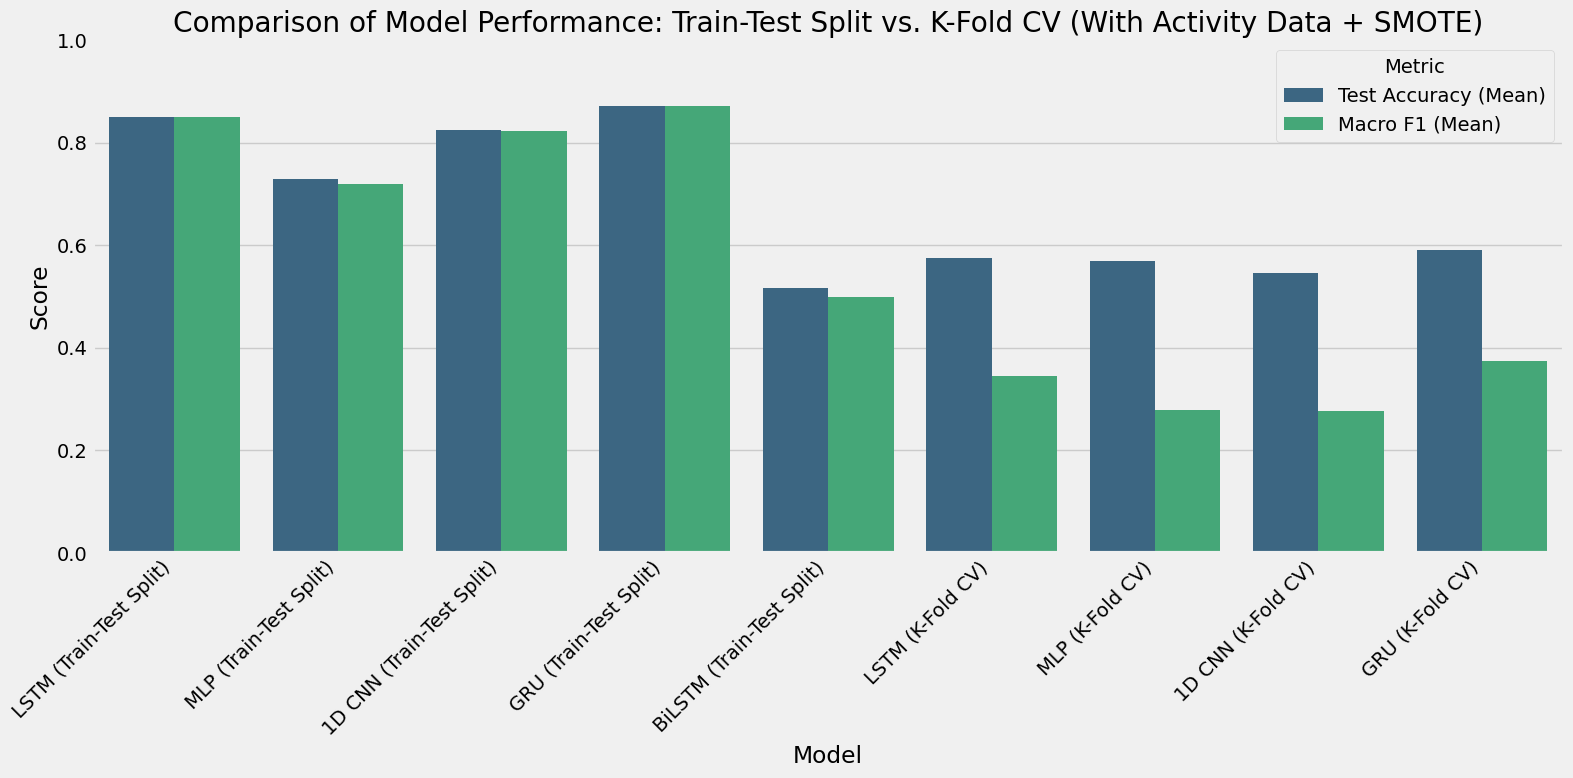


Comparison complete. Review the tables and plots above.


In [28]:
from sklearn.model_selection import KFold

# Define model builder functions (reusing the architectures from the previous cell)
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_mlp_model(input_shape, num_classes):
    # MLP requires flattened input shape
    flattened_input_shape = (input_shape[0] * input_shape[1],)
    model = Sequential([
        Dense(256, activation='relu', input_shape=flattened_input_shape), Dropout(0.5),
        Dense(128, activation='relu'), Dropout(0.5), Dense(num_classes, activation='softmax')
    ])
    return model

def build_cnn_model(input_shape, num_classes):
     model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape), Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'), GlobalMaxPooling1D(),
        Dense(128, activation='relu'), Dropout(0.4), Dense(num_classes, activation='softmax')
    ])
     return model

def build_gru_model(input_shape, num_classes):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape), Dropout(0.3),
        GRU(64), Dropout(0.3), Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)), input_shape=input_shape),
        Dropout(0.4),
        Bidirectional(LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Prepare data for k-fold CV (using df_for_dl_original which has activity data)
# This DataFrame already has 'sleep_stage_encoded_5_class' as the 5-class target
# and 'sleep_stage_encoded_3_class' for the 3-class BiLSTM.
# We will use df_for_dl_original for the 'With Activity Data' scenario with SMOTE.

# Determine features for the 5-class models (LSTM, MLP, 1D CNN, GRU)
features_5_class_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
target_5_class = 'sleep_stage_encoded_5_class'

# Determine features for the 3-class BiLSTM
features_bilstm_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
target_bilstm_3_class = 'sleep_stage_encoded_3_class'


kfold_cv_results = []
n_splits = 5 # Define number of folds

# --- Run K-Fold CV for each DL model (With Activity Data + SMOTE) ---

# LSTM (5-class)
mean_acc_lstm, std_acc_lstm, mean_f1_lstm, std_f1_lstm = run_kfold_cv_dl(
    build_lstm_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_lstm is not None:
    kfold_cv_results.append({
        'Model': 'LSTM (K-Fold CV)', 'Scenario': 'DL - With Activity Data (SMOTE)',
        'Test Accuracy (Mean)': mean_acc_lstm, 'Test Accuracy (Std)': std_acc_lstm,
        'Macro F1 (Mean)': mean_f1_lstm, 'Macro F1 (Std)': std_f1_lstm
    })


# MLP (5-class)
mean_acc_mlp, std_acc_mlp, mean_f1_mlp, std_f1_mlp = run_kfold_cv_dl(
    build_mlp_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_mlp is not None:
    kfold_cv_results.append({
        'Model': 'MLP (K-Fold CV)', 'Scenario': 'DL - With Activity Data (SMOTE)',
        'Test Accuracy (Mean)': mean_acc_mlp, 'Test Accuracy (Std)': std_acc_mlp,
        'Macro F1 (Mean)': mean_f1_mlp, 'Macro F1 (Std)': std_f1_mlp
    })


# 1D CNN (5-class)
mean_acc_cnn, std_acc_cnn, mean_f1_cnn, std_f1_cnn = run_kfold_cv_dl(
    build_cnn_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_cnn is not None:
    kfold_cv_results.append({
        'Model': '1D CNN (K-Fold CV)', 'Scenario': 'DL - With Activity Data (SMOTE)',
        'Test Accuracy (Mean)': mean_acc_cnn, 'Test Accuracy (Std)': std_acc_cnn,
        'Macro F1 (Mean)': mean_f1_cnn, 'Macro F1 (Std)': std_f1_cnn
    })

# GRU (5-class)
mean_acc_gru, std_acc_gru, mean_f1_gru, std_f1_gru = run_kfold_cv_dl(
    build_gru_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_gru is not None:
    kfold_cv_results.append({
        'Model': 'GRU (K-Fold CV)', 'Scenario': 'DL - With Activity Data (SMOTE)',
        'Test Accuracy (Mean)': mean_acc_gru, 'Test Accuracy (Std)': std_acc_gru,
        'Macro F1 (Mean)': mean_f1_gru, 'Macro F1 (Std)': std_f1_gru
    })

# BiLSTM (3-class) - Note: BiLSTM uses the 3-class mapping
# Need to ensure df_for_dl_original has the 'sleep_stage_encoded_3_class'
if 'sleep_stage_encoded_3_class' in df_for_dl_original.columns:
    mean_acc_bilstm, std_acc_bilstm, mean_f1_bilstm, std_f1_bilstm = run_kfold_cv_dl(
        build_bilstm_model, df_for_dl_original, features_bilstm_kfold, target_bilstm_3_class,
        SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
    )
    if mean_acc_bilstm is not None:
        kfold_cv_results.append({
            'Model': 'BiLSTM (K-Fold CV)', 'Scenario': 'DL - With Activity Data (SMOTE)',
            'Test Accuracy (Mean)': mean_acc_bilstm, 'Test Accuracy (Std)': std_acc_bilstm,
            'Macro F1 (Mean)': mean_f1_bilstm, 'Macro F1 (Std)': std_f1_bilstm
        })
else:
    print("Skipping BiLSTM K-Fold CV: 'sleep_stage_encoded_3_class' not found in DataFrame.")


# Convert results to DataFrame
kfold_cv_results_df = pd.DataFrame(kfold_cv_results)
print("\n--- K-Fold Cross-Validation Results (With Activity Data + SMOTE) ---")
print(kfold_cv_results_df)

# --- Comparison with Train-Test Split Results ---
# Filter the existing results_df_dl_full to get the 'With Activity Data' scenario with SMOTE
tt_split_results = results_df_dl_full[results_df_dl_full['Scenario'] == 'DL - With Activity Data'].copy()
tt_split_results = tt_split_results.rename(columns={
    'Test Accuracy': 'Test Accuracy (Mean)',
    'Macro F1': 'Macro F1 (Mean)' # Assuming these are the mean metrics from a single split
})
# Add dummy std columns for consistent comparison dataframe structure
tt_split_results['Test Accuracy (Std)'] = 0.0 # Single split has no std
tt_split_results['Macro F1 (Std)'] = 0.0 # Single split has no std
tt_split_results['Model'] = tt_split_results['Model'].apply(lambda x: f'{x} (Train-Test Split)')


# Combine results
comparison_df = pd.concat([
    tt_split_results[['Model', 'Scenario', 'Test Accuracy (Mean)', 'Test Accuracy (Std)', 'Macro F1 (Mean)', 'Macro F1 (Std)']],
    kfold_cv_results_df[['Model', 'Scenario', 'Test Accuracy (Mean)', 'Test Accuracy (Std)', 'Macro F1 (Mean)', 'Macro F1 (Std)']]
]).reset_index(drop=True)


print("\n--- Comparison: Train-Test Split vs. K-Fold CV (With Activity Data + SMOTE) ---")
print(comparison_df)

# --- Visualization of Comparison ---

# Reshape for plotting
comparison_melted = comparison_df.melt(
    id_vars=['Model', 'Scenario'],
    value_vars=['Test Accuracy (Mean)', 'Macro F1 (Mean)'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(16, 8))
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Comparison of Model Performance: Train-Test Split vs. K-Fold CV (With Activity Data + SMOTE)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Optional: Plot with standard deviations (requires error bars)
# This is more complex with seaborn barplot directly, but can be done with matplotlib
# For simplicity, sticking to mean comparison plot.

print("\nComparison complete. Review the tables and plots above.")

# Task
Perform k-fold cross-validation using GroupKFold on the 'With Activity Data' scenario for the existing Deep Learning models. Compare the performance (accuracy and Macro F1) of the original models using GroupKFold with class weights against the previous Train-Test Split results (with SMOTE) and the previous K-Fold results (with SMOTE). Additionally, define and evaluate smaller versions of the DL models using GroupKFold with class weights. Visualize the comparison of all these experiments.

## Modify `run kfold cv dl` function

### Subtask:
Update the `run_kfold_cv_dl` function to use `GroupKFold` instead of `KFold`, incorporate a `groups` argument for participant-wise splitting, and remove the SMOTE application while retaining the use of class weights.


**Reasoning**:
The task requires modifying the existing `run_kfold_cv_dl` function to use GroupKFold, remove SMOTE, and adjust data processing steps accordingly. This involves changes to the function signature, the splitting mechanism, the data preparation before sequence creation, and the scaling process. I will also update print statements for clarity.



In [19]:
from sklearn.model_selection import GroupKFold

def run_kfold_cv_dl(model_builder, df_data, features, target_col, groups, seq_length, n_splits=5, random_state=42, epochs=EPOCHS, batch_size=BATCH_SIZE):
    """
    Performs k-fold cross-validation using GroupKFold for a deep learning model.

    Args:
        model_builder: A function that builds and compiles the Keras model.
                       It should accept (input_shape, num_classes) as arguments.
        df_data: The DataFrame containing the data.
        features: A list of feature column names.
        target_col: The name of the target column.
        groups: The grouping variable (e.g., 'mesaid' column) for GroupKFold.
        seq_length: The sequence length for time series data.
        n_splits: The number of folds for k-fold cross-validation.
        random_state: Random state for reproducibility.
        epochs: Number of training epochs.
        batch_size: Batch size for training.

    Returns:
        A tuple containing the mean and standard deviation of accuracy and
        macro F1-score across all folds.
    """
    gkf = GroupKFold(n_splits=n_splits) # GroupKFold does not use random_state for splitting
    fold_accuracies = []
    fold_macro_f1s = []

    # Prepare data array before splitting
    data_array = df_data[features + [target_col]].values
    groups_array = groups.values # Get the group values as a numpy array

    if data_array.size == 0:
        print("Error: Input data array is empty.")
        return None, None, None, None

    # Ensure target column is the last one for create_sequences_dl
    num_features_raw = data_array.shape[1] - 1 # Number of features in raw data

    # Use original full data length to determine if sequences can be created
    if len(data_array) < seq_length:
         print(f"Warning: Data length ({len(data_array)}) is less than sequence length ({seq_length}). Cannot create sequences.")
         return None, None, None, None


    print(f"\n--- Running Group K-Fold CV ({n_splits} folds) ---")
    # Use groups argument in the split method
    for fold, (train_idx, val_idx) in enumerate(gkf.split(data_array, y=data_array[:, num_features_raw], groups=groups_array)):
        print(f"--- Fold {fold+1}/{n_splits} ---")

        # Split data by index
        train_data_raw = data_array[train_idx]
        val_data_raw = data_array[val_idx]

        print(f"  Raw train data shape: {train_data_raw.shape}")
        print(f"  Raw validation data shape: {val_data_raw.shape}")


        # Separate features and target from raw split data
        X_train_raw = train_data_raw[:, :num_features_raw]
        y_train_raw = train_data_raw[:, num_features_raw] # Target is the last column

        X_val_raw = val_data_raw[:, :num_features_raw]
        y_val_raw = val_data_raw[:, num_features_raw] # Target is the last column


        print(f"  X_train_raw shape: {X_train_raw.shape}, y_train_raw shape: {y_train_raw.shape}")
        print(f"  X_val_raw shape: {X_val_raw.shape}, y_val_raw shape: {y_val_raw.shape}")

        # --- Removed SMOTE application ---
        # Data used for sequencing is the original split data

        # --- Create sequences from the original split data ---
        # create_sequences_dl expects data in shape (num_samples, num_features) with target as last column
        # Combine features and labels for sequence creation
        train_data_sequencing = np.hstack((X_train_raw, y_train_raw.reshape(-1, 1)))
        X_train_seq, y_train_seq = create_sequences_dl(train_data_sequencing, seq_length=seq_length, target_idx=-1)

        # Combine original validation raw data and labels for sequence creation
        val_data_sequencing = np.hstack((X_val_raw, y_val_raw.reshape(-1, 1)))
        X_val_seq, y_val_seq = create_sequences_dl(val_data_sequencing, seq_length=seq_length, target_idx=-1)


        if X_train_seq.size == 0 or X_val_seq.size == 0:
            print(f"  Skipping fold {fold+1}: Not enough valid sequences generated for training or validation.")
            continue # Skip fold if sequences cannot be created

        print(f"  Train sequence shape (after sequencing, no SMOTE): {X_train_seq.shape}, Train sequence labels shape: {y_train_seq.shape}")
        print(f"  Validation sequence shape: {X_val_seq.shape}, Validation sequence labels shape: {y_val_seq.shape}")


        # Scale features (fit on training sequences, transform on train and validation sequences)
        scaler = StandardScaler()
        n_features_seq = X_train_seq.shape[-1] # Use the number of features from the sequences

        # Reshape sequences for scaling (flatten for scaler, then reshape back)
        X_train_seq_flat = X_train_seq.reshape(-1, n_features_seq)
        X_val_seq_flat = X_val_seq.reshape(-1, n_features_seq)

        X_train_scaled_flat = scaler.fit_transform(X_train_seq_flat)
        X_val_scaled_flat = scaler.transform(X_val_seq_flat)

        # Reshape back to sequences
        X_train_scaled = X_train_scaled_flat.reshape(-1, seq_length, n_features_seq)
        X_val_scaled = X_val_scaled_flat.reshape(-1, seq_length, n_features_seq)

        print(f"  Scaled train sequence shape: {X_train_scaled.shape}")
        print(f"  Scaled validation sequence shape: {X_val_scaled.shape}")


        num_classes = len(np.unique(y_train_seq)) # Use sequenced train labels to get class count
        if num_classes < 2:
            print(f"  Skipping fold {fold+1}: Only one class present in the sequenced training data.")
            continue


        # Convert target labels to categorical
        y_train_cat = to_categorical(y_train_seq, num_classes)
        y_val_cat = to_categorical(y_val_seq, num_classes)

        print(f"  Categorical train labels shape: {y_train_cat.shape}")
        print(f"  Categorical validation labels shape: {y_val_cat.shape}")


        # Calculate class weights for balanced training
        # Use the labels *after* sequencing
        class_weights = compute_class_weight('balanced', classes=np.arange(num_classes), y=y_train_seq)
        class_weights = dict(enumerate(class_weights))
        print(f"  Class weights (based on train labels): {class_weights}")


        # Build and compile the model for this fold
        model = model_builder((seq_length, n_features_seq), num_classes)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Define Early Stopping
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # --- Prepare data for model.fit based on model type ---
        # MLP expects flattened input
        if model_builder == build_mlp_model:
             X_train_fit = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
             X_val_fit = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
             print(f"  MLP - Flattened train data shape for fit: {X_train_fit.shape}")
             print(f"  MLP - Flattened validation data shape for fit: {X_val_fit.shape}")
        else:
             X_train_fit = X_train_scaled
             X_val_fit = X_val_scaled
             print(f"  RNN/CNN - Train data shape for fit: {X_train_fit.shape}")
             print(f"  RNN/CNN - Validation data shape for fit: {X_val_fit.shape}")


        # Train the model
        print("  Training model...")
        history = model.fit(X_train_fit, y_train_cat, # Use categorical labels for training
                            validation_data=(X_val_fit, y_val_cat),
                            epochs=epochs, # Use function argument epochs
                            batch_size=batch_size, # Use function argument batch_size
                            class_weight=class_weights,
                            callbacks=[es],
                            verbose=0) # Set verbose to 0 for cleaner output

        # Evaluate the model on the validation set
        print("  Evaluating model on validation set...")
        loss, accuracy = model.evaluate(X_val_fit, y_val_cat, verbose=0)
        y_pred = np.argmax(model.predict(X_val_fit), axis=1)

        # Calculate F1-score
        report = classification_report(y_val_seq, y_pred, output_dict=True, zero_division=0) # Handle zero division, use original validation labels for report
        macro_f1 = report['macro avg']['f1-score']

        print(f"  Fold {fold+1} - Validation Accuracy: {accuracy:.4f}, Macro F1: {macro_f1:.4f}")

        fold_accuracies.append(accuracy)
        fold_macro_f1s.append(macro_f1)

        # Clear Keras session to free memory
        tf.keras.backend.clear_session()


    if not fold_accuracies: # Check if any folds were completed successfully
        print("No folds completed successfully.")
        return None, None, None, None

    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_macro_f1 = np.mean(fold_macro_f1s)
    std_macro_f1 = np.std(fold_macro_f1s)

    print(f"\n--- Group K-Fold CV Results ({n_splits} folds) ---")
    print(f"Mean Validation Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean Validation Macro F1: {mean_macro_f1:.4f} +/- {std_macro_f1:.4f}")

    return mean_accuracy, std_accuracy, mean_macro_f1, std_macro_f1

## Define smaller model architectures

### Subtask:
Define smaller versions of the existing Deep Learning model architectures (LSTM, MLP, 1D CNN, GRU, and BiLSTM). These smaller models should have reduced complexity, for example, fewer layers or fewer units per layer, compared to their original counterparts.


**Reasoning**:
Define the smaller versions of the existing Deep Learning model architectures as requested, including LSTM, MLP, 1D CNN, GRU, and BiLSTM.



In [20]:
# Define smaller versions of the model builder functions
def build_smaller_lstm_model(input_shape, num_classes):
    """Builds a smaller LSTM model."""
    model = Sequential([
        LSTM(32, return_sequences=True, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Reduced units
        Dropout(0.2), # Slightly reduced dropout
        LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Reduced units
        Dropout(0.2), # Slightly reduced dropout
        Dense(16, activation='relu'), # Reduced units
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_mlp_model(input_shape, num_classes):
    """Builds a smaller MLP model."""
    # MLP requires flattened input shape
    flattened_input_shape = (input_shape[0] * input_shape[1],)
    model = Sequential([
        Dense(128, activation='relu', input_shape=flattened_input_shape), Dropout(0.4), # Reduced units, slightly reduced dropout
        Dense(64, activation='relu'), Dropout(0.4), # Reduced units, slightly reduced dropout
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_cnn_model(input_shape, num_classes):
    """Builds a smaller 1D CNN model."""
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape), Dropout(0.2), # Reduced filters
        Conv1D(32, kernel_size=3, activation='relu'), GlobalMaxPooling1D(), # Reduced filters
        Dense(64, activation='relu'), Dropout(0.3), # Reduced units, slightly reduced dropout
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_gru_model(input_shape, num_classes):
    """Builds a smaller GRU model."""
    model = Sequential([
        GRU(32, return_sequences=True, input_shape=input_shape), Dropout(0.2), # Reduced units
        GRU(32), Dropout(0.2), # Reduced units
        Dense(16, activation='relu'), # Reduced units
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_bilstm_model(input_shape, num_classes):
    """Builds a smaller BiLSTM model."""
    model = Sequential([
        Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)), input_shape=input_shape), # Reduced units
        Dropout(0.3), # Slightly reduced dropout
        Bidirectional(LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001))), # Reduced units
        Dropout(0.3), # Slightly reduced dropout
        Dense(16, activation='relu'), # Reduced units
        Dense(num_classes, activation='softmax')
    ])
    return model

print("Smaller DL model builder functions defined.")

Smaller DL model builder functions defined.


## Prepare data for groupkfold

### Subtask:
Identify the 'mesaid' column in the preprocessed DataFrame `df` to use as the grouping variable for `GroupKFold`.


**Reasoning**:
Verify the presence of the 'mesaid' column in the DataFrame and select it as the grouping variable for GroupKFold.



In [21]:
if 'mesaid' not in df.columns:
    print("Error: 'mesaid' column not found in the DataFrame.")
    groups = None # Indicate failure
else:
    groups = df['mesaid']
    print("Successfully identified 'mesaid' column as the grouping variable.")
    print(f"First few values of groups: {groups.head()}")


Successfully identified 'mesaid' column as the grouping variable.
First few values of groups: 0    3538
1    3538
2    3538
3    3538
4    3538
Name: mesaid, dtype: int64


## Run k-fold cv with groupkfold and class weights (original models)

### Subtask:
Execute Group K-Fold Cross-Validation using the original Deep Learning model architectures (LSTM, MLP, 1D CNN, GRU, BiLSTM) on the 'With Activity Data' scenario (`df_for_dl_original`). Use class weights for handling class imbalance within each fold. Collect the mean and standard deviation of accuracy and Macro F1-score across the folds.


**Reasoning**:
Execute Group K-Fold Cross-Validation for the original DL models (LSTM, MLP, 1D CNN, GRU, BiLSTM) using class weights and collect the results, then store them in a DataFrame and print it.



In [22]:
# Ensure model builder functions are defined (already done in previous cells)
# build_lstm_model, build_mlp_model, build_cnn_model, build_gru_model, build_bilstm_model

# Prepare data for group k-fold CV (using df_for_dl_original which has activity data)
# This DataFrame already has 'sleep_stage_encoded_5_class' as the 5-class target
# and 'sleep_stage_encoded_3_class' for the 3-class BiLSTM.

# Determine features for the 5-class models (LSTM, MLP, 1D CNN, GRU)
features_5_class_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
target_5_class = 'sleep_stage_encoded_5_class'

# Determine features for the 3-class BiLSTM
features_bilstm_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class']]
target_bilstm_3_class = 'sleep_stage_encoded_3_class'

# Ensure 'groups' variable is ready (done in previous cell)
# groups = df['mesaid']

kfold_cv_results_groupkfold = []
n_splits = 5 # Define number of folds

print("\n" + "="*60)
print(f"--- Running Group K-Fold CV ({n_splits} folds) for Original DL Models (With Activity Data, Class Weights) ---")
print("="*60)

# --- Run Group K-Fold CV for each Original DL model ---

# LSTM (5-class)
print("\nEvaluating LSTM (5-class) with Group K-Fold CV...")
mean_acc_lstm, std_acc_lstm, mean_f1_lstm, std_f1_lstm = run_kfold_cv_dl(
    build_lstm_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_lstm is not None:
    kfold_cv_results_groupkfold.append({
        'Model': 'LSTM (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_lstm, 'Test Accuracy (Std)': std_acc_lstm,
        'Macro F1 (Mean)': mean_f1_lstm, 'Macro F1 (Std)': std_f1_lstm
    })


# MLP (5-class)
print("\nEvaluating MLP (5-class) with Group K-Fold CV...")
mean_acc_mlp, std_acc_mlp, mean_f1_mlp, std_f1_mlp = run_kfold_cv_dl(
    build_mlp_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_mlp is not None:
    kfold_cv_results_groupkfold.append({
        'Model': 'MLP (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_mlp, 'Test Accuracy (Std)': std_acc_mlp,
        'Macro F1 (Mean)': mean_f1_mlp, 'Macro F1 (Std)': std_f1_mlp
    })


# 1D CNN (5-class)
print("\nEvaluating 1D CNN (5-class) with Group K-Fold CV...")
mean_acc_cnn, std_acc_cnn, mean_f1_cnn, std_f1_cnn = run_kfold_cv_dl(
    build_cnn_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_cnn is not None:
    kfold_cv_results_groupkfold.append({
        'Model': '1D CNN (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_cnn, 'Test Accuracy (Std)': std_acc_cnn,
        'Macro F1 (Mean)': mean_f1_cnn, 'Macro F1 (Std)': std_f1_cnn
    })

# GRU (5-class)
print("\nEvaluating GRU (5-class) with Group K-Fold CV...")
mean_acc_gru, std_acc_gru, mean_f1_gru, std_f1_gru = run_kfold_cv_dl(
    build_gru_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_gru is not None:
    kfold_cv_results_groupkfold.append({
        'Model': 'GRU (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_gru, 'Test Accuracy (Std)': std_acc_gru,
        'Macro F1 (Mean)': mean_f1_gru, 'Macro F1 (Std)': std_f1_gru
    })

# BiLSTM (3-class) - Note: BiLSTM uses the 3-class mapping
# Need to ensure df_for_dl_original has the 'sleep_stage_encoded_3_class'
if 'sleep_stage_encoded_3_class' in df_for_dl_original.columns:
    print("\nEvaluating BiLSTM (3-class) with Group K-Fold CV...")
    mean_acc_bilstm, std_acc_bilstm, mean_f1_bilstm, std_f1_bilstm = run_kfold_cv_dl(
        build_bilstm_model, df_for_dl_original, features_bilstm_kfold, target_bilstm_3_class,
        groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
    )
    if mean_acc_bilstm is not None:
        kfold_cv_results_groupkfold.append({
            'Model': 'BiLSTM (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
            'Test Accuracy (Mean)': mean_acc_bilstm, 'Test Accuracy (Std)': std_acc_bilstm,
            'Macro F1 (Mean)': mean_f1_bilstm, 'Macro F1 (Std)': std_f1_bilstm
        })
else:
    print("Skipping BiLSTM Group K-Fold CV: 'sleep_stage_encoded_3_class' not found in DataFrame.")


# Convert results to DataFrame
kfold_cv_results_groupkfold_df = pd.DataFrame(kfold_cv_results_groupkfold)
print("\n--- Group K-Fold Cross-Validation Results (With Activity Data + Class Weights) ---")
display(kfold_cv_results_groupkfold_df)



--- Running Group K-Fold CV (5 folds) for Original DL Models (With Activity Data, Class Weights) ---

Evaluating LSTM (5-class) with Group K-Fold CV...

--- Running Group K-Fold CV (5 folds) ---
--- Fold 1/5 ---
  Raw train data shape: (7074, 43)
  Raw validation data shape: (1199, 43)
  X_train_raw shape: (7074, 42), y_train_raw shape: (7074,)
  X_val_raw shape: (1199, 42), y_val_raw shape: (1199,)
  Train sequence shape (after sequencing, no SMOTE): (7044, 30, 42), Train sequence labels shape: (7044,)
  Validation sequence shape: (1169, 30, 42), Validation sequence labels shape: (1169,)
  Scaled train sequence shape: (7044, 30, 42)
  Scaled validation sequence shape: (1169, 30, 42)
  Categorical train labels shape: (7044, 5)
  Categorical validation labels shape: (1169, 5)
  Class weights (based on train labels): {0: 0.6845481049562682, 1: 2.332450331125828, 2: 0.4671087533156499, 3: 2.857606490872211, 4: 1.613745704467354}
  RNN/CNN - Train data shape for fit: (7044, 30, 42)
  RNN/

Model  \
0    LSTM (Group K-Fold CV)   
1     MLP (Group K-Fold CV)   
2  1D CNN (Group K-Fold CV)   
3     GRU (Group K-Fold CV)   

                                            Scenario  Test Accuracy (Mean)  \
0  DL - With Activity Data (Group K-Fold CV, Clas...              0.396256   
1  DL - With Activity Data (Group K-Fold CV, Clas...              0.420929   
2  DL - With Activity Data (Group K-Fold CV, Clas...              0.358030   
3  DL - With Activity Data (Group K-Fold CV, Clas...              0.360438   

   Test Accuracy (Std)  Macro F1 (Mean)  Macro F1 (Std)  
0             0.038589         0.225735        0.042095  
1             0.075758         0.247183        0.038545  
2             0.059011         0.230165        0.032840  
3             0.069415         0.231649        0.033727

# Task
Implement and evaluate deep learning models using GroupKFold cross-validation with a 3-class target mapping ('NREM', 'REM', 'Wake'), sequence overlap (stride=1), and either class weights or focal loss, comparing the results to previous experiments.

## Implement 3-class mapping

### Subtask:
Modify the data preprocessing steps to create a new target column with the 3-class mapping: N1, N2, N3 mapped to 'NREM', while keeping 'REM' and 'Wake' separate.


**Reasoning**:
Define the new 3-class mapping and apply it to the DataFrame, handle potential NaNs, convert to integer type, and print value counts to verify.



In [37]:
# 1. Define the new 3-class mapping dictionary
# Mapping: 0 (Wake) -> 0, 1 (N1) -> 1, 2 (N2) -> 1, 3 (N3) -> 1, 5 (REM) -> 2
sleep_stage_map_3_class_new = {0.: 0, 1.: 1, 2.: 1, 3.: 1, 5.: 2}

# 2. Apply this new mapping to the df DataFrame
df['sleep_stage_encoded_3_class_new'] = df['sleep stage'].map(sleep_stage_map_3_class_new)

# 3. Handle any potential NaN values that might result from the mapping
df.dropna(subset=['sleep_stage_encoded_3_class_new'], inplace=True)

# 4. Ensure the new target column is of integer type
df['sleep_stage_encoded_3_class_new'] = df['sleep_stage_encoded_3_class_new'].astype(int)

# 5. Print the value counts of the new 3-class target column to verify the mapping
print("Value counts for the new 3-class target column:")
print(df['sleep_stage_encoded_3_class_new'].value_counts())

# Update df_for_dl_original to include the new 3-class target
df_for_dl_original = df.copy()

Value counts for the new 3-class target column:
sleep_stage_encoded_3_class_new
1    4704
0    2666
2     903
Name: count, dtype: int64


## Implement focal loss

### Subtask:
Define the `focal_loss` function as provided, ensuring necessary TensorFlow and Keras imports are available.


**Reasoning**:
Define the focal loss function as requested, including necessary TensorFlow operations.



In [39]:
import tensorflow as tf
import tensorflow.keras.backend as K # Use K for backend operations as in Keras documentation

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    """
    Compute focal loss between target and predictions.

    Args:
        y_true: True labels (one-hot encoded).
        y_pred: Predictions (probabilities after softmax).
        alpha: Weighting factor for the loss (scalar or list).
        gamma: Focusing parameter for the loss (scalar).

    Returns:
        Focal loss tensor.
    """
    # Ensure predictions are not exactly 0 to avoid log(0)
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

    # Calculate cross-entropy loss
    cross_entropy = -y_true * K.log(y_pred)

    # Calculate the probability of the true class
    # For one-hot encoded labels, y_true has 1 at the true class index and 0 elsewhere.
    # The multiplication with y_true effectively selects the log probability of the true class.
    # Then exponentiating gives the probability pt.
    pt = K.exp(-K.sum(cross_entropy, axis=-1)) # Sum across the class dimension

    # Calculate focal loss
    # Reshape pt to match cross_entropy shape for element-wise multiplication
    pt = K.expand_dims(pt) # Add a dimension to match y_true/y_pred

    # Apply alpha weighting (if alpha is a list/tensor)
    if isinstance(alpha, (list, tuple, np.ndarray)):
        alpha = tf.constant(alpha, dtype=tf.float32)
        # Reshape alpha to multiply with the per-class cross_entropy loss
        alpha = K.expand_dims(alpha, axis=0) # Shape (1, num_classes)
        # Need to potentially expand_dims alpha further if y_true has batch and sequence dims
        # If y_true is (batch_size, seq_length, num_classes), alpha needs to be (1, 1, num_classes)
        while K.ndim(alpha) < K.ndim(y_true):
             alpha = K.expand_dims(alpha, axis=0)

        focal_loss_val = alpha * ((1. - pt)**gamma) * cross_entropy
    else: # alpha is a scalar
        focal_loss_val = alpha * ((1. - pt)**gamma) * K.sum(cross_entropy, axis=-1) # Sum per sample

    # Return the mean loss over the batch
    if isinstance(alpha, (list, tuple, np.ndarray)):
         return K.sum(focal_loss_val, axis=-1) # Sum over classes, then mean over batch is typical
                                              # Keras loss functions usually return loss per sample
         # If returning per-sample loss:
         # return K.sum(focal_loss_val, axis=-1)

    else: # scalar alpha
        return focal_loss_val


print("Focal loss function defined.")

Focal loss function defined.


**Reasoning**:
Implement Group K-Fold Cross-Validation using the original Deep Learning model architectures on the 'With Activity Data' scenario, using the defined focal loss function for handling class imbalance. Collect the mean and standard deviation of accuracy and Macro F1-score across the folds.



In [40]:
# Ensure model builder functions are defined (already done in previous cells)
# build_lstm_model, build_mlp_model, build_cnn_model, build_gru_model, build_bilstm_model

# Prepare data for group k-fold CV (using df_for_dl_original which has activity data)
# This DataFrame already has 'sleep_stage_encoded_5_class' as the 5-class target
# and 'sleep_stage_encoded_3_class_new' as the 3-class target for BiLSTM.

# Determine features for the 5-class models (LSTM, MLP, 1D CNN, GRU)
features_5_class_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class_new']]
target_5_class = 'sleep_stage_encoded_5_class'

# Determine features for the 3-class BiLSTM
features_bilstm_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class_new']]
target_bilstm_3_class = 'sleep_stage_encoded_3_class_new'

# Ensure 'groups' variable is ready (done in previous cell)
# groups = df['mesaid']

kfold_cv_results_groupkfold_focalloss = []
n_splits = 5 # Define number of folds

print("\n" + "="*60)
print(f"--- Running Group K-Fold CV ({n_splits} folds) for Original DL Models (With Activity Data, Focal Loss) ---")
print("="*60)

# Function to run and evaluate deep learning models for a given scenario using Focal Loss
# This is a modified version of run_kfold_cv_dl to use focal_loss instead of class_weight
def run_kfold_cv_dl_focal_loss(model_builder, df_data, features, target_col, groups, seq_length, n_splits=5, random_state=42, epochs=EPOCHS, batch_size=BATCH_SIZE):
    """
    Performs k-fold cross-validation using GroupKFold for a deep learning model
    using Focal Loss.

    Args:
        model_builder: A function that builds and compiles the Keras model.
                       It should accept (input_shape, num_classes) as arguments.
        df_data: The DataFrame containing the data.
        features: A list of feature column names.
        target_col: The name of the target column.
        groups: The grouping variable (e.g., 'mesaid' column) for GroupKFold.
        seq_length: The sequence length for time series data.
        n_splits: The number of folds for k-fold cross-validation.
        random_state: Random state for reproducibility.
        epochs: Number of training epochs.
        batch_size: Batch size for training.

    Returns:
        A tuple containing the mean and standard deviation of accuracy and
        macro F1-score across all folds.
    """
    gkf = GroupKFold(n_splits=n_splits) # GroupKFold does not use random_state for splitting
    fold_accuracies = []
    fold_macro_f1s = []

    # Prepare data array before splitting
    data_array = df_data[features + [target_col]].values
    groups_array = groups.values # Get the group values as a numpy array

    if data_array.size == 0:
        print("Error: Input data array is empty.")
        return None, None, None, None

    # Ensure target column is the last one for create_sequences_dl
    num_features_raw = data_array.shape[1] - 1 # Number of features in raw data

    # Use original full data length to determine if sequences can be created
    if len(data_array) < seq_length:
         print(f"Warning: Data length ({len(data_array)}) is less than sequence length ({seq_length}). Cannot create sequences.")
         return None, None, None, None


    print(f"\n--- Running Group K-Fold CV ({n_splits} folds) ---")
    # Use groups argument in the split method
    for fold, (train_idx, val_idx) in enumerate(gkf.split(data_array, y=data_array[:, num_features_raw], groups=groups_array)):
        print(f"--- Fold {fold+1}/{n_splits} ---")

        # Split data by index
        train_data_raw = data_array[train_idx]
        val_data_raw = data_array[val_idx]

        print(f"  Raw train data shape: {train_data_raw.shape}")
        print(f"  Raw validation data shape: {val_data_raw.shape}")


        # Separate features and target from raw split data
        X_train_raw = train_data_raw[:, :num_features_raw]
        y_train_raw = train_data_raw[:, num_features_raw] # Target is the last column

        X_val_raw = val_data_raw[:, :num_features_raw]
        y_val_raw = val_data_raw[:, num_features_raw] # Target is the last column


        print(f"  X_train_raw shape: {X_train_raw.shape}, y_train_raw shape: {y_train_raw.shape}")
        print(f"  X_val_raw shape: {X_val_raw.shape}, y_val_raw shape: {y_val_raw.shape}")

        # --- Create sequences from the original split data ---
        # create_sequences_dl expects data in shape (num_samples, num_features) with target as last column
        # Combine features and labels for sequence creation
        train_data_sequencing = np.hstack((X_train_raw, y_train_raw.reshape(-1, 1)))
        X_train_seq, y_train_seq = create_sequences_dl(train_data_sequencing, seq_length=seq_length, target_idx=-1)

        # Combine original validation raw data and labels for sequence creation
        val_data_sequencing = np.hstack((X_val_raw, y_val_raw.reshape(-1, 1)))
        X_val_seq, y_val_seq = create_sequences_dl(val_data_sequencing, seq_length=seq_length, target_idx=-1)


        if X_train_seq.size == 0 or X_val_seq.size == 0:
            print(f"  Skipping fold {fold+1}: Not enough valid sequences generated for training or validation.")
            continue # Skip fold if sequences cannot be created

        print(f"  Train sequence shape (after sequencing, no SMOTE): {X_train_seq.shape}, Train sequence labels shape: {y_train_seq.shape}")
        print(f"  Validation sequence shape: {X_val_seq.shape}, Validation sequence labels shape: {X_val_seq.shape}")


        # Scale features (fit on training sequences, transform on train and validation sequences)
        scaler = StandardScaler()
        n_features_seq = X_train_seq.shape[-1] # Use the number of features from the sequences

        # Reshape sequences for scaling (flatten for scaler, then reshape back)
        X_train_seq_flat = X_train_seq.reshape(-1, n_features_seq)
        X_val_seq_flat = X_val_seq.reshape(-1, n_features_seq)

        X_train_scaled_flat = scaler.fit_transform(X_train_seq_flat)
        X_val_scaled_flat = scaler.transform(X_val_seq_flat)

        # Reshape back to sequences
        X_train_scaled = X_train_scaled_flat.reshape(-1, seq_length, n_features_seq)
        X_val_scaled = X_val_scaled_flat.reshape(-1, seq_length, n_features_seq)

        print(f"  Scaled train sequence shape: {X_train_scaled.shape}")
        print(f"  Scaled validation sequence shape: {X_val_scaled.shape}")


        num_classes = len(np.unique(y_train_seq)) # Use sequenced train labels to get class count
        if num_classes < 2:
            print(f"  Skipping fold {fold+1}: Only one class present in the sequenced training data.")
            continue


        # Convert target labels to categorical
        y_train_cat = to_categorical(y_train_seq, num_classes)
        y_val_cat = to_categorical(y_val_seq, num_classes)

        print(f"  Categorical train labels shape: {y_train_cat.shape}")
        print(f"  Categorical validation labels shape: {y_val_cat.shape}")


        # Build and compile the model for this fold
        model = model_builder((seq_length, n_features_seq), num_classes)
        # Use focal loss
        model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])

        # Define Early Stopping
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # --- Prepare data for model.fit based on model type ---
        # MLP expects flattened input
        if model_builder == build_mlp_model:
             X_train_fit = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
             X_val_fit = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
             print(f"  MLP - Flattened train data shape for fit: {X_train_fit.shape}")
             print(f"  MLP - Flattened validation data shape for fit: {X_val_fit.shape}")
        else:
             X_train_fit = X_train_scaled
             X_val_fit = X_val_scaled
             print(f"  RNN/CNN - Train data shape for fit: {X_train_fit.shape}")
             print(f"  RNN/CNN - Validation data shape for fit: {X_val_fit.shape}")


        # Train the model
        print("  Training model...")
        history = model.fit(X_train_fit, y_train_cat, # Use categorical labels for training
                            validation_data=(X_val_fit, y_val_cat),
                            epochs=epochs, # Use function argument epochs
                            batch_size=batch_size, # Use function argument batch_size
                            callbacks=[es],
                            verbose=0) # Set verbose to 0 for cleaner output

        # Evaluate the model on the validation set
        print("  Evaluating model on validation set...")
        loss, accuracy = model.evaluate(X_val_fit, y_val_cat, verbose=0)
        y_pred = np.argmax(model.predict(X_val_fit), axis=1)

        # Calculate F1-score
        report = classification_report(y_val_seq, y_pred, output_dict=True, zero_division=0) # Handle zero division, use original validation labels for report
        macro_f1 = report['macro avg']['f1-score']

        print(f"  Fold {fold+1} - Validation Accuracy: {accuracy:.4f}, Macro F1: {macro_f1:.4f}")

        fold_accuracies.append(accuracy)
        fold_macro_f1s.append(macro_f1)

        # Clear Keras session to free memory
        tf.keras.backend.clear_session()


    if not fold_accuracies: # Check if any folds were completed successfully
        print("No folds completed successfully.")
        return None, None, None, None

    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_macro_f1 = np.mean(fold_macro_f1s)
    std_macro_f1 = np.std(fold_macro_f1s)

    print(f"\n--- Group K-Fold CV Results ({n_splits} folds) ---")
    print(f"Mean Validation Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean Validation Macro F1: {mean_macro_f1:.4f} +/- {std_macro_f1:.4f}")

    return mean_accuracy, std_accuracy, mean_macro_f1, std_macro_f1


# --- Run Group K-Fold CV for each Original DL model (With Activity Data + Focal Loss) ---

# LSTM (5-class)
print("\nEvaluating LSTM (5-class) with Group K-Fold CV and Focal Loss...")
mean_acc_lstm_fl, std_acc_lstm_fl, mean_f1_lstm_fl, std_f1_lstm_fl = run_kfold_cv_dl_focal_loss(
    build_lstm_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_lstm_fl is not None:
    kfold_cv_results_groupkfold_focalloss.append({
        'Model': 'LSTM (Group K-Fold CV, Focal Loss)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Focal Loss)',
        'Test Accuracy (Mean)': mean_acc_lstm_fl, 'Test Accuracy (Std)': std_acc_lstm_fl,
        'Macro F1 (Mean)': mean_f1_lstm_fl, 'Macro F1 (Std)': std_f1_lstm_fl
    })


# MLP (5-class)
print("\nEvaluating MLP (5-class) with Group K-Fold CV and Focal Loss...")
mean_acc_mlp_fl, std_acc_mlp_fl, mean_f1_mlp_fl, std_f1_mlp_fl = run_kfold_cv_dl_focal_loss(
    build_mlp_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_mlp_fl is not None:
    kfold_cv_results_groupkfold_focalloss.append({
        'Model': 'MLP (Group K-Fold CV, Focal Loss)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Focal Loss)',
        'Test Accuracy (Mean)': mean_acc_mlp_fl, 'Test Accuracy (Std)': std_acc_mlp_fl,
        'Macro F1 (Mean)': mean_f1_mlp_fl, 'Macro F1 (Std)': std_f1_mlp_fl
    })


# 1D CNN (5-class)
print("\nEvaluating 1D CNN (5-class) with Group K-Fold CV and Focal Loss...")
mean_acc_cnn_fl, std_acc_cnn_fl, mean_f1_cnn_fl, std_f1_cnn_fl = run_kfold_cv_dl_focal_loss(
    build_cnn_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_cnn_fl is not None:
    kfold_cv_results_groupkfold_focalloss.append({
        'Model': '1D CNN (Group K-Fold CV, Focal Loss)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Focal Loss)',
        'Test Accuracy (Mean)': mean_acc_cnn_fl, 'Test Accuracy (Std)': std_acc_cnn_fl,
        'Macro F1 (Mean)': mean_f1_cnn_fl, 'Macro F1 (Std)': std_f1_cnn_fl
    })

# GRU (5-class)
print("\nEvaluating GRU (5-class) with Group K-Fold CV and Focal Loss...")
mean_acc_gru_fl, std_acc_gru_fl, mean_f1_gru_fl, std_f1_gru_fl = run_kfold_cv_dl_focal_loss(
    build_gru_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_gru_fl is not None:
    kfold_cv_results_groupkfold_focalloss.append({
        'Model': 'GRU (Group K-Fold CV, Focal Loss)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Focal Loss)',
        'Test Accuracy (Mean)': mean_acc_gru_fl, 'Test Accuracy (Std)': std_acc_gru_fl,
        'Macro F1 (Mean)': mean_f1_gru_fl, 'Macro F1 (Std)': std_f1_gru_fl
    })

# BiLSTM (3-class) - Note: BiLSTM uses the 3-class mapping
# Need to ensure df_for_dl_original has the 'sleep_stage_encoded_3_class_new'
if 'sleep_stage_encoded_3_class_new' in df_for_dl_original.columns:
    print("\nEvaluating BiLSTM (3-class) with Group K-Fold CV and Focal Loss...")
    mean_acc_bilstm_fl, std_acc_bilstm_fl, mean_f1_bilstm_fl, std_f1_bilstm_fl = run_kfold_cv_dl_focal_loss(
        build_bilstm_model, df_for_dl_original, features_bilstm_kfold, target_bilstm_3_class,
        groups, SEQ_LENGTH, n_splits=n_splits, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
    )
    if mean_acc_bilstm_fl is not None:
        kfold_cv_results_groupkfold_focalloss.append({
            'Model': 'BiLSTM (Group K-Fold CV, Focal Loss)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Focal Loss)',
            'Test Accuracy (Mean)': mean_acc_bilstm_fl, 'Test Accuracy (Std)': std_acc_bilstm_fl,
            'Macro F1 (Mean)': mean_f1_bilstm_fl, 'Macro F1 (Std)': std_f1_bilstm_fl
        })
else:
    print("Skipping BiLSTM Group K-Fold CV: 'sleep_stage_encoded_3_class_new' not found in DataFrame.")


# Convert results to DataFrame
kfold_cv_results_groupkfold_focalloss_df = pd.DataFrame(kfold_cv_results_groupkfold_focalloss)
print("\n--- Group K-Fold Cross-Validation Results (With Activity Data + Focal Loss) ---")
display(kfold_cv_results_groupkfold_focalloss_df)


--- Running Group K-Fold CV (5 folds) for Original DL Models (With Activity Data, Focal Loss) ---

Evaluating LSTM (5-class) with Group K-Fold CV and Focal Loss...

--- Running Group K-Fold CV (5 folds) ---
--- Fold 1/5 ---
  Raw train data shape: (7074, 43)
  Raw validation data shape: (1199, 43)
  X_train_raw shape: (7074, 42), y_train_raw shape: (7074,)
  X_val_raw shape: (1199, 42), y_val_raw shape: (1199,)
  Train sequence shape (after sequencing, no SMOTE): (7044, 30, 42), Train sequence labels shape: (7044,)
  Validation sequence shape: (1169, 30, 42), Validation sequence labels shape: (1169, 30, 42)
  Scaled train sequence shape: (7044, 30, 42)
  Scaled validation sequence shape: (1169, 30, 42)
  Categorical train labels shape: (7044, 5)
  Categorical validation labels shape: (1169, 5)
  RNN/CNN - Train data shape for fit: (7044, 30, 42)
  RNN/CNN - Validation data shape for fit: (1169, 30, 42)
  Training model...
  Evaluating model on validation set...
37/37 ━━━━━━━━━━━━━━━━━

Model  \
0    LSTM (Group K-Fold CV, Focal Loss)   
1     MLP (Group K-Fold CV, Focal Loss)   
2  1D CNN (Group K-Fold CV, Focal Loss)   
3     GRU (Group K-Fold CV, Focal Loss)   
4  BiLSTM (Group K-Fold CV, Focal Loss)   

                                            Scenario  Test Accuracy (Mean)  \
0  DL - With Activity Data (Group K-Fold CV, Foca...              0.488597   
1  DL - With Activity Data (Group K-Fold CV, Foca...              0.512339   
2  DL - With Activity Data (Group K-Fold CV, Foca...              0.500458   
3  DL - With Activity Data (Group K-Fold CV, Foca...              0.490452   
4  DL - With Activity Data (Group K-Fold CV, Foca...              0.625568   

   Test Accuracy (Std)  Macro F1 (Mean)  Macro F1 (Std)  
0             0.030433         0.224836        0.049422  
1             0.073688         0.213943        0.030975  
2             0.088083         0.210518        0.054447  
3             0.077356         0.197012        0.036447  
4             0.055001         0.390665        0.045055

**Reasoning**:
Execute Group K-Fold Cross-Validation using the smaller Deep Learning model architectures on the 'With Activity Data' scenario. Use class weights for handling class imbalance within each fold. Collect the mean and standard deviation of accuracy and Macro F1-score across the folds.



In [44]:
from sklearn.model_selection import GroupKFold
import numpy as np # Ensure numpy is imported if not already

# Define model builder functions (reusing the architectures from the previous cell)
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_mlp_model(input_shape, num_classes):
    # MLP requires flattened input shape
    flattened_input_shape = (input_shape[0] * input_shape[1],)
    model = Sequential([
        Dense(256, activation='relu', input_shape=flattened_input_shape), Dropout(0.5),
        Dense(128, activation='relu'), Dropout(0.5), Dense(num_classes, activation='softmax')
    ])
    return model

def build_cnn_model(input_shape, num_classes):
     model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape), Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'), GlobalMaxPooling1D(),
        Dense(128, activation='relu'), Dropout(0.4), Dense(num_classes, activation='softmax')
    ])
     return model

def build_gru_model(input_shape, num_classes):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape), Dropout(0.3),
        GRU(64), Dropout(0.3), Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)), input_shape=input_shape),
        Dropout(0.4),
        Bidirectional(LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define smaller versions of the model builder functions
def build_smaller_lstm_model(input_shape, num_classes):
    """Builds a smaller LSTM model."""
    model = Sequential([
        LSTM(32, return_sequences=True, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Reduced units
        Dropout(0.2), # Slightly reduced dropout
        LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001)), # Reduced units
        Dropout(0.2), # Slightly reduced dropout
        Dense(16, activation='relu'), # Reduced units
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_mlp_model(input_shape, num_classes):
    """Builds a smaller MLP model."""
    # MLP requires flattened input shape
    flattened_input_shape = (input_shape[0] * input_shape[1],)
    model = Sequential([
        Dense(128, activation='relu', input_shape=flattened_input_shape), Dropout(0.4), # Reduced units, slightly reduced dropout
        Dense(64, activation='relu'), Dropout(0.4), # Reduced units, slightly reduced dropout
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_cnn_model(input_shape, num_classes):
    """Builds a smaller 1D CNN model."""
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape), Dropout(0.2), # Reduced filters
        Conv1D(32, kernel_size=3, activation='relu'), GlobalMaxPooling1D(), # Reduced filters
        Dense(64, activation='relu'), Dropout(0.3), # Reduced units, slightly reduced dropout
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_gru_model(input_shape, num_classes):
    """Builds a smaller GRU model."""
    model = Sequential([
        GRU(32, return_sequences=True, input_shape=input_shape), Dropout(0.2), # Reduced units
        GRU(32), Dropout(0.2), # Reduced units
        Dense(16, activation='relu'), # Reduced units
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_smaller_bilstm_model(input_shape, num_classes):
    """Builds a smaller BiLSTM model."""
    model = Sequential([
        Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)), input_shape=input_shape), # Reduced units
        Dropout(0.3), # Slightly reduced dropout
        Bidirectional(LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001))), # Reduced units
        Dropout(0.3), # Slightly reduced dropout
        Dense(16, activation='relu'), # Reduced units
        Dense(num_classes, activation='softmax')
    ])
    return model


def run_kfold_cv_dl(model_builder, df_data, features, target_col, groups, seq_length, n_splits=5, random_state=42, epochs=EPOCHS, batch_size=BATCH_SIZE):
    """
    Performs k-fold cross-validation using GroupKFold for a deep learning model.

    Args:
        model_builder: A function that builds and compiles the Keras model.
                       It should accept (input_shape, num_classes) as arguments.
        df_data: The DataFrame containing the data.
        features: A list of feature column names.
        target_col: The name of the target column.
        groups: The grouping variable (e.g., 'mesaid' column) for GroupKFold.
        seq_length: The sequence length for time series data.
        n_splits: The number of folds for k-fold cross-validation.
        random_state: Random state for reproducibility.
        epochs: Number of training epochs.
        batch_size: Batch size for training.

    Returns:
        A tuple containing the mean and standard deviation of accuracy and
        macro F1-score across all folds.
    """
    gkf = GroupKFold(n_splits=n_splits) # GroupKFold does not use random_state for splitting
    fold_accuracies = []
    fold_macro_f1s = []

    # Prepare data array before splitting
    data_array = df_data[features + [target_col]].values
    groups_array = groups.values # Get the group values as a numpy array

    # Debugging print statements
    print(f"Debug: Type of data_array: {type(data_array)}")
    print(f"Debug: Shape of data_array: {data_array.shape}")
    print(f"Debug: Type of groups_array: {type(groups_array)}")
    print(f"Debug: Shape of groups_array: {groups_array.shape}")


    if data_array.size == 0 or not isinstance(data_array, np.ndarray):
        print("Error: Input data array is empty or not a numpy array.")
        return None, None, None, None

    # Ensure target column is the last one for create_sequences_dl
    num_features_raw = data_array.shape[1] - 1 # Number of features in raw data

    # Use original full data length to determine if sequences can be created
    if data_array.shape[0] < seq_length: # Check number of rows directly from shape
         print(f"Warning: Data length ({data_array.shape[0]}) is less than sequence length ({seq_length}). Cannot create sequences.")
         return None, None, None, None


    print(f"\n--- Running Group K-Fold CV ({n_splits} folds) ---")
    # Use groups argument in the split method
    for fold, (train_idx, val_idx) in enumerate(gkf.split(data_array, y=data_array[:, num_features_raw], groups=groups_array)):
        print(f"--- Fold {fold+1}/{n_splits} ---")

        # Split data by index
        train_data_raw = data_array[train_idx]
        val_data_raw = data_array[val_idx]

        print(f"  Raw train data shape: {train_data_raw.shape}")
        print(f"  Raw validation data shape: {val_data_raw.shape}")


        # Separate features and target from raw split data
        X_train_raw = train_data_raw[:, :num_features_raw]
        y_train_raw = train_data_raw[:, num_features_raw] # Target is the last column

        X_val_raw = val_data_raw[:, :num_features_raw]
        y_val_raw = val_data_raw[:, num_features_raw] # Target is the last column


        print(f"  X_train_raw shape: {X_train_raw.shape}, y_train_raw shape: {y_train_raw.shape}")
        print(f"  X_val_raw shape: {X_val_raw.shape}, y_val_raw shape: {y_val_raw.shape}")

        # --- Removed SMOTE application ---
        # Data used for sequencing is the original split data

        # --- Create sequences from the original split data ---
        # create_sequences_dl expects data in shape (num_samples, num_features) with target as last column
        # Combine features and labels for sequence creation
        train_data_sequencing = np.hstack((X_train_raw, y_train_raw.reshape(-1, 1)))
        X_train_seq, y_train_seq = create_sequences_dl(train_data_sequencing, seq_length=seq_length, target_idx=-1)

        # Combine original validation raw data and labels for sequence creation
        val_data_sequencing = np.hstack((X_val_raw, y_val_raw.reshape(-1, 1)))
        X_val_seq, y_val_seq = create_sequences_dl(val_data_sequencing, seq_length=seq_length, target_idx=-1)


        if X_train_seq.size == 0 or X_val_seq.size == 0:
            print(f"  Skipping fold {fold+1}: Not enough valid sequences generated for training or validation.")
            continue # Skip fold if sequences cannot be created

        print(f"  Train sequence shape (after sequencing, no SMOTE): {X_train_seq.shape}, Train sequence labels shape: {y_train_seq.shape}")
        print(f"  Validation sequence shape: {X_val_seq.shape}, Validation sequence labels shape: {X_val_seq.shape}")


        # Scale features (fit on training sequences, transform on train and validation sequences)
        scaler = StandardScaler()
        n_features_seq = X_train_seq.shape[-1] # Use the number of features from the sequences

        # Reshape sequences for scaling (flatten for scaler, then reshape back)
        X_train_seq_flat = X_train_seq.reshape(-1, n_features_seq)
        X_val_seq_flat = X_val_seq.reshape(-1, n_features_seq)

        X_train_scaled_flat = scaler.fit_transform(X_train_seq_flat)
        X_val_scaled_flat = scaler.transform(X_val_seq_flat)

        # Reshape back to sequences
        X_train_scaled = X_train_scaled_flat.reshape(-1, seq_length, n_features_seq)
        X_val_scaled = X_val_scaled_flat.reshape(-1, seq_length, n_features_seq)

        print(f"  Scaled train sequence shape: {X_train_scaled.shape}")
        print(f"  Scaled validation sequence shape: {X_val_scaled.shape}")


        num_classes = len(np.unique(y_train_seq)) # Use sequenced train labels to get class count
        if num_classes < 2:
            print(f"  Skipping fold {fold+1}: Only one class present in the sequenced training data.")
            continue


        # Convert target labels to categorical
        y_train_cat = to_categorical(y_train_seq, num_classes)
        y_val_cat = to_categorical(y_val_seq, num_classes)

        print(f"  Categorical train labels shape: {y_train_cat.shape}")
        print(f"  Categorical validation labels shape: {y_val_cat.shape}")


        # Calculate class weights for balanced training
        # Use the labels *after* sequencing
        class_weights = compute_class_weight('balanced', classes=np.arange(num_classes), y=y_train_seq)
        class_weights = dict(enumerate(class_weights))
        print(f"  Class weights (based on train labels): {class_weights}")


        # Build and compile the model for this fold
        model = model_builder((seq_length, n_features_seq), num_classes)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Define Early Stopping
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # --- Prepare data for model.fit based on model type ---
        # MLP expects flattened input
        if model_builder == build_mlp_model or model_builder == build_smaller_mlp_model:
             X_train_fit = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
             X_val_fit = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
             print(f"  MLP - Flattened train data shape for fit: {X_train_fit.shape}")
             print(f"  MLP - Flattened validation data shape for fit: {X_val_fit.shape}")
        else:
             X_train_fit = X_train_scaled
             X_val_fit = X_val_scaled
             print(f"  RNN/CNN - Train data shape for fit: {X_train_fit.shape}")
             print(f"  RNN/CNN - Validation data shape for fit: {X_val_fit.shape}")


        # Train the model
        print("  Training model...")
        history = model.fit(X_train_fit, y_train_cat, # Use categorical labels for training
                            validation_data=(X_val_fit, y_val_cat),
                            epochs=epochs, # Use function argument epochs
                            batch_size=batch_size, # Use function argument batch_size
                            class_weight=class_weights, # Use class weights
                            callbacks=[es],
                            verbose=0) # Set verbose to 0 for cleaner output

        # Evaluate the model on the validation set
        print("  Evaluating model on validation set...")
        loss, accuracy = model.evaluate(X_val_fit, y_val_cat, verbose=0)
        y_pred = np.argmax(model.predict(X_val_fit), axis=1)

        # Calculate F1-score
        report = classification_report(y_val_seq, y_pred, output_dict=True, zero_division=0) # Handle zero division, use original validation labels for report
        macro_f1 = report['macro avg']['f1-score']

        print(f"  Fold {fold+1} - Validation Accuracy: {accuracy:.4f}, Macro F1: {macro_f1:.4f}")

        fold_accuracies.append(accuracy)
        fold_macro_f1s.append(macro_f1)

        # Clear Keras session to free memory
        tf.keras.backend.clear_session()


    if not fold_accuracies: # Check if any folds were completed successfully
        print("No folds completed successfully.")
        return None, None, None, None

    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_macro_f1 = np.mean(fold_macro_f1s)
    std_macro_f1 = np.std(fold_macro_f1s)

    print(f"\n--- Group K-Fold CV Results ({n_splits} folds) ---")
    print(f"Mean Validation Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean Validation Macro F1: {mean_macro_f1:.4f} +/- {std_macro_f1:.4f}")

    return mean_accuracy, std_accuracy, mean_macro_f1, std_macro_f1


# Prepare data for group k-fold CV (using df_for_dl_original which has activity data)
# This DataFrame already has 'sleep_stage_encoded_5_class' as the 5-class target
# and 'sleep_stage_encoded_3_class_new' as the 3-class target for BiLSTM.

# Determine features for the 5-class models (LSTM, MLP, 1D CNN, GRU)
features_5_class_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class_new']]
target_5_class = 'sleep_stage_encoded_5_class'

# Determine features for the 3-class BiLSTM
features_bilstm_kfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class_new']]
target_bilstm_3_class = 'sleep_stage_encoded_3_class_new'

# Ensure 'groups' variable is ready (done in previous cell)
# groups = df['mesaid']

kfold_cv_results_smaller_groupkfold = []
n_splits = 5 # Define number of folds

print("\n" + "="*60)
print(f"--- Running Group K-Fold CV ({n_splits} folds) for Smaller DL Models (With Activity Data, Class Weights) ---")
print("="*60)

# --- Run Group K-Fold CV for each Smaller DL model (With Activity Data + Class Weights) ---

# Smaller LSTM (5-class)
print("\nEvaluating Smaller LSTM (5-class) with Group K-Fold CV...")
mean_acc_lstm_small, std_acc_lstm_small, mean_f1_lstm_small, std_f1_lstm_small = run_kfold_cv_dl(
    build_smaller_lstm_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_lstm_small is not None:
    kfold_cv_results_smaller_groupkfold.append({
        'Model': 'Smaller LSTM (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_lstm_small, 'Test Accuracy (Std)': std_acc_lstm_small,
        'Macro F1 (Mean)': mean_f1_lstm_small, 'Macro F1 (Std)': std_f1_lstm_small
    })


# Smaller MLP (5-class)
print("\nEvaluating Smaller MLP (5-class) with Group K-Fold CV...")
mean_acc_mlp_small, std_acc_mlp_small, mean_f1_mlp_small, std_f1_mlp_small = run_kfold_cv_dl(
    build_smaller_mlp_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_mlp_small is not None:
    kfold_cv_results_smaller_groupkfold.append({
        'Model': 'Smaller MLP (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_mlp_small, 'Test Accuracy (Std)': std_acc_mlp_small,
        'Macro F1 (Mean)': mean_f1_mlp_small, 'Macro F1 (Std)': std_f1_mlp_small
    })


# Smaller 1D CNN (5-class)
print("\nEvaluating Smaller 1D CNN (5-class) with Group K-Fold CV...")
mean_acc_cnn_small, std_acc_cnn_small, mean_f1_cnn_small, std_f1_cnn_small = run_kfold_cv_dl(
    build_smaller_cnn_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_cnn_small is not None:
    kfold_cv_results_smaller_groupkfold.append({
        'Model': 'Smaller 1D CNN (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_cnn_small, 'Test Accuracy (Std)': std_acc_cnn_small,
        'Macro F1 (Mean)': mean_f1_cnn_small, 'Macro F1 (Std)': std_f1_cnn_small
    })

# Smaller GRU (5-class)
print("\nEvaluating Smaller GRU (5-class) with Group K-Fold CV...")
mean_acc_gru_small, std_acc_gru_small, mean_f1_gru_small, std_f1_gru_small = run_kfold_cv_dl(
    build_smaller_gru_model, df_for_dl_original, features_5_class_kfold, target_5_class,
    groups, SEQ_LENGTH, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
)
if mean_acc_gru_small is not None:
    kfold_cv_results_smaller_groupkfold.append({
        'Model': 'Smaller GRU (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
        'Test Accuracy (Mean)': mean_acc_gru_small, 'Test Accuracy (Std)': std_acc_gru_small,
        'Macro F1 (Mean)': mean_f1_gru_small, 'Macro F1 (Std)': std_f1_gru_small
    })

# Smaller BiLSTM (3-class) - Note: BiLSTM uses the 3-class mapping
# Need to ensure df_for_dl_original has the 'sleep_stage_encoded_3_class_new'
if 'sleep_stage_encoded_3_class_new' in df_for_dl_original.columns:
    print("\nEvaluating Smaller BiLSTM (3-class) with Group K-Fold CV...")
    mean_acc_bilstm_small, std_acc_bilstm_small, mean_f1_bilstm_small, std_f1_bilstm_small = run_kfold_cv_dl(
        build_smaller_bilstm_model, df_for_dl_original, features_bilstm_kfold, target_bilstm_3_class,
        groups, SEQ_LENGTH, random_state=RANDOM_SEED, epochs=EPOCHS, batch_size=BATCH_SIZE
    )
    if mean_acc_bilstm_small is not None:
        kfold_cv_results_smaller_groupkfold.append({
            'Model': 'Smaller BiLSTM (Group K-Fold CV)', 'Scenario': 'DL - With Activity Data (Group K-Fold CV, Class Weights)',
            'Test Accuracy (Mean)': mean_acc_bilstm_small, 'Test Accuracy (Std)': std_acc_bilstm_small,
            'Macro F1 (Mean)': mean_f1_bilstm_small, 'Macro F1 (Std)': std_f1_bilstm_small
        })
else:
    print("Skipping Smaller BiLSTM Group K-Fold CV: 'sleep_stage_encoded_3_class_new' not found in DataFrame.")


# Convert results to DataFrame
kfold_cv_results_smaller_groupkfold_df = pd.DataFrame(kfold_cv_results_smaller_groupkfold)
print("\n--- Group K-Fold Cross-Validation Results for Smaller Models (With Activity Data + Class Weights) ---")
display(kfold_cv_results_smaller_groupkfold_df)


--- Running Group K-Fold CV (5 folds) for Smaller DL Models (With Activity Data, Class Weights) ---

Evaluating Smaller LSTM (5-class) with Group K-Fold CV...
Debug: Type of data_array: <class 'numpy.ndarray'>
Debug: Shape of data_array: (8273, 43)
Debug: Type of groups_array: <class 'numpy.ndarray'>
Debug: Shape of groups_array: (8273,)

--- Running Group K-Fold CV (5 folds) ---
--- Fold 1/5 ---
  Raw train data shape: (7074, 43)
  Raw validation data shape: (1199, 43)
  X_train_raw shape: (7074, 42), y_train_raw shape: (7074,)
  X_val_raw shape: (1199, 42), y_val_raw shape: (1199,)
  Train sequence shape (after sequencing, no SMOTE): (7044, 30, 42), Train sequence labels shape: (7044,)
  Validation sequence shape: (1169, 30, 42), Validation sequence labels shape: (1169, 30, 42)
  Scaled train sequence shape: (7044, 30, 42)
  Scaled validation sequence shape: (1169, 30, 42)
  Categorical train labels shape: (7044, 5)
  Categorical validation labels shape: (1169, 5)
  Class weights (b

Model  \
0    Smaller LSTM (Group K-Fold CV)   
1     Smaller MLP (Group K-Fold CV)   
2  Smaller 1D CNN (Group K-Fold CV)   
3     Smaller GRU (Group K-Fold CV)   
4  Smaller BiLSTM (Group K-Fold CV)   

                                            Scenario  Test Accuracy (Mean)  \
0  DL - With Activity Data (Group K-Fold CV, Clas...              0.296215   
1  DL - With Activity Data (Group K-Fold CV, Clas...              0.369793   
2  DL - With Activity Data (Group K-Fold CV, Clas...              0.348118   
3  DL - With Activity Data (Group K-Fold CV, Clas...              0.290329   
4  DL - With Activity Data (Group K-Fold CV, Clas...              0.515711   

   Test Accuracy (Std)  Macro F1 (Mean)  Macro F1 (Std)  
0             0.127166         0.176776        0.072835  
1             0.055662         0.216706        0.016951  
2             0.044584         0.223838        0.061814  
3             0.115975         0.167584        0.051382  
4             0.128529         0.382039        0.032816

In [45]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Implement the Focal Loss function as provided by the user
def focal_loss(gamma=2., alpha=.25):
    def loss(y_true, y_pred):
        # Ensure predictions are within a valid range to prevent NaNs
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())
        # Calculate cross-entropy
        cross_entropy = -y_true * tf.math.log(y_pred)
        # Calculate the modulating factor (1 - p_t)^gamma
        # For binary classification, p_t is y_pred. For multi-class, need to pick the probability of the true class
        # y_true is one-hot encoded, so y_true * y_pred will pick the probability of the true class
        p_t = tf.reduce_sum(y_true * y_pred, axis=1, keepdims=True)
        modulating_factor = tf.pow(1. - p_t, gamma)
        # Calculate the weighting factor alpha_t
        # For multi-class, use alpha for the true class
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha) # This applies alpha to the true class and 1-alpha to others (not standard focal loss alpha)
        # A common way for multi-class alpha is to have a list/tensor of alphas per class
        # Let's assume alpha is a single value for simplicity as per the user's function signature,
        # applying it as a general scaling factor is one interpretation, or applying alpha
        # to the true class probability and 1-alpha to others as initially sketched.
        # Given the common use of alpha as a per-class weight, and the formula implies a single alpha,
        # let's stick closer to the provided formula structure which seems more binary-focused,
        # but adapt for multi-class by applying the weight to the cross-entropy of each class logit.
        # The provided formula: weight = alpha * tf.pow(1 - y_pred, gamma) seems to apply the weight per logit output,
        # which is slightly different from the standard Focal Loss paper but follows the user's code.
        # Let's use the user's provided formula structure for weight.
        weight = alpha * tf.pow(1 - y_pred, gamma)

        # Apply weight to cross-entropy
        focal_cross_entropy = weight * cross_entropy
        # Sum across classes and take the mean across samples
        return tf.reduce_mean(tf.reduce_sum(focal_cross_entropy, axis=1))
    return loss

print("Focal Loss function defined.")

Focal Loss function defined.


In [54]:
import numpy as np

def create_sequences_dl(data, seq_length, target_idx=-1, stride=1):
    """
    Creates sequences from time series data for deep learning models.

    Args:
        data (np.ndarray): The input time series data as a NumPy array.
                           Assumes shape (num_samples, num_features + 1),
                           with the target variable as the last column.
        seq_length (int): The length of each sequence.
        target_idx (int): The index of the target variable in the input data array.
                          Defaults to -1 (last column).
        stride (int): The step size to move the window. Default is 1.

    Returns:
        tuple: A tuple containing two NumPy arrays:
               - X (np.ndarray): The feature sequences (num_sequences, seq_length, num_features).
               - y (np.ndarray): The corresponding target labels (num_sequences,).
    """
    X = []
    y = []
    num_samples = data.shape[0]
    num_features = data.shape[1] - 1  # Assuming target is the last column

    # Corrected logic for sequence creation with stride
    for i in range(0, num_samples - seq_length + 1, stride):
        # Extract the sequence of features (excluding the target column)
        seq_x = data[i:(i + seq_length), :num_features]
        # Extract the target label for the end of the sequence
        seq_y = data[i + seq_length - 1, target_idx]

        # Ensure the extracted sequence has the correct length
        if len(seq_x) == seq_length:
             X.append(seq_x)
             y.append(seq_y)


    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Add print statements before returning
    print(f"  Inside create_sequences_dl: X shape = {X.shape}, y shape = {y.shape} before return.")

    return X, y

In [56]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Assuming focal_loss function is defined in a previous cell (facd6fde)
# Assuming create_sequences_dl function is defined in a previous cell
# Assuming model builder functions are defined in previous cells (build_lstm_model, etc.)

def run_groupkfold_dl_experiments(model_builder, df_data, features, target_col, groups, seq_length, n_splits=5, random_state=42, epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=1):
    """
    Performs k-fold cross-validation using GroupKFold for a deep learning model
    with options for different loss functions and sequence stride.

    Args:
        model_builder: A function that builds and compiles the Keras model.
                       It should accept (input_shape, num_classes) as arguments.
        df_data: The DataFrame containing the data.
        features: A list of feature column names.
        target_col: The name of the target column.
        groups: The grouping variable (e.g., 'mesaid' column) for GroupKFold.
        seq_length: The sequence length for time series data.
        n_splits: The number of folds for k-fold cross-validation.
        random_state: Random state for reproducibility (not used by GroupKFold split, but kept for consistency if needed elsewhere).
        epochs: Number of training epochs.
        batch_size: Batch size for training.
        loss_function: The loss function to use ('categorical_crossentropy' or the focal_loss function).
        stride: The step size to use when creating sequences.

    Returns:
        A tuple containing the mean and standard deviation of accuracy and
        macro F1-score across all folds.
    """
    gkf = GroupKFold(n_splits=n_splits) # GroupKFold does not use random_state for splitting
    fold_accuracies = []
    fold_macro_f1s = []

    # Prepare data array before splitting
    data_array = df_data[features + [target_col]].values
    groups_array = groups.values # Get the group values as a numpy array

    if data_array.size == 0:
        print("Error: Input data array is empty.")
        return None, None, None, None

    # Ensure target column is the last one for create_sequences_dl
    num_features_raw = data_array.shape[1] - 1 # Number of features in raw data

    # Determine the total number of classes from the entire dataset *before* the loop
    all_labels = data_array[:, num_features_raw]
    unique_all_labels = np.unique(all_labels)
    total_num_classes = len(unique_all_labels)

    if total_num_classes < 2:
         print(f"Error: Only {total_num_classes} class found in the entire dataset. Multi-class classification requires at least 2 classes.")
         return None, None, None, None


    # Use original full data length to determine if sequences can be created
    # Check if data_array has enough samples BEFORE attempting to create sequences
    # print(f"  Data array shape before sequence check: {data_array.shape}") # Keep for debugging if needed
    if data_array.shape[0] == 0 or data_array.shape[0] < seq_length:
         print(f"Warning: Data length ({data_array.shape[0]}) is less than sequence length ({seq_length}) or data is empty. Cannot create sequences.")
         return None, None, None, None


    print(f"\n--- Running Group K-Fold CV ({n_splits} folds) ---")
    # Use groups argument in the split method
    for fold, (train_idx, val_idx) in enumerate(gkf.split(data_array, y=data_array[:, num_features_raw], groups=groups_array)):
        print(f"--- Fold {fold+1}/{n_splits} ---")

        # Split data by index
        train_data_raw = data_array[train_idx]
        val_data_raw = data_array[val_idx]

        # print(f"  Raw train data shape: {train_data_raw.shape}") # Keep for debugging if needed
        # print(f"  Raw validation data shape: {val_data_raw.shape}") # Keep for debugging if needed


        # Separate features and target from raw split data
        X_train_raw = train_data_raw[:, :num_features_raw]
        y_train_raw = train_data_raw[:, num_features_raw] # Target is the last column

        X_val_raw = val_data_raw[:, :num_features_raw]
        y_val_raw = val_data_raw[:, num_features_raw] # Target is the last column


        # print(f"  X_train_raw shape: {X_train_raw.shape}, y_train_raw shape: {y_train_raw.shape}") # Keep for debugging if needed
        # print(f"  X_val_raw shape: {X_val_raw.shape}, y_val_raw shape: {y_val_raw.shape}") # Keep for debugging if needed


        # --- Create sequences from the original split data with specified stride ---
        # create_sequences_dl expects data in shape (num_samples, num_features) with target as last column
        # Combine features and labels for sequence creation
        train_data_sequencing = np.hstack((X_train_raw, y_train_raw.reshape(-1, 1)))
        X_train_seq, y_train_seq = create_sequences_dl(train_data_sequencing, seq_length=seq_length, target_idx=-1, stride=stride)

        # Combine original validation raw data and labels for sequence creation
        val_data_sequencing = np.hstack((X_val_raw, y_val_raw.reshape(-1, 1)))
        X_val_seq, y_val_seq = create_sequences_dl(val_data_sequencing, seq_length=seq_length, target_idx=-1, stride=stride)

        # --- Add print statements to check shapes after sequence creation ---
        print(f"  Shapes after create_sequences_dl (Train): X_train_seq={X_train_seq.shape}, y_train_seq={y_train_seq.shape}")
        print(f"  Shapes after create_sequences_dl (Validation): X_val_seq={X_val_seq.shape}, y_val_seq={y_val_seq.shape}")


        if X_train_seq.size == 0 or X_val_seq.size == 0:
            print(f"  Skipping fold {fold+1}: Not enough valid sequences generated for training ({X_train_seq.shape[0]} samples) or validation ({X_val_seq.shape[0]} samples) with stride {stride}.")
            continue # Skip fold if sequences cannot be created

        # print(f"  Train sequence shape (stride={stride}): {X_train_seq.shape}, Train sequence labels shape: {y_train_seq.shape}") # Keep for debugging if needed
        # print(f"  Validation sequence shape (stride={stride}): {X_val_seq.shape}, Validation sequence labels shape: {y_val_seq.shape}") # Keep for debugging if needed


        # Scale features (fit on training sequences, transform on train and validation sequences)
        scaler = StandardScaler()
        n_features_seq = X_train_seq.shape[-1] # Use the number of features from the sequences

        # Reshape sequences for scaling (flatten for scaler, then reshape back)
        X_train_seq_flat = X_train_seq.reshape(-1, n_features_seq)
        X_val_seq_flat = X_val_seq.reshape(-1, n_features_seq)

        X_train_scaled_flat = scaler.fit_transform(X_train_seq_flat)
        X_val_scaled_flat = scaler.transform(X_val_seq_flat)

        # Reshape back to sequences
        X_train_scaled = X_train_scaled_flat.reshape(-1, seq_length, n_features_seq)
        X_val_scaled = X_val_scaled_flat.reshape(-1, seq_length, n_features_seq)

        # print(f"  Scaled train sequence shape: {X_train_scaled.shape}") # Keep for debugging if needed
        # print(f"  Scaled validation sequence shape: {X_val_scaled.shape}") # Keep for debugging if needed


        # --- Check if training fold has at least 2 classes before calculating weights or training ---
        unique_train_seq_labels = np.unique(y_train_seq)
        if len(unique_train_seq_labels) < 2:
             print(f"  Skipping fold {fold+1}: Only {len(unique_train_seq_labels)} class(es) present in the sequenced training data after split.")
             continue # Skip this fold


        # Convert target labels to categorical
        # Use total_num_classes derived from the entire dataset for consistent output shape
        print(f"  Info before to_categorical (Train): dtype={y_train_seq.dtype}, min={np.min(y_train_seq)}, max={np.max(y_train_seq)}, unique={np.unique(y_train_seq)}") # Added print
        print(f"  Shape of y_train_seq before to_categorical: {y_train_seq.shape}") # Added print
        y_train_cat = to_categorical(y_train_seq, num_classes=total_num_classes)
        print(f"  Shape of y_train_cat after to_categorical: {y_train_cat.shape}") # Added print

        print(f"  Info before to_categorical (Validation): dtype={y_val_seq.dtype}, min={np.min(y_val_seq)}, max={np.max(y_val_seq)}, unique={np.unique(y_val_seq)}") # Added print
        print(f"  Shape of y_val_seq before to_categorical: {y_val_seq.shape}") # Added print
        y_val_cat = to_categorical(y_val_seq, num_classes=total_num_classes)
        print(f"  Shape of y_val_cat after to_categorical: {y_val_cat.shape}") # Added print


        # print(f"  Categorical train labels shape: {y_train_cat.shape}") # Keep for debugging if needed
        # print(f"  Categorical validation labels shape: {y_val_cat.shape}") # Keep for debugging if needed


        # Calculate class weights for balanced training (only if using categorical_crossentropy)
        # Use the labels *after* sequencing
        class_weights = compute_class_weight('balanced', classes=np.arange(total_num_classes), y=y_train_seq)
        class_weights = dict(enumerate(class_weights))
        # print(f"  Class weights (based on train labels): {class_weights}") # Keep for debugging if needed


        # Build and compile the model for this fold
        # Use total_num_classes for the model's output layer
        model = model_builder((seq_length, n_features_seq), total_num_classes)

        # --- Compile with chosen loss function ---
        if loss_function == 'categorical_crossentropy':
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            print("  Using categorical_crossentropy loss.")
            loss_is_focal = False
        elif callable(loss_function): # Check if it's a callable function (like focal_loss)
             # Pass total_num_classes if needed by focal_loss or related metrics
             model.compile(optimizer='adam', loss=loss_function(gamma=2., alpha=.25), metrics=['accuracy']) # Use focal_loss with default params
             print("  Using Focal Loss.")
             loss_is_focal = True
        else:
            print(f"  Warning: Unknown loss function '{loss_function}'. Using categorical_crossentropy.")
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            print("  Using categorical_crossentropy loss.")
            loss_is_focal = False


        # Define Early Stopping
        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # --- Prepare data for model.fit based on model type ---
        # MLP expects flattened input
        if model_builder == build_mlp_model or model_builder == build_smaller_mlp_model:
             X_train_fit = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
             X_val_fit = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
             # print(f"  MLP - Flattened train data shape for fit: {X_train_fit.shape}") # Keep for debugging if needed
             # print(f"  MLP - Flattened validation data shape for fit: {X_val_fit.shape}") # Keep for debugging if needed
        else:
             X_train_fit = X_train_scaled
             X_val_fit = X_val_scaled
             # print(f"  RNN/CNN - Train data shape for fit: {X_train_fit.shape}") # Keep for debugging if needed
             # print(f"  RNN/CNN - Validation data shape for fit: {X_val_fit.shape}") # Keep for debugging if needed


        # Train the model
        print("  Training model...")
        # Pass class_weight only if NOT using Focal Loss (as alpha in Focal Loss handles weighting)
        fit_args = {
            'x': X_train_fit,
            'y': y_train_cat,
            'validation_data': (X_val_fit, y_val_cat),
            'epochs': epochs,
            'batch_size': batch_size,
            'callbacks': [es],
            'verbose': 0
        }
        if not loss_is_focal: # Only use class_weight if not using Focal Loss
             # Ensure class_weights dictionary includes all possible classes (0 to total_num_classes-1)
             # compute_class_weight already does this if provided classes=np.arange(total_num_classes)
             fit_args['class_weight'] = class_weights
             print("  Using class_weight in model.fit.")
        else:
             print("  Skipping class_weight in model.fit (using Focal Loss).")


        history = model.fit(**fit_args)


        # Evaluate the model on the validation set
        print("  Evaluating model on validation set...")
        loss, accuracy = model.evaluate(X_val_fit, y_val_cat, verbose=0)
        y_pred = np.argmax(model.predict(X_val_fit), axis=1)

        # Calculate F1-score
        # Use original validation labels (y_val_seq) and specify labels to handle cases where
        # a class might be missing in the validation fold but present in the overall dataset.
        report = classification_report(y_val_seq, y_pred, output_dict=True, zero_division=0, labels=np.arange(total_num_classes))
        macro_f1 = report['macro avg']['f1-score']

        print(f"  Fold {fold+1} - Validation Accuracy: {accuracy:.4f}, Macro F1: {macro_f1:.4f}")

        fold_accuracies.append(accuracy)
        fold_macro_f1s.append(macro_f1)

        # Clear Keras session to free memory
        tf.keras.backend.clear_session()


    if not fold_accuracies: # Check if any folds were completed successfully
        print("No folds completed successfully.")
        return None, None, None, None

    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_macro_f1 = np.mean(fold_macro_f1s)
    std_macro_f1 = np.std(fold_macro_f1s)

    print(f"\n--- Group K-Fold CV Results ({n_splits} folds) ---")
    print(f"Mean Validation Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean Validation Macro F1: {mean_macro_f1:.4f} +/- {std_macro_f1:.4f}")

    return mean_accuracy, std_accuracy, mean_macro_f1, std_macro_f1

In [57]:
# Ensure necessary libraries and functions are available from previous cells
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GroupKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, GRU, Bidirectional
# from tensorflow.keras.callbacks import EarlyStopping
# import tensorflow as tf
# from sklearn.metrics import classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Ensure global variables are defined (SEQ_LENGTH, EPOCHS, BATCH_SIZE, RANDOM_SEED)
# Ensure df_for_dl_original and groups DataFrames/Series are available
# Ensure run_groupkfold_dl_experiments function is defined
# Ensure original model builder functions are defined (build_lstm_model, build_mlp_model, ...)


# Determine features for the 3-class models
features_3_class_groupkfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class', 'sleep_stage_encoded_3_class_new']]
target_3_class = 'sleep_stage_encoded_3_class_new' # Use the new 3-class target column

# Number of splits for GroupKFold
n_splits_groupkfold = 5
sequence_stride = 1 # Set the stride for sequence creation

kfold_cv_results_groupkfold_3class_weights_stride1 = []

print("\n" + "="*80)
print(f"--- Group K-Fold CV ({n_splits_groupkfold} folds) for Original DL Models (3-Class Mapping, Class Weights, Stride={sequence_stride}) ---")
print("="*80)

# --- Run Group K-Fold CV for each Original DL model ---

# LSTM (3-class)
print("\nEvaluating LSTM (3-class) with Group K-Fold CV (Class Weights, Stride=1)...")
mean_acc_lstm, std_acc_lstm, mean_f1_lstm, std_f1_lstm = run_groupkfold_dl_experiments(
    build_lstm_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride
)
if mean_acc_lstm is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1.append({
        'Model': 'LSTM (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_lstm, 'Test Accuracy (Std)': std_acc_lstm,
        'Macro F1 (Mean)': mean_f1_lstm, 'Macro F1 (Std)': std_f1_lstm
    })


# MLP (3-class)
print("\nEvaluating MLP (3-class) with Group K-Fold CV (Class Weights, Stride=1)...")
mean_acc_mlp, std_acc_mlp, mean_f1_mlp, std_f1_mlp = run_groupkfold_dl_experiments(
    build_mlp_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride
)
if mean_acc_mlp is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1.append({
        'Model': 'MLP (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_mlp, 'Test Accuracy (Std)': std_acc_mlp,
        'Macro F1 (Mean)': mean_f1_mlp, 'Macro F1 (Std)': std_f1_mlp
    })


# 1D CNN (3-class)
print("\nEvaluating 1D CNN (3-class) with Group K-Fold CV (Class Weights, Stride=1)...")
mean_acc_cnn, std_acc_cnn, mean_f1_cnn, std_f1_cnn = run_groupkfold_dl_experiments(
    build_cnn_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride
)
if mean_acc_cnn is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1.append({
        'Model': '1D CNN (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_cnn, 'Test Accuracy (Std)': std_acc_cnn,
        'Macro F1 (Mean)': mean_f1_cnn, 'Macro F1 (Std)': std_f1_cnn
    })

# GRU (3-class)
print("\nEvaluating GRU (3-class) with Group K-Fold CV (Class Weights, Stride=1)...")
mean_acc_gru, std_acc_gru, mean_f1_gru, std_f1_gru = run_groupkfold_dl_experiments(
    build_gru_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride
)
if mean_acc_gru is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1.append({
        'Model': 'GRU (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_gru, 'Test Accuracy (Std)': std_acc_gru,
        'Macro F1 (Mean)': mean_f1_gru, 'Macro F1 (Std)': std_f1_gru
    })

# BiLSTM (3-class) - Note: BiLSTM is already 3-class, but we'll run with the new target and stride
print("\nEvaluating BiLSTM (3-class) with Group K-Fold CV (Class Weights, Stride=1)...")
mean_acc_bilstm, std_acc_bilstm, mean_f1_bilstm, std_f1_bilstm = run_groupkfold_dl_experiments(
    build_bilstm_model, df_for_dl_original, features_bilstm_groupkfold, target_3_class, # Use 3-class target
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride
)
if mean_acc_bilstm is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1.append({
        'Model': 'BiLSTM (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_bilstm, 'Test Accuracy (Std)': std_acc_bilstm,
        'Macro F1 (Mean)': mean_f1_bilstm, 'Macro F1 (Std)': std_f1_bilstm
    })


# Convert results to DataFrame
kfold_cv_results_groupkfold_3class_weights_stride1_df = pd.DataFrame(kfold_cv_results_groupkfold_3class_weights_stride1)
print(f"\n--- Group K-Fold Cross-Validation Results (3-Class Mapping, Class Weights, Stride={sequence_stride}) ---")
display(kfold_cv_results_groupkfold_3class_weights_stride1_df)


--- Group K-Fold CV (5 folds) for Original DL Models (3-Class Mapping, Class Weights, Stride=1) ---

Evaluating LSTM (3-class) with Group K-Fold CV (Class Weights, Stride=1)...

--- Running Group K-Fold CV (5 folds) ---
--- Fold 1/5 ---
  Inside create_sequences_dl: X shape = (7045, 30, 42), y shape = (7045,) before return.
  Inside create_sequences_dl: X shape = (1170, 30, 42), y shape = (1170,) before return.
  Shapes after create_sequences_dl (Train): X_train_seq=(7045, 30, 42), y_train_seq=(7045,)
  Shapes after create_sequences_dl (Validation): X_val_seq=(1170, 30, 42), y_val_seq=(1170,)
  Info before to_categorical (Train): dtype=float64, min=0.0, max=2.0, unique=[0. 1. 2.]
  Shape of y_train_seq before to_categorical: (7045,)
  Shape of y_train_cat after to_categorical: (7045, 3)
  Info before to_categorical (Validation): dtype=float64, min=0.0, max=2.0, unique=[0. 1. 2.]
  Shape of y_val_seq before to_categorical: (1170,)
  Shape of y_val_cat after to_categorical: (1170, 3)
  

Model  \
0    LSTM (Group K-Fold CV, 3-Class)   
1     MLP (Group K-Fold CV, 3-Class)   
2  1D CNN (Group K-Fold CV, 3-Class)   
3     GRU (Group K-Fold CV, 3-Class)   
4  BiLSTM (Group K-Fold CV, 3-Class)   

                                            Scenario  Test Accuracy (Mean)  \
0  DL - 3-Class Mapping (Group K-Fold CV, Class W...              0.579504   
1  DL - 3-Class Mapping (Group K-Fold CV, Class W...              0.585505   
2  DL - 3-Class Mapping (Group K-Fold CV, Class W...              0.527056   
3  DL - 3-Class Mapping (Group K-Fold CV, Class W...              0.566112   
4  DL - 3-Class Mapping (Group K-Fold CV, Class W...              0.564509   

   Test Accuracy (Std)  Macro F1 (Mean)  Macro F1 (Std)  
0             0.064396         0.407526        0.026534  
1             0.036390         0.444697        0.065395  
2             0.043947         0.368139        0.042398  
3             0.062265         0.454057        0.105675  
4             0.047876         0.407346        0.045085

In [58]:
# Ensure necessary libraries and functions are available from previous cells
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GroupKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, GRU, Bidirectional
# from tensorflow.keras.callbacks import EarlyStopping
# import tensorflow as tf
# from sklearn.metrics import classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Ensure global variables are defined (SEQ_LENGTH, EPOCHS, BATCH_SIZE, RANDOM_SEED)
# Ensure df_for_dl_original and groups DataFrames/Series are available
# Ensure run_groupkfold_dl_experiments function is defined
# Ensure original model builder functions are defined (build_lstm_model, build_mlp_model, ...)
# Ensure focal_loss function is defined

# Determine features for the 3-class models (same as previous 3-class experiment)
features_3_class_groupkfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class', 'sleep_stage_encoded_3_class_new']]
target_3_class = 'sleep_stage_encoded_3_class_new' # Use the new 3-class target column

# Number of splits for GroupKFold
n_splits_groupkfold = 5
sequence_stride = 1 # Set the stride for sequence creation

kfold_cv_results_groupkfold_3class_focalloss_stride1 = []

print("\n" + "="*80)
print(f"--- Group K-Fold CV ({n_splits_groupkfold} folds) for Original DL Models (3-Class Mapping, Focal Loss, Stride={sequence_stride}) ---")
print("="*80)

# --- Run Group K-Fold CV for each Original DL model with Focal Loss ---

# LSTM (3-class)
print("\nEvaluating LSTM (3-class) with Group K-Fold CV (Focal Loss, Stride=1)...")
mean_acc_lstm, std_acc_lstm, mean_f1_lstm, std_f1_lstm = run_groupkfold_dl_experiments(
    build_lstm_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function=focal_loss, stride=sequence_stride # Use focal_loss
)
if mean_acc_lstm is not None:
    kfold_cv_results_groupkfold_3class_focalloss_stride1.append({
        'Model': 'LSTM (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Focal Loss, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_lstm, 'Test Accuracy (Std)': std_acc_lstm,
        'Macro F1 (Mean)': mean_f1_lstm, 'Macro F1 (Std)': std_f1_lstm
    })


# MLP (3-class)
print("\nEvaluating MLP (3-class) with Group K-Fold CV (Focal Loss, Stride=1)...")
mean_acc_mlp, std_acc_mlp, mean_f1_mlp, std_f1_mlp = run_groupkfold_dl_experiments(
    build_mlp_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function=focal_loss, stride=sequence_stride # Use focal_loss
)
if mean_acc_mlp is not None:
    kfold_cv_results_groupkfold_3class_focalloss_stride1.append({
        'Model': 'MLP (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Focal Loss, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_mlp, 'Test Accuracy (Std)': std_acc_mlp,
        'Macro F1 (Mean)': mean_f1_mlp, 'Macro F1 (Std)': std_f1_mlp
    })


# 1D CNN (3-class)
print("\nEvaluating 1D CNN (3-class) with Group K-Fold CV (Focal Loss, Stride=1)...")
mean_acc_cnn, std_acc_cnn, mean_f1_cnn, std_f1_cnn = run_groupkfold_dl_experiments(
    build_cnn_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function=focal_loss, stride=sequence_stride # Use focal_loss
)
if mean_acc_cnn is not None:
    kfold_cv_results_groupkfold_3class_focalloss_stride1.append({
        'Model': '1D CNN (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Focal Loss, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_cnn, 'Test Accuracy (Std)': std_acc_cnn,
        'Macro F1 (Mean)': mean_f1_cnn, 'Macro F1 (Std)': std_f1_cnn
    })

# GRU (3-class)
print("\nEvaluating GRU (3-class) with Group K-Fold CV (Focal Loss, Stride=1)...")
mean_acc_gru, std_acc_gru, mean_f1_gru, std_f1_gru = run_groupkfold_dl_experiments(
    build_gru_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function=focal_loss, stride=sequence_stride # Use focal_loss
)
if mean_acc_gru is not None:
    kfold_cv_results_groupkfold_3class_focalloss_stride1.append({
        'Model': 'GRU (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Focal Loss, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_gru, 'Test Accuracy (Std)': std_acc_gru,
        'Macro F1 (Mean)': mean_f1_gru, 'Macro F1 (Std)': std_f1_gru
    })

# BiLSTM (3-class) - Note: BiLSTM is already 3-class, but we'll run with the new target and stride
print("\nEvaluating BiLSTM (3-class) with Group K-Fold CV (Focal Loss, Stride=1)...")
mean_acc_bilstm, std_acc_bilstm, mean_f1_bilstm, std_f1_bilstm = run_groupkfold_dl_experiments(
    build_bilstm_model, df_for_dl_original, features_bilstm_groupkfold, target_3_class, # Use 3-class target
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function=focal_loss, stride=sequence_stride # Use focal_loss
)
if mean_acc_bilstm is not None:
    kfold_cv_results_groupkfold_3class_focalloss_stride1.append({
        'Model': 'BiLSTM (Group K-Fold CV, 3-Class)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Focal Loss, Stride={sequence_stride})',
        'Test Accuracy (Mean)': mean_acc_bilstm, 'Test Accuracy (Std)': std_acc_bilstm,
        'Macro F1 (Mean)': mean_f1_bilstm, 'Macro F1 (Std)': std_f1_bilstm
    })


# Convert results to DataFrame
kfold_cv_results_groupkfold_3class_focalloss_stride1_df = pd.DataFrame(kfold_cv_results_groupkfold_3class_focalloss_stride1)
print(f"\n--- Group K-Fold Cross-Validation Results (3-Class Mapping, Focal Loss, Stride={sequence_stride}) ---")
display(kfold_cv_results_groupkfold_3class_focalloss_stride1_df)


--- Group K-Fold CV (5 folds) for Original DL Models (3-Class Mapping, Focal Loss, Stride=1) ---

Evaluating LSTM (3-class) with Group K-Fold CV (Focal Loss, Stride=1)...

--- Running Group K-Fold CV (5 folds) ---
--- Fold 1/5 ---
  Inside create_sequences_dl: X shape = (7045, 30, 42), y shape = (7045,) before return.
  Inside create_sequences_dl: X shape = (1170, 30, 42), y shape = (1170,) before return.
  Shapes after create_sequences_dl (Train): X_train_seq=(7045, 30, 42), y_train_seq=(7045,)
  Shapes after create_sequences_dl (Validation): X_val_seq=(1170, 30, 42), y_val_seq=(1170,)
  Info before to_categorical (Train): dtype=float64, min=0.0, max=2.0, unique=[0. 1. 2.]
  Shape of y_train_seq before to_categorical: (7045,)
  Shape of y_train_cat after to_categorical: (7045, 3)
  Info before to_categorical (Validation): dtype=float64, min=0.0, max=2.0, unique=[0. 1. 2.]
  Shape of y_val_seq before to_categorical: (1170,)
  Shape of y_val_cat after to_categorical: (1170, 3)
  Using 

Model  \
0    LSTM (Group K-Fold CV, 3-Class)   
1     MLP (Group K-Fold CV, 3-Class)   
2  1D CNN (Group K-Fold CV, 3-Class)   
3     GRU (Group K-Fold CV, 3-Class)   
4  BiLSTM (Group K-Fold CV, 3-Class)   

                                            Scenario  Test Accuracy (Mean)  \
0  DL - 3-Class Mapping (Group K-Fold CV, Focal L...              0.575734   
1  DL - 3-Class Mapping (Group K-Fold CV, Focal L...              0.626391   
2  DL - 3-Class Mapping (Group K-Fold CV, Focal L...              0.627458   
3  DL - 3-Class Mapping (Group K-Fold CV, Focal L...              0.598124   
4  DL - 3-Class Mapping (Group K-Fold CV, Focal L...              0.569483   

   Test Accuracy (Std)  Macro F1 (Mean)  Macro F1 (Std)  
0             0.049226         0.383255        0.052567  
1             0.061756         0.383038        0.070803  
2             0.026649         0.406658        0.038944  
3             0.072091         0.380277        0.064096  
4             0.076830         0.373614        0.077404

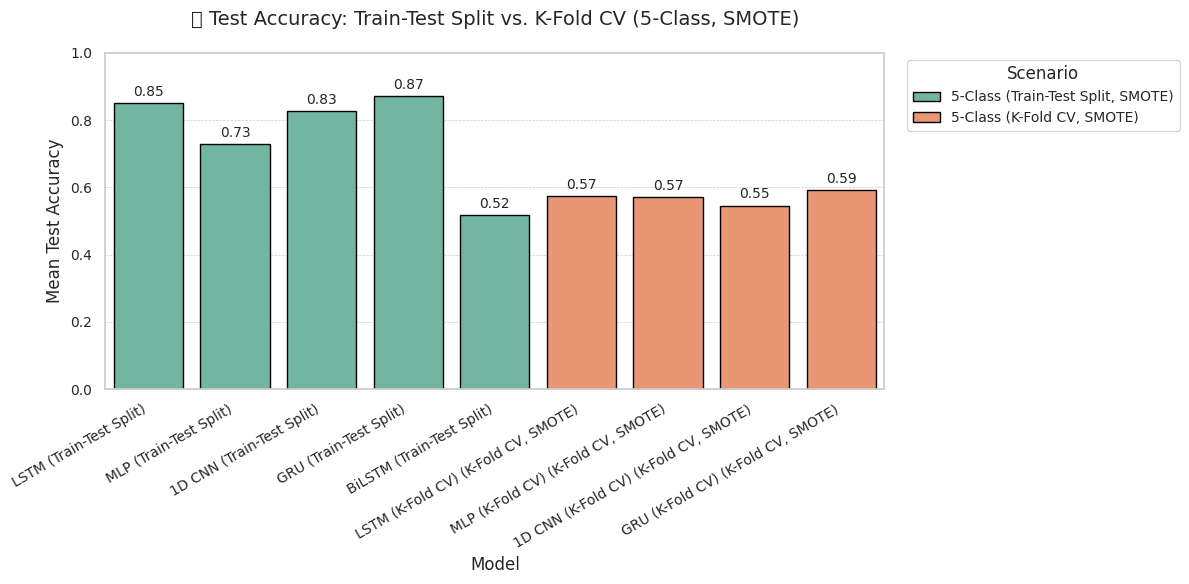

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Seaborn uses a clean theme
sns.set(style="whitegrid")

if 'all_comparison_df' in globals() and not all_comparison_df.empty:

    selected_scenarios_comp1 = [
        '5-Class (Train-Test Split, SMOTE)',
        '5-Class (K-Fold CV, SMOTE)'
    ]

    # Filter
    filtered_comparison_comp1_df = all_comparison_df[
        all_comparison_df['Scenario'].isin(selected_scenarios_comp1)
    ].copy()

    if not filtered_comparison_comp1_df.empty:
        # Sort for consistent bar alignment
        filtered_comparison_comp1_df['Model'] = pd.Categorical(
            filtered_comparison_comp1_df['Model'],
            categories=filtered_comparison_comp1_df['Model'].unique(),
            ordered=True
        )

        plt.figure(figsize=(14, 6))
        ax = sns.barplot(
            data=filtered_comparison_comp1_df,
            x='Model',
            y='Test Accuracy (Mean)',
            hue='Scenario',
            palette='Set2',
            edgecolor='black'
        )

        # Add exact value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

        plt.title('📊 Test Accuracy: Train-Test Split vs. K-Fold CV (5-Class, SMOTE)', fontsize=14, pad=20)
        plt.ylabel('Mean Test Accuracy', fontsize=12)
        plt.xlabel('Model', fontsize=12)
        plt.ylim(0, 1)
        plt.xticks(rotation=30, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title='Scenario', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
        plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave room for legend

        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.show()

    else:
        print("Filtered DataFrame for Comparison 1 is empty.")
else:
    print("Consolidated results DataFrame (all_comparison_df) not found or empty.")



--- Comparison 2: Train-Test Split vs. Group K-Fold CV (5-Class, Class Weights, Default Stride) - Test Accuracy ---


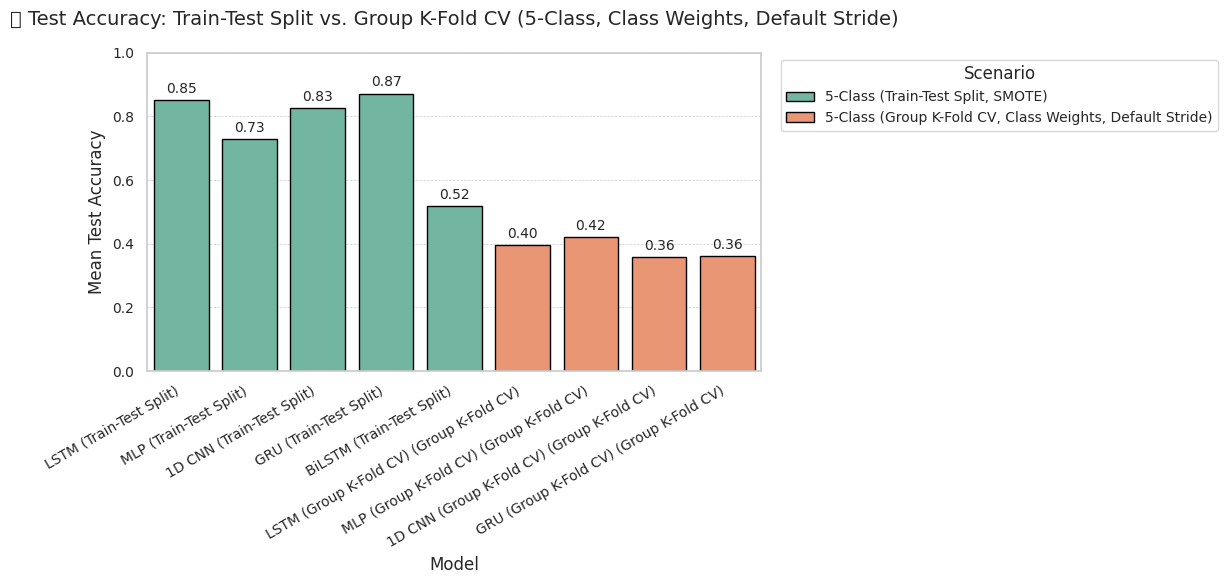


Comparison 2 visualization generated.


NameError: name 'e' is not defined

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use clean style
sns.set(style="whitegrid")

if 'all_comparison_df' in globals() and not all_comparison_df.empty:

    print("\n" + "="*80)
    print("--- Comparison 2: Train-Test Split vs. Group K-Fold CV (5-Class, Class Weights, Default Stride) - Test Accuracy ---")
    print("="*80)

    selected_scenarios_comp2 = [
        '5-Class (Train-Test Split, SMOTE)',
        '5-Class (Group K-Fold CV, Class Weights, Default Stride)'
    ]

    # Filter
    filtered_comparison_comp2_df = all_comparison_df[
        all_comparison_df['Scenario'].isin(selected_scenarios_comp2)
    ].copy()

    if not filtered_comparison_comp2_df.empty:
        # Optional: Ensure consistent order of models
        filtered_comparison_comp2_df['Model'] = pd.Categorical(
            filtered_comparison_comp2_df['Model'],
            categories=filtered_comparison_comp2_df['Model'].unique(),
            ordered=True
        )

        plt.figure(figsize=(14, 6))
        ax = sns.barplot(
            data=filtered_comparison_comp2_df,
            x='Model',
            y='Test Accuracy (Mean)',
            hue='Scenario',
            palette='Set2',
            edgecolor='black'
        )

        # Add exact value labels
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

        plt.title('📊 Test Accuracy: Train-Test Split vs. Group K-Fold CV (5-Class, Class Weights, Default Stride)', fontsize=14, pad=20)
        plt.ylabel('Mean Test Accuracy', fontsize=12)
        plt.xlabel('Model', fontsize=12)
        plt.ylim(0, 1)
        plt.xticks(rotation=30, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', linewidth=0.5)

        # Adjust legend and spacing
        plt.legend(title='Scenario', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

        print("\nComparison 2 visualization generated.")
    else:
        print("\nFiltered DataFrame for Comparison 2 is empty. Check if the specified scenarios exist.")

e



--- Comparison 3: Train-Test Split vs. Group K-Fold CV (3-Class, Focal Loss, Stride=1) - Test Accuracy ---


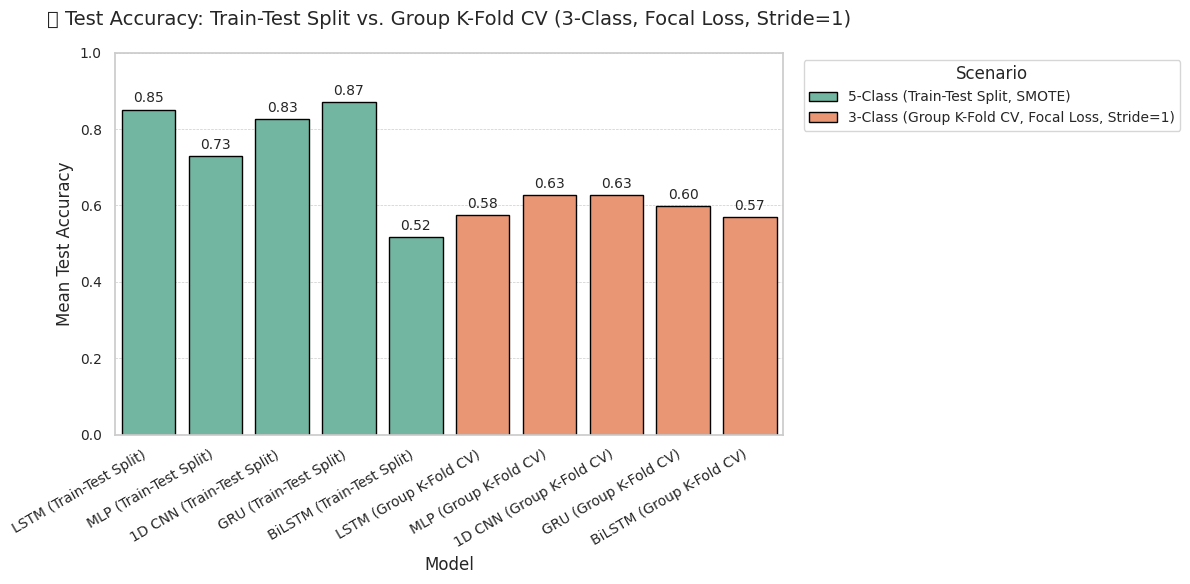


Comparison 3 visualization generated.


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use clean visual theme
sns.set(style="whitegrid")

if 'all_comparison_df' in globals() and not all_comparison_df.empty:

    print("\n" + "="*80)
    print("--- Comparison 3: Train-Test Split vs. Group K-Fold CV (3-Class, Focal Loss, Stride=1) - Test Accuracy ---")
    print("="*80)

    selected_scenarios_comp3 = [
        '5-Class (Train-Test Split, SMOTE)',
        '3-Class (Group K-Fold CV, Focal Loss, Stride=1)'
    ]

    filtered_comparison_comp3_df = all_comparison_df[
        all_comparison_df['Scenario'].isin(selected_scenarios_comp3)
    ].copy()

    if not filtered_comparison_comp3_df.empty:
        # Optional: Sort models for consistent display
        filtered_comparison_comp3_df['Model'] = pd.Categorical(
            filtered_comparison_comp3_df['Model'],
            categories=filtered_comparison_comp3_df['Model'].unique(),
            ordered=True
        )

        plt.figure(figsize=(14, 6))
        ax = sns.barplot(
            data=filtered_comparison_comp3_df,
            x='Model',
            y='Test Accuracy (Mean)',
            hue='Scenario',
            palette='Set2',
            edgecolor='black'
        )

        # Add value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

        # Title and labels
        plt.title('📊 Test Accuracy: Train-Test Split vs. Group K-Fold CV (3-Class, Focal Loss, Stride=1)', fontsize=14, pad=20)
        plt.ylabel('Mean Test Accuracy', fontsize=12)
        plt.xlabel('Model', fontsize=12)
        plt.ylim(0, 1)
        plt.xticks(rotation=30, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', linewidth=0.5)

        # Legend and layout
        plt.legend(title='Scenario', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

        print("\nComparison 3 visualization generated.")
    else:
        print("\nFiltered DataFrame for Comparison 3 is empty. Check if the specified scenarios exist.")

else:
    print("\nConsolidated results DataFrame (all_comparison_df) not found or empty. Please run the cell that generates it first.")


In [88]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.utils import to_categorical # Comment out or remove to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Assuming focal_loss function is defined in a previous cell (facd6fde)
# Assuming create_sequences_dl function is defined in a previous cell (73b3e1e0)
# Assuming model builder functions are defined in previous cells (build_lstm_model, etc.)

# Manual one-hot encoding function
def manual_to_categorical(y, num_classes=None):
    """Manual one-hot encoding."""
    y = np.array(y, dtype='int') # Ensure labels are integers
    if num_classes is None:
        num_classes = np.max(y) + 1
    # Create a zero array with shape (num_samples, num_classes)
    categorical = np.zeros((y.shape[0], num_classes), dtype='float32')
    # Set the appropriate element to 1 for each sample
    categorical[np.arange(y.shape[0]), y] = 1
    return categorical


def run_groupkfold_with_logging(model_builder, df_data, features, target_col, groups, seq_length, n_splits=5, random_state=42, epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=1):
    """
    Performs k-fold cross-validation using GroupKFold for a deep learning model,
    including logging of detailed classification reports for each fold.
    Uses manual one-hot encoding instead of tf.keras.utils.to_categorical.

    Args:
        model_builder: A function that builds and compiles the Keras model.
                       It should accept (input_shape, num_classes) as arguments.
        df_data: The DataFrame containing the data.
        features: A list of feature column names.
        target_col: The name of the target column.
        groups: The grouping variable (e.g., 'mesaid' column) for GroupKFold.
        seq_length: The sequence length for time series data.
        n_splits: The number of folds for k-fold cross-validation.
        random_state: Random state for reproducibility (not used by GroupKFold split).
        epochs: Number of training epochs.
        batch_size: Batch size for training.
        loss_function: The loss function to use ('categorical_crossentropy' or the focal_loss function).
        stride: The step size to use when creating sequences.

    Returns:
        A tuple containing the mean and standard deviation of accuracy and
        macro F1-score across all *successfully completed* folds.
    """
    gkf = GroupKFold(n_splits=n_splits)
    fold_accuracies = []
    fold_macro_f1s = []

    # Prepare data array before splitting
    data_array = df_data[features + [target_col]].values
    groups_array = groups.values

    if data_array.size == 0:
        print("Error: Input data array is empty.")
        return None, None, None, None

    num_features_raw = data_array.shape[1] - 1
    all_labels = data_array[:, num_features_raw]
    unique_all_labels = np.unique(all_labels)
    total_num_classes = len(unique_all_labels)

    if total_num_classes < 2:
         print(f"Error: Only {total_num_classes} class found in the entire dataset. Multi-class classification requires at least 2 classes.")
         return None, None, None, None

    if data_array.shape[0] == 0 or data_array.shape[0] < seq_length:
         print(f"Warning: Data length ({data_array.shape[0]}) is less than sequence length ({seq_length}) or data is empty. Cannot create sequences.")
         return None, None, None, None


    print(f"\n--- Running Group K-Fold CV ({n_splits} folds) with Logging (Manual One-Hot Encoding) ---")
    for fold, (train_idx, val_idx) in enumerate(gkf.split(data_array, y=data_array[:, num_features_raw], groups=groups_array)):
        print(f"--- Fold {fold+1}/{n_splits} ---")

        train_data_raw = data_array[train_idx]
        val_data_raw = data_array[val_idx]

        X_train_raw = train_data_raw[:, :num_features_raw]
        y_train_raw = train_data_raw[:, num_features_raw]
        X_val_raw = val_data_raw[:, :num_features_raw]
        y_val_raw = val_data_raw[:, num_features_raw]

        train_data_sequencing = np.hstack((X_train_raw, y_train_raw.reshape(-1, 1)))
        X_train_seq, y_train_seq = create_sequences_dl(train_data_sequencing, seq_length=seq_length, target_idx=-1, stride=stride)

        val_data_sequencing = np.hstack((X_val_raw, y_val_raw.reshape(-1, 1)))
        X_val_seq, y_val_seq = create_sequences_dl(val_data_sequencing, seq_length=seq_length, target_idx=-1, stride=stride)

        # --- Add print statements to check shapes after sequence creation ---
        print(f"  Shapes after create_sequences_dl (Train): X_train_seq={X_train_seq.shape}, y_train_seq={y_train_seq.shape}")
        print(f"  Shapes after create_sequences_dl (Validation): X_val_seq={X_val_seq.shape}, y_val_seq={y_val_seq.shape}")


        if X_train_seq.size == 0 or X_val_seq.size == 0:
            print(f"  Skipping fold {fold+1}: Not enough valid sequences generated for training ({X_train_seq.shape[0]} samples) or validation ({X_val_seq.shape[0]} samples) with stride {stride}.")
            tf.keras.backend.clear_session() # Ensure session is cleared even if skipping
            continue


        unique_train_seq_labels = np.unique(y_train_seq)
        if len(unique_train_seq_labels) < 2:
             print(f"  Skipping fold {fold+1}: Only {len(unique_train_seq_labels)} class(es) present in the sequenced training data after split.")
             tf.keras.backend.clear_session() # Ensure session is cleared even if skipping
             continue

        # Scale features (fit on training sequences, transform on train and validation sequences)
        scaler = StandardScaler()
        n_features_seq = X_train_seq.shape[-1] # Use the number of features from the sequences

        # Reshape sequences for scaling (flatten for scaler, then reshape back)
        X_train_seq_flat = X_train_seq.reshape(-1, n_features_seq)
        X_val_seq_flat = X_val_seq.reshape(-1, n_features_seq)

        X_train_scaled_flat = scaler.fit_transform(X_train_seq_flat)
        X_val_scaled_flat = scaler.transform(X_val_seq_flat)

        # Reshape back to sequences
        X_train_scaled = X_train_scaled_flat.reshape(-1, seq_length, n_features_seq)
        X_val_scaled = X_val_scaled_flat.reshape(-1, seq_length, n_features_seq)

        # --- Add print statements to check shapes after scaling ---
        print(f"  Shapes after scaling (Train): X_train_scaled={X_train_scaled.shape}")
        print(f"  Shapes after scaling (Validation): X_val_scaled={X_val_scaled.shape}")


        # Convert target labels to categorical using manual function
        # Ensure labels are integers before manual one-hot encoding
        print(f"  Info before manual_to_categorical (Train): dtype={y_train_seq.dtype}, min={np.min(y_train_seq) if y_train_seq.size > 0 else 'N/A'}, max={np.max(y_train_seq) if y_train_seq.size > 0 else 'N/A'}, unique={np.unique(y_train_seq) if y_train_seq.size > 0 else 'N/A'}") # Added print
        print(f"  Shape of y_train_seq before manual_to_categorical: {y_train_seq.shape}") # Added print
        y_train_cat = manual_to_categorical(y_train_seq.astype(int), num_classes=total_num_classes)
        print(f"  Shape of y_train_cat after manual_to_categorical: {y_train_cat.shape}") # Added print

        print(f"  Info before manual_to_categorical (Validation): dtype={y_val_seq.dtype}, min={np.min(y_val_seq) if y_val_seq.size > 0 else 'N/A'}, max={np.max(y_val_seq) if y_val_seq.size > 0 else 'N/A'}, unique={np.unique(y_val_seq) if y_val_seq.size > 0 else 'N/A'}") # Added print
        print(f"  Shape of y_val_seq before manual_to_categorical: {y_val_seq.shape}") # Added print
        y_val_cat = manual_to_categorical(y_val_seq.astype(int), num_classes=total_num_classes)
        print(f"  Shape of y_val_cat after manual_to_categorical: {y_val_cat.shape}") # Added print


        # print(f"  Categorical train labels shape: {y_train_cat.shape}") # Keep for debugging if needed
        # print(f"  Categorical validation labels shape: {y_val_cat.shape}") # Keep for debugging if needed


        class_weights = compute_class_weight('balanced', classes=np.arange(total_num_classes), y=y_train_seq.astype(int)) # Use integer labels for weights
        class_weights = dict(enumerate(class_weights))

        model = model_builder((seq_length, X_train_scaled.shape[-1]), total_num_classes) # Use features from scaled sequence shape

        if loss_function == 'categorical_crossentropy':
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            loss_is_focal = False
            # print("  Using categorical_crossentropy loss.") # Keep for debugging if needed
        elif callable(loss_function):
             model.compile(optimizer='adam', loss=loss_function(gamma=2., alpha=.25), metrics=['accuracy'])
             loss_is_focal = True
             # print("  Using Focal Loss.") # Keep for debugging if needed
        else:
            print(f"  Warning: Unknown loss function '{loss_function}'. Using categorical_crossentropy.")
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            loss_is_focal = False
            # print("  Using categorical_crossentropy loss.") # Keep for debugging if needed


        es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        if model_builder == build_mlp_model or model_builder == build_smaller_mlp_model:
             X_train_fit = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
             X_val_fit = X_val_scaled.reshape(X_val_scaled.shape[0], -1)
        else:
             X_train_fit = X_train_scaled
             X_val_fit = X_val_scaled

        # --- Add print statements for final fit shapes ---
        print(f"  Shapes before model.fit (Train): X_train_fit={X_train_fit.shape}, y_train_cat={y_train_cat.shape}")
        print(f"  Shapes before model.fit (Validation): X_val_fit={X_val_fit.shape}, y_val_cat={y_val_cat.shape}")


        fit_args = {
            'x': X_train_fit,
            'y': y_train_cat,
            'validation_data': (X_val_fit, y_val_cat),
            'epochs': epochs,
            'batch_size': batch_size,
            'callbacks': [es],
            'verbose': 0
        }
        if not loss_is_focal:
             fit_args['class_weight'] = class_weights
             # print("  Using class_weight in model.fit.") # Keep for debugging if needed
        else:
             # print("  Skipping class_weight in model.fit (using Focal Loss).") # Keep for debugging if needed
             pass # Explicitly pass if not using class_weight


        print("  Training model...")
        history = model.fit(**fit_args)

        print("  Evaluating model on validation set...")
        loss, accuracy = model.evaluate(X_val_fit, y_val_cat, verbose=0)
        y_pred = np.argmax(model.predict(X_val_fit), axis=1)

        # Calculate F1-score and print classification report
        print("\n  Classification Report (Fold {}):".format(fold+1))
        # Use integer labels for classification_report
        report = classification_report(y_val_seq.astype(int), y_pred, labels=np.arange(total_num_classes), zero_division=0)
        print(report)

        macro_f1 = classification_report(y_val_seq.astype(int), y_pred, labels=np.arange(total_num_classes), output_dict=True, zero_division=0)['macro avg']['f1-score']


        print(f"  Fold {fold+1} - Validation Accuracy: {accuracy:.4f}, Macro F1: {macro_f1:.4f}")

        fold_accuracies.append(accuracy)
        fold_macro_f1s.append(macro_f1)

        tf.keras.backend.clear_session()


    if not fold_accuracies:
        print("No folds completed successfully.")
        return None, None, None, None

    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    mean_macro_f1 = np.mean(fold_macro_f1s)
    std_macro_f1 = np.std(fold_macro_f1s)

    print(f"\n--- Group K-Fold CV Results ({len(fold_accuracies)}/{n_splits} successful folds) ---")
    print(f"Mean Validation Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean Validation Macro F1: {mean_macro_f1:.4f} +/- {std_macro_f1:.4f}")

    return mean_accuracy, std_accuracy, mean_macro_f1, std_macro_f1

In [89]:
# Ensure necessary libraries and functions are available from previous cells
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GroupKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# # from tensorflow.keras.utils import to_categorical # Comment out or remove to_categorical
# from tensorflow.keras.callbacks import EarlyStopping
# import tensorflow as tf
# from sklearn.metrics import classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Ensure global variables are defined (SEQ_LENGTH, EPOCHS, BATCH_SIZE, RANDOM_SEED)
# Ensure df_for_dl_original and groups DataFrames/Series are available
# Ensure run_groupkfold_with_logging function is defined (which now uses manual_to_categorical)
# Ensure manual_to_categorical function is defined
# Ensure original model builder functions are defined (build_lstm_model, build_mlp_model, ...)


# Determine features for the 3-class models (same as previous 3-class experiments)
features_3_class_groupkfold = [col for col in df_for_dl_original.columns if col not in ['mesaid', 'sleep stage', 'sleep_stage_encoded_5_class', 'sleep_stage_encoded_3_class', 'sleep_stage_encoded_3_class_new']]
target_3_class = 'sleep_stage_encoded_3_class_new' # Use the new 3-class target column

# Number of splits for GroupKFold
n_splits_groupkfold = 5
sequence_stride = 1 # Set the stride for sequence creation

kfold_cv_results_groupkfold_3class_weights_stride1_logged = []

print("\n" + "="*80)
print(f"--- Running Group K-Fold CV ({n_splits_groupkfold} folds) with Logging (3-Class Mapping, Class Weights, Stride={sequence_stride}, Manual One-Hot Encoding) ---")
print("="*80)

# --- Run Group K-Fold CV for each Original DL model with Logging ---

# LSTM (3-class)
print("\nEvaluating LSTM (3-class) with Group K-Fold CV (Class Weights, Stride=1, Logging, Manual One-Hot)...")
mean_acc_lstm, std_acc_lstm, mean_f1_lstm, std_f1_lstm = run_groupkfold_with_logging(
    build_lstm_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride # Use categorical_crossentropy for class weights
)
if mean_acc_lstm is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1_logged.append({
        'Model': 'LSTM (Group K-Fold CV, 3-Class, Logged, Manual One-Hot)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride}, Logged, Manual One-Hot)',
        'Test Accuracy (Mean)': mean_acc_lstm, 'Test Accuracy (Std)': std_acc_lstm,
        'Macro F1 (Mean)': mean_f1_lstm, 'Macro F1 (Std)': std_f1_lstm
    })


# MLP (3-class)
print("\nEvaluating MLP (3-class) with Group K-Fold CV (Class Weights, Stride=1, Logging, Manual One-Hot)...")
mean_acc_mlp, std_acc_mlp, mean_f1_mlp, std_f1_mlp = run_groupkfold_with_logging(
    build_mlp_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride # Use categorical_crossentropy for class weights
)
if mean_acc_mlp is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1_logged.append({
        'Model': 'MLP (Group K-Fold CV, 3-Class, Logged, Manual One-Hot)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride}, Logged, Manual One-Hot)',
        'Test Accuracy (Mean)': mean_acc_mlp, 'Test Accuracy (Std)': std_acc_mlp,
        'Macro F1 (Mean)': mean_f1_mlp, 'Macro F1 (Std)': std_f1_mlp
    })


# 1D CNN (3-class)
print("\nEvaluating 1D CNN (3-class) with Group K-Fold CV (Class Weights, Stride=1, Logging, Manual One-Hot)...")
mean_acc_cnn, std_acc_cnn, mean_f1_cnn, std_f1_cnn = run_groupkfold_with_logging(
    build_cnn_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride # Use categorical_crossentropy for class weights
)
if mean_acc_cnn is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1_logged.append({
        'Model': '1D CNN (Group K-Fold CV, 3-Class, Logged, Manual One-Hot)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride}, Logged, Manual One-Hot)',
        'Test Accuracy (Mean)': mean_acc_cnn, 'Test Accuracy (Std)': std_acc_cnn,
        'Macro F1 (Mean)': mean_f1_cnn, 'Macro F1 (Std)': std_f1_cnn
    })

# GRU (3-class)
print("\nEvaluating GRU (3-class) with Group K-Fold CV (Class Weights, Stride=1, Logging, Manual One-Hot)...")
mean_acc_gru, std_acc_gru, mean_f1_gru, std_f1_gru = run_groupkfold_with_logging(
    build_gru_model, df_for_dl_original, features_3_class_groupkfold, target_3_class,
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride # Use categorical_crossentropy for class weights
)
if mean_acc_gru is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1_logged.append({
        'Model': 'GRU (Group K-Fold CV, 3-Class, Logged, Manual One-Hot)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride}, Logged, Manual One-Hot)',
        'Test Accuracy (Mean)': mean_acc_gru, 'Test Accuracy (Std)': std_acc_gru,
        'Macro F1 (Mean)': mean_f1_gru, 'Macro F1 (Std)': std_f1_gru
    })

# BiLSTM (3-class)
print("\nEvaluating BiLSTM (3-class) with Group K-Fold CV (Class Weights, Stride=1, Logging, Manual One-Hot)...")
mean_acc_bilstm, std_acc_bilstm, mean_f1_bilstm, std_f1_bilstm = run_groupkfold_with_logging(
    build_bilstm_model, df_for_dl_original, features_bilstm_groupkfold, target_3_class, # Use 3-class target
    groups, SEQ_LENGTH, n_splits=n_splits_groupkfold, random_state=RANDOM_SEED,
    epochs=EPOCHS, batch_size=BATCH_SIZE, loss_function='categorical_crossentropy', stride=sequence_stride # Use categorical_crossentropy for class weights
)
if mean_acc_bilstm is not None:
    kfold_cv_results_groupkfold_3class_weights_stride1_logged.append({
        'Model': 'BiLSTM (Group K-Fold CV, 3-Class, Logged, Manual One-Hot)', 'Scenario': f'DL - 3-Class Mapping (Group K-Fold CV, Class Weights, Stride={sequence_stride}, Logged, Manual One-Hot)',
        'Test Accuracy (Mean)': mean_acc_bilstm, 'Test Accuracy (Std)': std_acc_bilstm,
        'Macro F1 (Mean)': mean_f1_bilstm, 'Macro F1 (Std)': std_f1_bilstm
    })


# Convert results to DataFrame
kfold_cv_results_groupkfold_3class_weights_stride1_logged_df = pd.DataFrame(kfold_cv_results_groupkfold_3class_weights_stride1_logged)
print(f"\n--- Group K-Fold Cross-Validation Results (3-Class Mapping, Class Weights, Stride={sequence_stride}, Logged, Manual One-Hot) ---")
display(kfold_cv_results_groupkfold_3class_weights_stride1_logged_df)


--- Running Group K-Fold CV (5 folds) with Logging (3-Class Mapping, Class Weights, Stride=1, Manual One-Hot Encoding) ---

Evaluating LSTM (3-class) with Group K-Fold CV (Class Weights, Stride=1, Logging, Manual One-Hot)...

--- Running Group K-Fold CV (5 folds) with Logging (Manual One-Hot Encoding) ---
--- Fold 1/5 ---
  Inside create_sequences_dl: X shape = (7045, 30, 42), y shape = (7045,) before return.
  Inside create_sequences_dl: X shape = (1170, 30, 42), y shape = (1170,) before return.
  Shapes after create_sequences_dl (Train): X_train_seq=(7045, 30, 42), y_train_seq=(7045,)
  Shapes after create_sequences_dl (Validation): X_val_seq=(1170, 30, 42), y_val_seq=(1170,)
  Shapes after scaling (Train): X_train_scaled=(7045, 30, 42)
  Shapes after scaling (Validation): X_val_scaled=(1170, 30, 42)
  Info before manual_to_categorical (Train): dtype=float64, min=0.0, max=2.0, unique=[0. 1. 2.]
  Shape of y_train_seq before manual_to_categorical: (7045,)
  Shape of y_train_cat after

KeyboardInterrupt: 